<h2> Table of contents</h2>
1. Introduction
2. Import libraries
3. #############
4. ##########
5. ###############
6. ###############
7. ###############
8. ###############
9. ###############
10. ###############
11. ###############
12. ###############
13. Conclusion

<h3><u>Instructions</u></h3>

<p>something good</p>

<h3><u>Import libraries</u></h3>

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows',4000)
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import requests
import json
import pprint
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from nltk.tokenize import sent_tokenize,word_tokenize
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

<h3><u>Upload Annual_Crime_Austin_2014_to_2016_update.csv </u></h3>

In [2]:
df_Crime_Austin_2014_to_2016 = pd.read_csv('Annual_Crime_Austin_2014_to_2016_update.csv')
df_Crime_Austin_2014_to_2016.head()

GO Primary Key  Council District         GO Highest Offense Desc  \
0     201610188.0               8.0  AGG ASLT ENHANC STRANGL/SUFFOC   
1     201610643.0               9.0  THEFT                            
2     201610892.0               4.0  AGG ROBBERY/DEADLY WEAPON        
3     201610893.0               9.0  THEFT                            
4     201611018.0               4.0  SEXUAL ASSAULT W/ OBJECT         

  Highest NIBRS/UCR Offense Description GO Report Date  \
0                           Agg Assault       1-Jan-16   
1                                 Theft       1-Jan-16   
2                               Robbery       1-Jan-16   
3                                 Theft       1-Jan-16   
4                                  Rape       1-Jan-16   

                                         GO Location Clearance Status  \
0  8600 W SH 71                                  ...                C   
1  219 E 6TH ST                                  ...                C   
2  701 W LONGSPUR BLVD                           ...                N   
3  404 COLORADO ST                               ...                N   
4                                                NaN                C   

  Clearance Date GO District  GO Location Zip  GO Census Tract  \
0      12-Jan-16           D          78735.0            19.08   
1       4-Jan-16           G          78701.0            11.00   
2       3-May-16           E          78753.0            18.23   
3      22-Jan-16           G          78701.0            11.00   
4      10-Mar-16           E          78753.0            18.33   

   GO X Coordinate  GO Y Coordinate  
0        3067322.0       10062796.0  
1        3114957.0       10070462.0  
2        3129181.0       10106923.0  
3        3113643.0       10070357.0  
4              NaN              NaN

<h3><u>Rename Column Names for df_Crime_Austin_2014_to_2016</u></h3>

In [3]:
df_Crime_Austin_2014_to_2016.rename_axis({'GO Location Zip':'Zip','Highest NIBRS/UCR Offense Description':'Austin_Offense_Description'},axis = 1, inplace=True)


<h3><u>Check for Duplicated Rows and dropna values in df_Crime_Austin_2014_to_2016 </u></h3>

In [4]:
number_of_Duplicated_Rows = df_Crime_Austin_2014_to_2016.duplicated().sum()
print('There are {} duplicated rows in df_Crime_Austin_2014_2016'.format(number_of_Duplicated_Rows))

There are 0 duplicated rows in df_Crime_Austin_2014_2016


In [5]:
df_Crime_Austin_2014_to_2016 = df_Crime_Austin_2014_to_2016.dropna()

<h3>Change zipcode to an object dtype in df_Crime_Austin_2014_to_2016 dataframe </h3>

In [6]:
df_Crime_Austin_2014_to_2016['Zip'] = df_Crime_Austin_2014_to_2016.Zip.astype(int)
df_Crime_Austin_2014_to_2016['Zip'] = df_Crime_Austin_2014_to_2016.Zip.astype(str)

<h3>Save df_Crime_Austin_2014_to_2016 as .csv file </h3>

In [7]:
df_Crime_Austin_2014_to_2016.to_csv('Final_Generated_Crime_Austin_2014_to_2016.csv',index=False)

<h3>Setup YELP  API Authentication</h3>

In [8]:
keys ={"client_id":"acsWZVrkgYT2pceSbVY3SA" ,
      "client_secret": "3P6HCoVLXl5IddCFs0yokn8fZ2gzkvzzatJaUjG0PJrD5Xi9gbPvrkBwYFwMmnMP"}

token = requests.post(url="https://api.yelp.com/oauth2/token",data=keys).json()

access_token = token['access_token']

headers = {'Authorization': 'bearer %s' % access_token}

<h3>Austin ZipCodes</h3>

In [9]:
#There are 48 different zip codes in the df_Crime_Austin_2014_2016 dataframe. 

austin_zips=['78735', '78701', '78753', '78724', '78741', '78704',
             '78748', '78758', '78744', '78747', '78756', '78759', 
             '78723', '78745', '78749', '78751', '78752', '78731', 
             '78702', '78722', '78705', '78757', '78721', '78739', 
             '78729', '78613', '78617', '78746', '78750', '78719', 
             '78703', '78736', '78653', '78727', '78652', '78754', 
             '78726', '78717', '78660', '78725', '78712', '78730', 
             '78742', '78728', '78732', '78737', '78733', '78610']

<h3>Yelp API Call by austin zipcode </h3>

In [10]:
#Create empty list for all the information pulled from yelp api

info = []

#Using the austin_zips list generate a json file for all the 48 austin zipcodes

for zips_codes in austin_zips:
    url = 'https://api.yelp.com/v3/businesses/search'
    params = {'location': zips_codes, 'sort_by': 'rating', 'limit' : 50}
    resp = requests.get(url=url, params=params, headers=headers).json()
    data = resp['businesses']
    info.append(data)
    

In [11]:
#pprint.pprint(info)

<h3>Generated Yelp Dataframe</h3>

In [12]:
list_business_name = []
list_review_counts = []
list_ratings = []
list_zip_codes = []
list_id_business = []
list_city =[]
list_state = []
list_categories = []
list_price = []

for x in range(len(info)):
    
    data = info[x]
   
    
    for item in data:
        list_business_name.append(item.get('name'))
        list_review_counts.append(item.get('review_count'))
        list_ratings.append(item.get('rating'))
        
        list_zip_codes.append(item.get('location').get('zip_code'))
        list_id_business.append(item.get('id'))
        list_city.append(item.get('location').get('city'))
        list_state.append(item.get('location').get('state'))
        list_categories.append(item.get('categories')[0].get('alias'))
        list_price.append(item.get('price'))

In [13]:
df_Yelp_API = pd.DataFrame({'Business_Name'   : list_business_name,
                            'Review_Counts'   : list_review_counts,
                            'Business_Ratings': list_ratings,
                            'Zip'       : list_zip_codes,
                            'Business_ID'     : list_id_business,
                            'City'            : list_city,
                            'State'           : list_state,
                            'Category'        : list_categories,
                           'Price':list_price})
def f(row):
    if row['Price'] == '$':
        val = 1
    elif row['Price'] == '$$':
        val = 2
    elif row['Price'] == '$$$':
        val = 3
    elif row['Price'] == '$$$$':
        val = 4
    else:
        val = 0
    return val

df_Yelp_API['Price Value'] = df_Yelp_API.apply(f,axis = 1)

df_Yelp_API.head(100)

Business_ID  \
0                urban-mattress-south-austin-austin-2   
1                                  healthy-pet-austin   
2                          toast-entertainment-austin   
3                          union-jack-plumbing-austin   
4                           mercedes-flowers-austin-8   
5                                     zen-well-austin   
6                       sage-blossom-massage-austin-2   
7                    barefoot-mosquito-control-austin   
8                         the-natural-gardener-austin   
9                                throckmortons-austin   
10  manish-patel-od-todays-vision-south-towne-aust...   
11             summer-rydel-dds-a-summer-smile-austin   
12                 third-coast-home-inspection-austin   
13                     addis-carpet-cleaning-austin-2   
14                    spacecraft-entertainment-austin   
15                     creative-images-by-keri-austin   
16            texas-honey-ham-company-west-lake-hills   
17                      dash-service-company-austin-5   
18      josh-brown-team-legacy-mutual-mortgage-austin   
19           rudys-country-store-and-bar-b-q-austin-6   
20              jack-allens-kitchen-oak-hill-austin-2   
21                             caden-roofing-austin-2   
22                               pure-skin-spa-austin   
23                                     d-lites-austin   
24                             via-313-pizza-austin-5   
25                       buddhas-brew-kombucha-austin   
26                  pure-smiles-orthodontics-austin-2   
27          travis-country-veterinary-hospital-austin   
28                                posh-salon-austin-2   
29                          ryan-carrel-studio-austin   
30                    professional-tv-mounting-austin   
31                                 wholy-bagel-austin   
32              happy-larrys-motorcycle-towing-austin   
33                   nicole-mlakar-photography-austin   
34                       meche-organic-salon-austin-2   
35               dan-whites-screens-and-things-austin   
36                         oak-hill-eye-care-austin-2   
37                         slab-bbq-and-beer-austin-3   
38                   realty-austin-southwest-austin-2   
39                                      beirut-austin   
40                      maryes-gourmet-pizza-austin-2   
41             eurasia-sushi-bar-and-seafood-austin-2   
42                   vintage-and-lace-weddings-austin   
43                   cleantech-carpet-cleaning-austin   
44                         i-renovate-austin-austin-2   
45                                juiceland-austin-22   
46                         sweet-treets-bakery-austin   
47                           tacodeli-west-lake-hills   
48                              designer-nails-austin   
49                    brad-b-plumbing-services-austin   
50                                    boteco-austin-3   
51                              savor-de-moi-austin-3   
52                town-lake-metropolitan-parks-austin   
53                                   dee-dee-austin-2   
54                                    ceviche7-austin   
55                                  halal-time-austin   
56                           franklin-barbecue-austin   
57                          the-roosevelt-room-austin   
58                                 abo-youssef-austin   
59                                  dolce-neve-austin   
60                               grannys-tacos-austin   
61                               via-313-pizza-austin   
62                           the-tasty-spoon-austin-2   
63                               la-barbecue-austin-3   
64             the-wild-parrots-of-east-austin-austin   
65                                        uchi-austin   
66                         texas-state-capitol-austin   
67                    micklethwait-craft-meats-austin   
68                                    patrizis-austin   
69                                 las-trancas-austi

In [14]:
#Checking to make sure they both have the same zipcodes
#100 rows need to be removed from yelp dataframe. This rows contain zipcodes which are out of scope for the analysis.

df_Yelp_API['Zip'].isin(austin_zips).value_counts()

True     2301
False      98
Name: Zip, dtype: int64

<h3>Double checking the length of Dataframe</h3>

In [15]:
#Double checking the length of Dataframe to ensure all rows contain zipcodes which are in scope

df_Yelp_API = df_Yelp_API[df_Yelp_API['Zip'].isin(austin_zips)]
df_Yelp_API.shape

(2301, 10)

In [16]:
#Comparing the number of Zips in df_Yelp_API and df_Crime_Austin_2014_to_2016

df_Yelp_API.Zip.nunique() == df_Crime_Austin_2014_to_2016.Zip.nunique()

True

<h3>Checking for duplicated columns in df_Yelp_API dataframe </h3>

In [17]:
#There are 1055 duplicated rows in this dataframe these will be deleted 

df_Yelp_API.duplicated().sum()

1055

In [18]:
#After Dropping the duplicated row the dataframe will have the following number of rows

len(df_Yelp_API) - df_Yelp_API.duplicated().sum()

1246

In [19]:
#drop duplicated rows in df_Yelp_API and keep the first 

df_Yelp_API = df_Yelp_API.drop_duplicates(keep='first')

#Checking length of df_Yelp_API to ensure it has the correct amount of rows

df_Yelp_API.shape

(1246, 10)

<h3>Create blank columns for df_Yelp_API dataframe to store all Reviews</h3>

In [20]:
#Create blank columns for df_Yelp_API dataframe to store Reviews 

df_Yelp_API['First_Review'] = " "
df_Yelp_API['First_Timestamp'] = " "

df_Yelp_API['Second_Review'] = " "
df_Yelp_API['Second_Timestamp'] = " "

df_Yelp_API['Third_Review'] = " "
df_Yelp_API['Third_Timestamp'] = " "


df_Yelp_API['Yelp_Url'] = " "

In [21]:
#Use Yelp API to place all reviews in review columns associated with df_Yelp_API dataframe

for index,row in df_Yelp_API.iterrows():
    review = row['Business_ID']
    
    url_review = 'https://api.yelp.com/v3/businesses/{}/reviews'.format(review)
    
    api_reviews = requests.get(url=url_review,headers=headers).json()
    pprint.pprint(api_reviews)
    
    df_Yelp_API.set_value(indermation has be obtained   
x,'First_Review',api_reviews['reviews'][0]['text'])
    df_Yelp_API.set_value(index,'First_Timestamp', api_reviews['reviews'][0]['time_created'])
    df_Yelp_API.set_value(index,'Second_Review',api_reviews['reviews'][1]['text'])
    df_Yelp_API.set_value(index,'Second_Timestamp', api_reviews['reviews'][1]['time_created'])
    df_Yelp_API.set_value(index,'Third_Review',api_reviews['reviews'][2]['text'])
    df_Yelp_API.set_value(index,'Third_Timestamp', api_reviews['reviews'][2]['time_created'])
    df_Yelp_API.set_value(index,'Yelp_Url', api_reviews['reviews'][0]['url'])
    
#display df_Yelp_API dataframe after all info
df_Yelp_API.head(10)

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I was searching for a comfortable mattress and visited '
                      'several different stores in Austin. Deciding on a '
                      'mattress is no small decision.  But Troy was great...',
              'time_created': '2017-11-15 18:16:20',
              'url': 'https://www.yelp.com/biz/urban-mattress-south-austin-austin-2?hrid=pBFCXwUrSfK2fu7HUzJp7A&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/xyxyOQpER96wH5XKR7P2kw/o.jpg',
                       'name': 'Pam Y.'}},
             {'rating': 5,
              'text': 'I was helped by a Hannah at this store and she was '
                      'helpful and informative but not pushy or a typical '
                      'mattress salesperson. I ended up purchasing my...',
    

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'This was amazing! Dawn blew me away. She was so '
                      'knowledgeable, and got me back to full range of motion '
                      'and out of pain for the first time in weeks. The...',
              'time_created': '2017-11-12 12:41:10',
              'url': 'https://www.yelp.com/biz/zen-well-austin?hrid=D7NYV4SwSGALGAIzbdvAtg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/bPSbX5IWGRcMRK3YmUdXOQ/o.jpg',
                       'name': 'Jill J.'}},
             {'rating': 5,
              'text': 'Overall, a very unique massage experience!\n'
                      '\n'
                      'I did no research whatsoever on what exactly a Thai '
                      "massage is before coming here. That's smart, right? "
     

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I wanted to write this review even though I never got a '
                      "chance to do business with Thockmorton's. I sent a "
                      'message asking if they would be able to fix a...',
              'time_created': '2017-09-12 15:09:52',
              'url': 'https://www.yelp.com/biz/throckmortons-austin?hrid=9O-V7c9QUsTMV7EtqoAK6A&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/xXexg3xiF6JThht8_MJ8LA/o.jpg',
                       'name': 'Kate C.'}},
             {'rating': 1,
              'text': 'If you want to support businesses who support their '
                      'employees then Go somewhere else.\n'
                      '\n'
                      "I went to Throkmorton's for a new watchband on a 2nd "
       

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I am giving 5 stars for the great customer service I '
                      'received. From the phone call to describe the issue I '
                      'had which was a slight emergency to him showing...',
              'time_created': '2017-10-28 17:35:17',
              'url': 'https://www.yelp.com/biz/addis-carpet-cleaning-austin-2?hrid=ZvCP-H6mpAYHL26cyTppdg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/V4PJSeb-JTERs5hmIUKP1w/o.jpg',
                       'name': 'Shelby C.'}},
             {'rating': 2,
              'text': 'Ken, owner of Addis steam cleaned our carpet on '
                      '11/15/2017.  The initial conversation to make the '
                      'appointment was friendly. Ken and his helper were '
            

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': '10 years ago after having the coolant in my AC replaced '
                      'several times by another company l called Dash. After '
                      'promptly arriving they repaired the damaged...',
              'time_created': '2017-08-17 18:33:20',
              'url': 'https://www.yelp.com/biz/dash-service-company-austin-5?hrid=Z8KwzObrVeEucSJhODyAng&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Robert F.'}},
             {'rating': 1,
              'text': 'I understand that calling for AC repair on a Sunday '
                      'morning, in July, the on-call tech is going to be '
                      'swamped. But, still, waiting nearly 4 hours for a...',
              'time_created': '2017-07-30 11:19:25',
              'url': 'https://www.yelp.com

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'We just moved out to the Austin area at the end of May, '
                      'after a fairly significant hail storm hit the area, '
                      'which of course resulted in damaging the roof on...',
              'time_created': '2017-11-03 12:33:55',
              'url': 'https://www.yelp.com/biz/caden-roofing-austin-2?hrid=qfrjB697q1iqsNi4SvmEDQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Erik J.'}},
             {'rating': 5,
              'text': 'Caden Roofing and Fareed were great to work with!  Came '
                      'to inspect my roof within hours of the initial phone '
                      'call.  His crew was so nice and did a great job...',
              'time_created': '2017-10-31 08:36:07',
              'url': 'https://www.yelp.com/

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "Buddha's Brew makes my favorite kombucha EVER. I love "
                      'the taste, the variety of flavors, and the little '
                      'bottles with the peace sign on the bottom. My only...',
              'time_created': '2015-09-02 09:29:19',
              'url': 'https://www.yelp.com/biz/buddhas-brew-kombucha-austin?hrid=uB1j439K-Am1en5zHu_T4g&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/DGveJF3WFYPm_ZRL_laL1w/o.jpg',
                       'name': 'Brandie M.'}},
             {'rating': 5,
              'text': 'THIS KOMBUCHA IS THE BEST and by far my absolute '
                      "favorite (and I've had a lot)!! All of their flavors "
                      'never disappoint. Great customer service. The '
             

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Ryan is a wonderful stylist: attentive, highly '
                      'experienced, personable, kind and a great listener.\n'
                      '\n'
                      'The entire experience was a joy from the moment I '
                      'walked...',
              'time_created': '2015-01-29 09:22:42',
              'url': 'https://www.yelp.com/biz/ryan-carrel-studio-austin?hrid=CANetLIyUIv4llL_r0OLSw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/3Jfpk37ixWs0X6AL-hR3GA/o.jpg',
                       'name': 'Xander M.'}},
             {'rating': 5,
              'text': 'Ryan does blonde like no other! He works his magic and '
                      'my bright blonde hair looks natural and grows out well! '
                      'He

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "I know I'm just adding to the pile of positive remarks "
                      "about Nicole's work & manner, but it's worth noting. "
                      "It's the least I could do for what she has given...",
              'time_created': '2014-02-22 14:11:42',
              'url': 'https://www.yelp.com/biz/nicole-mlakar-photography-austin?hrid=2rewTFZEmzXy3ZP_R3dDvQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/zXuBaFw4RGy1dl5kDtj4AA/o.jpg',
                       'name': 'Leslie H.'}},
             {'rating': 5,
              'text': 'Nicole was such a joy to work with. Photoshoots can be '
                      'stressful to say the least, and Nicole made the entire '
                      'process so relaxing and fun. In addition, she...

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Came here for lunch had the rib sandwich and it was '
                      'delicious. If your in the market for BBQ hands down '
                      "this place has some awesome meat options you can't...",
              'time_created': '2017-09-28 11:25:33',
              'url': 'https://www.yelp.com/biz/slab-bbq-and-beer-austin-3?hrid=TJTmbwQ5Rqd7hcoHDurhaA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/HkKvQ4kjWuhzxqEEDykZ1w/o.jpg',
                       'name': 'Mark M.'}},
             {'rating': 2,
              'text': 'TL;DR synopsis of this Slab BBQ & Beer location:\n'
                      '- City slicker limited-menu BBQ--as in "Sammys"\n'
                      '- Half-off ribs on Tuesday nights are half-gristle\n'
               

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "I'm ecstatic that I found this place. I love sushi with "
                      'all my heart and my boyfriend, well not so much. So '
                      'finding a place for date night that we can both...',
              'time_created': '2017-11-01 09:44:40',
              'url': 'https://www.yelp.com/biz/eurasia-sushi-bar-and-seafood-austin-2?hrid=xi9klS-sK6ZuEY87S5chow&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/tgulDMuxwMgSKzv3AODNYg/o.jpg',
                       'name': 'Ashley V.'}},
             {'rating': 4,
              'text': 'Okay, this is a plea to this restaurant to fix '
                      'something, figure something out, about your '
                      'ventilation/exhaust system! I am a huge fan of the food '
    

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Love all the vegan smoothies and juices here. Friendly '
                      'service as well. I highly recommend the originator!',
              'time_created': '2017-11-05 13:34:25',
              'url': 'https://www.yelp.com/biz/juiceland-austin-22?hrid=aRZC4U_E8pQF3Ln1-Gnr5Q&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/-DmPopOVmXnZ8yR6g06BkQ/o.jpg',
                       'name': 'Esther Y.'}},
             {'rating': 1,
              'text': 'Every single time I come here I think, "I could drive '
                      'home, make a smoothie and drink it in the time it takes '
                      'them to get my order to me."\n'
                      '\n'
                      'Edited to add:...',
              'time_created': '2017-0

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "He's pretty available so Brad has become my go-to "
                      'plumber in a pinch. Kitchen sink has a leak on a '
                      'Wednesday and guests are arriving for the weekend?! '
                      'Brad...',
              'time_created': '2017-11-14 20:33:28',
              'url': 'https://www.yelp.com/biz/brad-b-plumbing-services-austin?hrid=qEGSCN-u-Ku9_REyky30SQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/UghwqCMOyD-W4aiohcSVWg/o.jpg',
                       'name': 'Jennie K.'}},
             {'rating': 5,
              'text': 'Brad is responsive, courteous, and professional. He '
                      'showed up on time and contacted us to let us know that '
                      "he's on his way.\n"
        

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'This awesome trailer puts out some of the best Thai '
                      "cuisine I've ever had the pleasure of experiencing.  "
                      "When it comes to Thai food I'm usually familiar...",
              'time_created': '2017-10-14 17:13:04',
              'url': 'https://www.yelp.com/biz/dee-dee-austin-2?hrid=GLcBCnFk6q60RRPN371nAg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/8Gm9-JCLpgyQiFf1IuCKYg/o.jpg',
                       'name': 'Chris M.'}},
             {'rating': 4,
              'text': "Dee Dee is an awesome food truck, and I'll definitely "
                      "be back when I'm craving good Thai food! I came here "
                      'with friends on a Friday night. Parking is just...',
              'time

{'possible_languages': ['en', 'es'],
 'reviews': [{'rating': 5,
              'text': 'Speakeasy drinks! \n'
                      'I absolutely love the atmosphere- the lighting, the '
                      'painting on the walls, the bottles of alcohol by the '
                      'bar, the music. It was...',
              'time_created': '2017-12-02 05:11:23',
              'url': 'https://www.yelp.com/biz/the-roosevelt-room-austin?hrid=t126dPvpwmfJ8TRGyWeg-Q&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/Vmo5YMEK21f4PBm4AkSUiA/o.jpg',
                       'name': 'Donna Y.'}},
             {'rating': 5,
              'text': 'Decadent style, lush in high class, but yet subtle and '
                      'elegant! I loved the layout, the design, and the '
                      'vibe... I felt like I was in a rich dim 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Hello pizza, my old friend\n'
                      "I've come to eat you up again\n"
                      'Because a vision softly creeping\n'
                      'Of your cheese has me weeping\n'
                      'And the vision that was planted in...',
              'time_created': '2017-11-27 20:01:30',
              'url': 'https://www.yelp.com/biz/via-313-pizza-austin?hrid=54Uw7H2Xrpbu5CSPRqmKtw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/9qV0MNFQbmt9RoFxAVwdpw/o.jpg',
                       'name': 'Amber K.'}},
             {'rating': 1,
              'text': "I've been eating at Via 313 for years, and have always "
                      'completely 100% loved the pizza at every location.  '
                      'When people 

{'possible_languages': ['nb', 'de', 'en', 'es'],
 'reviews': [{'rating': 5,
              'text': "We arrived at 5:00 thinking we'd have plenty of time to "
                      'join the happy hour. We soon realized we were actually '
                      'late, and were lucky to get the last two...',
              'time_created': '2017-11-29 17:41:50',
              'url': 'https://www.yelp.com/biz/uchi-austin?hrid=QR6gWvqKLnt6my64VGM6qA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/oRXfNvJEXzrTifXtP3SSzQ/o.jpg',
                       'name': 'Laine C.'}},
             {'rating': 3,
              'text': 'Came to Uchi with a high level of anticipation for a '
                      'celebration. The place was, of course, packed at 9:00 '
                      'pm on a Friday night. When we arrived we were...',
         

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'You actually order through a food truck and there is a '
                      'seating area available if you decide to eat there.  I '
                      'visited around 9 pm and there were many bugs...',
              'time_created': '2017-08-06 04:49:34',
              'url': 'https://www.yelp.com/biz/las-trancas-austin?hrid=jO-El7WfoO_J5mgzGnUrzw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/dV6DNtfRrNlnRgmGdimd9w/o.jpg',
                       'name': 'Jorge N.'}},
             {'rating': 5,
              'text': "FINALLY, QUALITY TACOS THAT AREN'T $5 EACH.\n"
                      '\n'
                      "Las Trancas has some incredible tacos. I'd recommend "
                      'getting the pastor (usually my go to anywhere but '

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'The go to spot if I want top tier bbq in a hurry. '
                      'Definitely a locals secret.\n'
                      '\n'
                      'I always want bbq Long after the 10am "have to wait in '
                      'line for an hour or...',
              'time_created': '2017-12-02 09:01:22',
              'url': 'https://www.yelp.com/biz/kerlin-bbq-austin?hrid=37wC_iVg9n8isLXRs7uB3g&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/fjTe5H_hyyKedVR6rCYWWQ/o.jpg',
                       'name': 'Travis K.'}},
             {'rating': 5,
              'text': "Ya'll, I don't want to write this because I really "
                      'wanna keep the lines short but Kerlin is just as good, '
                      'if not better than

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "To drive home the point that's been made in the earlier "
                      'reviews: BEST PIZZA AND BEST BAR IN ALL OF AUSTIN. \n'
                      '\n'
                      'The pizza is tavern-style: square cut, thin...',
              'time_created': '2017-11-18 06:44:16',
              'url': 'https://www.yelp.com/biz/king-bee-lounge-austin-2?hrid=HiJd-8Sn2Y2NEAQqb3yFLg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/HgyOSO2qT1UKueHTs8mRZg/o.jpg',
                       'name': 'Liane T.'}},
             {'rating': 5,
              'text': 'This bar is everything. Everything is done with love '
                      'and authenticity. The pizza is so good (choosing '
                      'between pesto and tomato sauce is the hard

{'possible_languages': ['de', 'en'],
 'reviews': [{'rating': 5,
              'text': "It's Austin's front yard (courtesy of generous gifts by "
                      "A.J. Zilker in 1918 and 1932), and we're all invited to "
                      'come enjoy the 358 acres of expansive lawn,...',
              'time_created': '2017-09-12 14:07:27',
              'url': 'https://www.yelp.com/biz/zilker-park-austin-2?hrid=gUQSCYcBqUI7GU3hJM9i-Q&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/jh0vM_E2JLSPCod4ycW3Lw/o.jpg',
                       'name': 'Shannon B.'}},
             {'rating': 4,
              'text': "When I explore the inner-workings of a city, I'm always "
                      'on the lookout for public spaces that are designed for '
                      'public welfare and the occasional nap. Zilker...',
  

{'possible_languages': ['en', 'es'],
 'reviews': [{'rating': 5,
              'text': 'Update: From what I was told by Boteco, their '
                      'neighbors, they have closed and went back to the DR. So '
                      'far I have not seen them back. Sad to see such a...',
              'time_created': '2017-11-20 08:43:29',
              'url': 'https://www.yelp.com/biz/the-doughminican-austin?hrid=IYNLwyF94o7EXNWnWPKz6g&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/QEeb9aDal0knGWhebeCFOA/o.jpg',
                       'name': 'Christine N.'}},
             {'rating': 4,
              'text': 'Will update when I actually visit\n'
                      '\n'
                      "Message to owner, I've tried calling you between the "
                      'hours listed, no answer. The location must be hid

{'possible_languages': ['en', 'es'],
 'reviews': [{'rating': 5,
              'text': "If you're in Austin for a day, go here. Even if you're "
                      'in Austin for an hour, do yourself a favor by calling '
                      'an uber and getting ur ass over here for the...',
              'time_created': '2017-11-02 20:39:11',
              'url': 'https://www.yelp.com/biz/pueblo-viejo-austin?hrid=fPF58tLVclfvwfh4yCU7Ew&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/WwmtgMLAqfBxo4lYxdVbEQ/o.jpg',
                       'name': 'Sarah R.'}},
             {'rating': 5,
              'text': "It's been a week since I visited Pueblo Viejo on a "
                      'recent vacation, and I still wake up every morning '
                      'craving breakfast tacos. Conveniently located just...',
           

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Never be smarter than the staff!!! \n'
                      ' Or they passive aggressively argue with you the rest '
                      'of the time you eat LOL. This is quite literally not a '
                      'review just...',
              'time_created': '2017-12-02 09:58:25',
              'url': 'https://www.yelp.com/biz/true-food-kitchen-austin-2?hrid=L6HtIco_MLJ8kLxJb2DrUg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/7S1jjM1X-y8oTIE2DF-u0g/o.jpg',
                       'name': 'Robert F.'}},
             {'rating': 5,
              'text': 'One night in Austin and boy did we strike gold.\n'
                      'This place was the jam.\n'
                      'If you love the most delicious Veggie going, then this '
       

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "For the last several years, I've been looking for a "
                      "cheesesteak place that is better than Phatso's, which "
                      'shut down. The hunt is over. Way South Philly...',
              'time_created': '2017-06-18 11:25:15',
              'url': 'https://www.yelp.com/biz/way-south-philly-austin?hrid=_m9rBcp25IOW_N5DfCM0Zg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/cf7O8QdUuHRFSA50jsx6CA/o.jpg',
                       'name': 'John H.'}},
             {'rating': 5,
              'text': 'Found this place through the advice of local Austin '
                      'Yelpers, so figured to check them out.\n'
                      '\n'
                      'I am glad that I did. The sandwiches were great '
     

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'What can be said about this place that has not. Owners '
                      'are friendly , get to know their customers, the hot '
                      'dogs are fantastic blend of flavors and buns are...',
              'time_created': '2017-11-04 14:09:46',
              'url': 'https://www.yelp.com/biz/t-locs-sonora-hot-dogs-austin-4?hrid=2Mxi5fscy-8_vsR_wos6-A&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/W6cLqjBfBCnqR-J2mc891w/o.jpg',
                       'name': 'Mike B.'}},
             {'rating': 2,
              'text': 'Mystified by all these 5 star reviews, which just goes '
                      'to show that people in Austin will pay almost anything '
                      'for a food item they are not familiar with....',
   

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "Came here for lunch on a Saturday since I've heard so "
                      'much about the food here. My brother has been here '
                      'several times before and recommended the poke...',
              'time_created': '2017-10-21 18:39:30',
              'url': 'https://www.yelp.com/biz/the-big-kahuna-austin-3?hrid=L3T4S82aoyPvIM-tmR-RTg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/tQL7i6T052ZF-ulSXuoO5g/o.jpg',
                       'name': 'Nikita D.'}},
             {'rating': 4,
              'text': "A decent Hawaiian food truck. Not the best I've ever "
                      'had, but solid. I came when they were almost out of '
                      'everything (they had some catering stuff later in...',
             

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Though I came here to study; I stayed for the music and '
                      'the vibe. The lighting was a bit too dark to get any '
                      'reading done--granted I did come at 10pm on a...',
              'time_created': '2017-09-24 16:59:06',
              'url': 'https://www.yelp.com/biz/yahala-hookah-lounge-austin?hrid=O5KPlEwyxCIBoGJU6iFLWg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/6Y2D596hsuzMzwJvq1FLsQ/o.jpg',
                       'name': 'Tabias W.'}},
             {'rating': 4,
              'text': 'Leave it to Armenians to find a hookah lounge in Austin '
                      ':x\n'
                      '\n'
                      'Though kinda in the middle of nowhere, I really liked '
                      

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Finally found good breakfast tacos up north! Homemade '
                      'right in front of you. Migas was amazing and the '
                      "chorizo isn't greasy like most places. So happy to...",
              'time_created': '2017-10-21 07:23:30',
              'url': 'https://www.yelp.com/biz/jrs-tacos-austin?hrid=drrSvqc4eT0217jy19ja_Q&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/o3N5vvdPtz9bSHjHsqvflw/o.jpg',
                       'name': 'Landa C.'}},
             {'rating': 5,
              'text': "Found JR's taco on Yelp while I was have a cafeteria "
                      'food confidence crisis and did not want to spend '
                      'another dime there.\n'
                      'As the other reviews mention, 

{'possible_languages': ['en', 'zh', 'es'],
 'reviews': [{'rating': 5,
              'text': "Seriously... North Lamar's best kept secret.  No "
                      "Joke... This is a family business at it's very best!  "
                      'Whenever we have guests in town (which is often as '
                      'we...',
              'time_created': '2017-06-17 15:18:26',
              'url': 'https://www.yelp.com/biz/chagos-caribbean-cuisine-austin?hrid=luD8K0tCiHfTXC8yXNbQAQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/HNYd0W-WGCDmO40NUo1fdg/o.jpg',
                       'name': 'Jenny H.'}},
             {'rating': 4,
              'text': 'The food is great only problem I have that for the '
                      "price they give little food.  I guess because it's the "
                      'only Caribbean re

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Every time I come here with my wife we get the most '
                      'awesome customer service. The spot is really chill '
                      'atmosphere is great. Audi takes great care of us....',
              'time_created': '2017-10-13 18:55:24',
              'url': 'https://www.yelp.com/biz/hookah-buzz-austin-7?hrid=Ai3Dbv4J_ZOEQdGzcLmrdg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/27LWAuRN83jdG48m1J6zJg/o.jpg',
                       'name': 'Ken P.'}},
             {'rating': 5,
              'text': 'This place has literally the BEST paan hookah in ATX '
                      'hands down! The hookah will last you for hours..you get '
                      'new coals without having to ask, they play good...',
              '

{'possible_languages': ['en', 'pt'],
 'reviews': [{'rating': 5,
              'text': 'If there were a 4.5-star option I would knock the '
                      'rating down to that only because I thought the "house" '
                      "coffee tasted like coffee I've had in the past that...",
              'time_created': '2017-10-27 12:31:13',
              'url': 'https://www.yelp.com/biz/cafe-java-austin-austin-4?hrid=N9tE71wrNPAmnSYtl-7lTQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/0jOJnR4IHr26Yb6U4hhJ1A/o.jpg',
                       'name': 'Michele M.'}},
             {'rating': 3,
              'text': 'I went here this morning just after opening and we were '
                      'promptly seated. The service was pretty great. Now the '
                      'food, ehhhh. I need some pizzazz. This place...

{'possible_languages': ['en', 'es'],
 'reviews': [{'rating': 5,
              'text': 'Why 5 starts ? \n'
                      'Well first very nice people Sunday 2pm for launch  with '
                      'my family. We order the full family meal come with 2 '
                      'sides and whole chicken . We...',
              'time_created': '2017-11-20 01:37:34',
              'url': 'https://www.yelp.com/biz/inka-chicken-austin?hrid=JqjkT7_b6ADJ1gQ9uuq5QA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/F2XNPglNstBwzvOyaOzkPA/o.jpg',
                       'name': 'Tony E.'}},
             {'rating': 5,
              'text': 'AMAZING Rotisserie chicken! The chicken is super '
                      'flavorful and moist. I would recommend this place to '
                      'anyone and everyone. \n'
                 

{'possible_languages': ['en', 'es'],
 'reviews': [{'rating': 5,
              'text': 'This place is half restaurant, half bakery. An '
                      'authentic Mexican spot where everything is delicious!\n'
                      '\n'
                      'Restaurant has GREAT breakfasts tacos. They use...',
              'time_created': '2017-11-23 07:43:54',
              'url': 'https://www.yelp.com/biz/mi-tradici%C3%B3n-austin-3?hrid=dAGUlHqxVqZNzTog6pHNAA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/TzkfRQOnbPmnD0gtWDCjcQ/o.jpg',
                       'name': 'Cynthia A.'}},
             {'rating': 4,
              'text': 'So so so happy we went to this place!!! Very simple '
                      'establishment.  We had tortas and pastor tacos.\n'
                      'The tortas were great...the bread wa

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'BOMB DOT COM. After a long morning of trying to figure '
                      'out what my co-worker wanted to eat, I ended up here by '
                      'myself. Long story short - it worked out for...',
              'time_created': '2017-11-28 15:50:32',
              'url': 'https://www.yelp.com/biz/tan-my-restaurant-austin-2?hrid=hwu5g3cFeFe5ywzLOpv7xQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/PebfqimFqMgW6HSScBxn9w/o.jpg',
                       'name': 'Casey H.'}},
             {'rating': 4,
              'text': 'Located next to a mobile phone store, and with limited '
                      'parking next to an old apartment complex, this little '
                      '"hole-in-the-wall" Vietnamese restaurant is not...',
    

{'possible_languages': ['fr', 'en'],
 'reviews': [{'rating': 5,
              'text': 'I came here for lunch with my boyfriend a couple days '
                      'ago for the first time and it was quite an '
                      'experience. \n'
                      '\n'
                      'Upon walking in, there was only one other...',
              'time_created': '2017-10-22 09:24:21',
              'url': 'https://www.yelp.com/biz/d-k-sushi-and-seoul-asian-food-market-austin?hrid=E3geHYmK44jaGjq7tS4Y1A&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/vRmhJtm000PzYqPCft33JQ/o.jpg',
                       'name': 'Elizabeth S.'}},
             {'rating': 5,
              'text': 'Do not be fooled by the shabby exterior. Or the '
                      'graffiti, disco themed inside, and open mic looking '
            

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Best bubble tea in town! They have a large selection of '
                      'drinks from smoothies to slushies to milk teas. My go '
                      'to drinks are the iced Vietnamese coffee...',
              'time_created': '2017-11-10 16:07:35',
              'url': 'https://www.yelp.com/biz/teapioca-lounge-austin-3?hrid=pTgpAdCB-xJODaiEwtq7IQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/iIipNNABgPaLg_Oh2PeyMQ/o.jpg',
                       'name': 'Blair V.'}},
             {'rating': 5,
              'text': '* I love it here! This is my new favorite place! \n'
                      '\n'
                      '* Great service, amazing drinks and lovely little '
                      'lounge area! \n'
                      '\n'
 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Smallish restaurant so seating gets quite limited '
                      'during the crush.  Located up north off Parmer in a '
                      'fairly nondescript strip mall.  \n'
                      '\n'
                      'I tend to forgo the...',
              'time_created': '2017-07-25 13:49:55',
              'url': 'https://www.yelp.com/biz/tomodachi-sushi-austin?hrid=Px_AHHLWRr_slYK6OCjI6Q&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/5q6qNT4xN6SoMNNCWIcYSQ/o.jpg',
                       'name': 'Andrew C.'}},
             {'rating': 4,
              'text': 'This is your "diamond in the rough" sushi spot as '
                      'located in small strip center on Palmer just off '
                      'Mo-pac.\n'
       

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'We found Kit & Kaboodle on Yelp and are so glad we did! '
                      'Booking with them was very easy and convenient. When we '
                      'arrived I filled out a little info about my...',
              'time_created': '2017-05-11 06:18:19',
              'url': 'https://www.yelp.com/biz/kit-and-kaboodle-grooming-austin?hrid=Tl6gtWryvrw3cn6_f0bVmg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/29UDb9R9or2fEmgRzdCh8A/o.jpg',
                       'name': 'Arly D.'}},
             {'rating': 5,
              'text': 'Brought my little senior mutt here two times for his '
                      "bi-yearly cuts and they've always done a great job and "
                      'been super kind! \n'
                      '\n'
     

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Several friends and I came here twice on a recent trip '
                      'to Austin.  The facilities are great, accommodating to '
                      'inexperienced shooters without being a...',
              'time_created': '2016-02-08 11:45:33',
              'url': 'https://www.yelp.com/biz/capitol-city-trap-and-skeet-club-manor?hrid=TEW9XWhetc3rdTdWnxvJrQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/ToIh6Ntwtr0Vp23-wMdReA/o.jpg',
                       'name': 'James J.'}},
             {'rating': 5,
              'text': 'Came here for the first time today with my husband, mom '
                      'and dad, we had a great time! It is really nice there '
                      'and very affordable. We bought the family...',
    

{'possible_languages': ['en'],
 'reviews': [{'rating': 2,
              'text': 'The quality of the vegetables from the farm is '
                      'exceptional and I will likely continue to buy from them '
                      'at markets, but the execution of the CSA is sub-par....',
              'time_created': '2015-08-04 11:31:45',
              'url': 'https://www.yelp.com/biz/green-gate-farms-austin?hrid=G6lhv4H2IsHmrAJTlbQ4fg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/nmE55oibNkUxbgopq67_gg/o.jpg',
                       'name': 'Stephen M.'}},
             {'rating': 5,
              'text': 'Toured this past week by invitation of one of the kids '
                      'that took their one week summer camp.  The enthusiasm '
                      'of the children was infectious.  They did not...',
       

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "We don't leave till tomorrow but so far this has been "
                      'the best B&B we have stayed at. This is a really nice '
                      'B&B really close to Austin. You get your own...',
              'time_created': '2016-01-30 19:46:09',
              'url': 'https://www.yelp.com/biz/decker-creek-bed-and-breakfast-and-biscuit-manor?hrid=GCSIGF4Pje22vs98NEII0w&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/raRFewLK5b0hPwcDkYV0PQ/o.jpg',
                       'name': 'Edgar A.'}},
             {'rating': 5,
              'text': 'Pat and Byron are the greatest hosts. Cabin 2 is '
                      'perfect for any dog owner. It has a beautiful rustic '
                      'look with very detailed/themed decorations. A

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Their food is always hot, fresh, and delicious! AND '
                      'THEY DELIVER! \n'
                      '\n'
                      'We love the sesame chicken, egg rolls, house special '
                      'fried rice, chicken noodle...',
              'time_created': '2017-10-28 18:09:30',
              'url': 'https://www.yelp.com/biz/dragon-express-austin?hrid=7zbhV5EPfcxypEU2EzWaSg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/5B58_UFflHXu0C9HneQ75Q/o.jpg',
                       'name': 'Victoria H.'}},
             {'rating': 5,
              'text': "The food at this place is so amazing. It's gotten so "
                      'much better than I had there in the past. Our family is '
                      'so happy to hav

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Stopped here on our way down to Port Aransas for '
                      'vacation. Excellent tacos and gordita, and the salsa '
                      'was just hot enough with a great flavor. Will have '
                      'to...',
              'time_created': '2017-02-18 12:29:28',
              'url': 'https://www.yelp.com/biz/jds-tacos-austin?hrid=buaaM6NrqLb5NUaxmkTnQA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/qoE5O_qYgtr_eUrhG1K8cw/o.jpg',
                       'name': 'Aaron N.'}},
             {'rating': 5,
              'text': 'This place is amazing. I eat here all the time. The '
                      "chorizo and potato breakfast tacos are where it's at. "
                      'The people who work there are also really nic

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'First time helicopter ride overlooking beautiful '
                      'downtown Austin. I lived in Austin for many years, but '
                      'the friendly pilot points out places of interest....',
              'time_created': '2017-01-22 10:18:39',
              'url': 'https://www.yelp.com/biz/austin-helicopter-tours-austin?hrid=KqtgoWismANeDedDabgMjA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/QUo7LczVbCcyK2_Li4dQ2Q/o.jpg',
                       'name': 'Dana C.'}},
             {'rating': 5,
              'text': 'What an amazing time. Perfect way to sweep your date '
                      'off their feet. Start with a shorter flight to make '
                      'sure you can handle it lol. But if you can handle...',
     

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Javier & Wallace came today to clean our furniture and '
                      'carpet.  They were VERY professional, introduced '
                      'themselves and knew their product.  They did a...',
              'time_created': '2017-07-07 08:04:48',
              'url': 'https://www.yelp.com/biz/stanley-steemer-austin-3?hrid=oiP-K8JGE9V58p2E8v1miw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Jim S.'}},
             {'rating': 1,
              'text': 'I received a quote through their online questionnaire. '
                      'I thought is was really expensive so I called to setup '
                      'and appointment for an on-site quote. When the...',
              'time_created': '2017-11-14 11:22:36',
              'url': 'https://www.yelp.com/biz/s

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "Simply a great place that is helping Austin's youth and "
                      'volunteers understand where the food comes from and how '
                      'it gets to its destinations.\n'
                      '\n'
                      'I was able to...',
              'time_created': '2015-12-23 17:12:57',
              'url': 'https://www.yelp.com/biz/urban-roots-farm-austin?hrid=vPs49gm0GyI4luSnC4p8Kw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/ExzlNRnOuLJu3WnHrkFFvQ/o.jpg',
                       'name': 'Troy H.'}},
             {'rating': 4,
              'text': 'We had a great time at the Tour de Farm Event. Would '
                      'recommend it for next year. What a great concept for '
                      "changing the

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'If you are looking to have your car detailed, look no '
                      'further. I bought a used car and it needed a complete '
                      'detail inside and out. I dropped off my car and...',
              'time_created': '2017-11-26 20:01:18',
              'url': 'https://www.yelp.com/biz/auto-detailing-by-dub-coates-austin?hrid=POSZG4KnFejdjtmHoZunqA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/PftSff_zWB6PWp4sbgrjQQ/o.jpg',
                       'name': 'Ruby M.'}},
             {'rating': 5,
              'text': "Dub's work is better than any other detail group I have "
                      'used! Highly recommend!',
              'time_created': '2017-05-15 16:09:15',
              'url': 'https://www.yelp.com/biz/a

{'possible_languages': ['en'],
 'reviews': [{'rating': 4,
              'text': 'Pretty decent sized community with great access to '
                      'highways. Friendly staff.',
              'time_created': '2017-07-01 11:51:02',
              'url': 'https://www.yelp.com/biz/the-reserve-at-walnut-creek-apartments-austin-2?hrid=DBIACBJn4QgsroOMA2IvSg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/5ngFWQsE2JHP0iVSHJY9Ig/o.jpg',
                       'name': 'Jorge O.'}},
             {'rating': 1,
              'text': '***WARNING****This place is an absolute nightmare. The '
                      'Management staff is hands down the most incompetent '
                      'group of people you will ever work with....',
              'time_created': '2017-11-13 17:29:42',
              'url': 'https://www.yelp.com/biz

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'My experience was just like many of the other reviews '
                      'you will see about Green iPhone Repair. I reached out '
                      'to Lane and he got back to me quickly, gave me a...',
              'time_created': '2015-07-01 12:02:17',
              'url': 'https://www.yelp.com/biz/green-device-exchange-austin?hrid=9JqEHw80hMWfaeYpt_rKZQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/-GIT4poXnPuMJo6dUAWkBw/o.jpg',
                       'name': 'Raquel C.'}},
             {'rating': 5,
              'text': 'Lane and Green iPhone Repair has saved me and my phone '
                      "several times in the last two years. I'm such a clumsy "
                      'oaf that even with a brick case around my...',
     

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Great experience. We have been several times both with '
                      'family and friends of all ages. This is not only '
                      'educational but an enjoyable and great work out....',
              'time_created': '2017-11-09 18:50:53',
              'url': 'https://www.yelp.com/biz/live-love-paddle-austin-2?hrid=vwKFoXM3Muz8qrh-iyEaiQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/UAdf7-MdUaHAFy41PQMZ9A/o.jpg',
                       'name': 'Elisa A.'}},
             {'rating': 5,
              'text': 'I went on the Bat Watching Tour and had a fantastic '
                      'time. The guide was very knowledgeable and friendly.. '
                      'The kayaking was a lot of fun, and the bats were...',
          

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "Love this little spot in Austin. If you're going to "
                      "take pictures, Park down the street - don't try to stop "
                      'your car in the middle of the on the corner...',
              'time_created': '2017-09-17 08:26:07',
              'url': 'https://www.yelp.com/biz/greetings-from-austin-postcard-mural-austin?hrid=l2mBcHEueRhsJ9ZLstdS1g&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/KD12DlPDf9SFVcanhRedcg/o.jpg',
                       'name': 'Phylicia P.'}},
             {'rating': 5,
              'text': 'What an awesome and iconic piece of Public Art in '
                      'Austin! \n'
                      '\n'
                      'Love the cute, "postcard" style and the colors!\n'
            

{'possible_languages': ['en', 'es'],
 'reviews': [{'rating': 5,
              'text': 'What can I say - cortado, alfajores (see photo), and '
                      'the owners are truly wonderful! That dulce de leche in '
                      'between those perfectly delicate cookies and...',
              'time_created': '2017-11-03 08:31:46',
              'url': 'https://www.yelp.com/biz/cafe-nenai-austin-2?hrid=0W6GLKsZeggRciEZRTonUw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/VQ7mjUIk_HyRhds5q5DSsA/o.jpg',
                       'name': 'Rachal C.'}},
             {'rating': 5,
              'text': "I can't say enough good things about Cafe Nena'i. It's "
                      'really cute and cozy inside. What really blew me away, '
                      'though, is the quality of coffee and food the...',
        

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'This place is now my favorite pho joint! The food is '
                      "delish and everything is so clean. It's a little "
                      'different from the usual sit in pho places, because...',
              'time_created': '2017-11-17 18:50:35',
              'url': 'https://www.yelp.com/biz/pho-please-austin-3?hrid=7n11WoX-Z2tMGDuriD59ug&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/iDxPnFo9Yk-UYCQR0vTlyw/o.jpg',
                       'name': 'Jamie G.'}},
             {'rating': 5,
              'text': 'I ate here last night, and my boyfriend and I agreed '
                      "that it's the most amazing pho we had ever eaten. The "
                      'service was awesome too. They had our appetizer...',
              '

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Yup yup yup! I needed to find a coffee spot stat and '
                      'trusty yelp led me to the right place once again.\n'
                      '\n'
                      "This place is so freaking tiny and adorable I can't...",
              'time_created': '2017-10-24 11:36:19',
              'url': 'https://www.yelp.com/biz/fleet-coffee-austin?hrid=UCv0bWazc25AZBfB4kL-7w&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/tgulDMuxwMgSKzv3AODNYg/o.jpg',
                       'name': 'Ashley V.'}},
             {'rating': 4,
              'text': 'This is where you might find most of the hipsters in '
                      'Austin since it has great coffee and '
                      'cool/modern/unassuming decor. :)\n'
                   

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Absolutely fantastic and authentic Jamaican food. Well '
                      "eclipses good I've had in the Bahamas and absolutely "
                      'worth a trip!!!\n'
                      '\n'
                      'I had the jerk chicken and it...',
              'time_created': '2017-10-27 13:00:18',
              'url': 'https://www.yelp.com/biz/tonys-jamaican-food-austin?hrid=KqVJIvazZER_N8ttWWlgOQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/xaurs84o5hAwYr0tCGPR8Q/o.jpg',
                       'name': 'Amila D.'}},
             {'rating': 4,
              'text': "Service: To be honest, I don't remember because I was "
                      "too busy eyeing everyone else's food. \n"
                      '\n'
                 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Amazing coffee. Not a coffee shop, but they offer '
                      'complimentary coffee, donation based. They roast the '
                      'coffee in house!  My new goto spot for coffee.',
              'time_created': '2017-09-13 07:52:35',
              'url': 'https://www.yelp.com/biz/third-coast-coffee-roasting-company-austin?hrid=cirzRWh1vSDT4gZk5Q_ShQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/aB04fzq6qGg0o3T6rNTBjg/o.jpg',
                       'name': 'Jennie V.'}},
             {'rating': 5,
              'text': 'Austin still promotes itself as the "Live Music Capital '
                      'of the World," but I\'ve been living here a while now, '
                      "and I'll tell you exactly what we're good...",


{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "I can't in good conscious give this place a fair review "
                      'as it was mostly responsible for breaking me of '
                      'vegetarianism. Will brisket ever taste as good as...',
              'time_created': '2017-12-03 15:08:52',
              'url': 'https://www.yelp.com/biz/browns-bar-b-que-austin?hrid=JJssjUAcyRwkXSU-1A-Z8w&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/_NJcoTcgP0v5ws1hYkjKBg/o.jpg',
                       'name': 'Joey M.'}},
             {'rating': 4,
              'text': "I liked this food more than la BBQ. And I didn't have "
                      'to wait 2 hours for an over rated place\n'
                      'Browns is moist, juicy, great flavors\n'
                      'Walked from t

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I love this place. We went to Vox for the first time '
                      'for my birthday last year. We ended up going AGAIN for '
                      'my birthday this year. Crazily enough they sat...',
              'time_created': '2017-11-04 16:14:42',
              'url': 'https://www.yelp.com/biz/vox-table-austin?hrid=26E9eFlqWoVA0leYZFm_wg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/r6ZXT11yQeOSI9ZA021U0g/o.jpg',
                       'name': 'Jeanie A.'}},
             {'rating': 4,
              'text': 'I am torn between 4 and 5 stars.\n'
                      '\n'
                      'The albacore tartar tacos were a sublime 5 statrs; even '
                      'my friend who has a huge dislike of fish said he '
        

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Wow where to start on this awesome place? My boyfriend '
                      'and I were interested in getting massages while on a '
                      'trip to Austin. I found Zen Blend while...',
              'time_created': '2017-11-30 14:05:31',
              'url': 'https://www.yelp.com/biz/zen-blend-mind-body-spa-austin?hrid=xvuf7zPsfQZyy1I6J3nNmA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/3qDEiPlSmVa_xjGOKZonWQ/o.jpg',
                       'name': 'Emily H.'}},
             {'rating': 5,
              'text': "I'd love to say that I get massages all the time, and "
                      "I've had my fair share of good and bad, but my only "
                      'previous massage experiences are Groupon splurges...',
         

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Sean was our excellent realtor. Sean provided '
                      'outstanding service at all stages of the deal:\n'
                      '- Providing info based on a very deep knowledge with '
                      'real...',
              'time_created': '2017-08-21 14:00:05',
              'url': 'https://www.yelp.com/biz/sean-austin-mccormack-realty-austin-austin?hrid=Ik-Ng5uz4HGcBOuWQKvhVw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Dan B.'}},
             {'rating': 5,
              'text': 'About this time last year, Sean was updating our home '
                      'search database on a daily basis with new listings and '
                      'patiently taking my husband and I to tour the...',
              'time_created': '2017-02-01 10:06:19',
      

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'So our A/C started acting up...water pouring from the '
                      'outside spout and not cooling inside. Texas. Summer. '
                      'Sunday afternoon.\n'
                      '\n'
                      'Saw the reviews for Go Green...',
              'time_created': '2017-09-24 15:58:04',
              'url': 'https://www.yelp.com/biz/go-green-heating-and-cooling-austin-2?hrid=5RZSJCBZ6a0USEKve-xsSg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/GfcH5YRx3eFmwLEgXbh5EA/o.jpg',
                       'name': 'Kim M.'}},
             {'rating': 5,
              'text': 'I recently called Go Green HVAC services to come and '
                      'check out my AC unit. From the moment I made the call '
                      

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I had a business trip to Austin this March and had '
                      'brisket sandwich here. \n'
                      'The sandwich is good. The brisket is flavorful, moist '
                      'and tender.\n'
                      'The service is...',
              'time_created': '2017-11-16 09:01:27',
              'url': 'https://www.yelp.com/biz/valentinas-tex-mex-bbq-austin?hrid=jyAdxN4xQfmyMbS5LXTrlA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/PNVB4I2D3EbU6ntXX5Z1JA/o.jpg',
                       'name': 'Yc C.'}},
             {'rating': 4,
              'text': 'Y67 Ukiah\n'
                      '7.\n'
                      'Mcth d rtiit88\n'
                      '7AmYe 4rtiit88 '
                      'rtrrrrrrrrrrrrrrrr

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I had Acura come out and estimate a roof replacement in '
                      'my current home. The price was competitive and they '
                      'were super professional. I ended up putting the...',
              'time_created': '2017-10-17 14:21:46',
              'url': 'https://www.yelp.com/biz/acura-roofing-austin?hrid=ICIyNXeqAuyDTxjav26AnA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/6k0OQv691OJfuarUODVCqA/o.jpg',
                       'name': 'Zach K.'}},
             {'rating': 5,
              'text': 'Very professional company. It was a relief to finally '
                      'work with a reliable company. Very efficient and highly '
                      'dependable. Went out of their way to do the...',
              

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I found Jenna through Facebook and immediately loved '
                      'her work. I described to her the kind of photos I '
                      'wanted for our engagement shoot and she helped me...',
              'time_created': '2014-08-07 19:30:37',
              'url': 'https://www.yelp.com/biz/creatrix-photography-austin?hrid=5GPLrpg_udZhzydjm6M94Q&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/5_xS7jCyK-s_UCGGZ2zDIQ/o.jpg',
                       'name': 'Caitlin M.'}},
             {'rating': 5,
              'text': 'When looking for a wedding photographer, I wanted '
                      'someone that I knew was LGBT friendly. When reading '
                      "Jenna's blog, she said that she would love to be the...",
      

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Absolutely loveeeeeeeeeee these ladies. I was going to '
                      'another dentist and she made me feel judged that Mary '
                      'daughter was still musing at 21 months and I...',
              'time_created': '2017-11-21 13:53:04',
              'url': 'https://www.yelp.com/biz/tiny-texans-pediatric-dentistry-austin?hrid=3Z91P2V_LGGXp2FCEKiBrg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/tYa2IOWIgD1unSabp2CtEA/o.jpg',
                       'name': 'Norah E.'}},
             {'rating': 5,
              'text': 'Dr. Christina and her whole staff were so wonderful '
                      'with my 3 1/2 year old, he is already asking when he '
                      'can go back!  Best dentist for kids - HANDS DOWN...

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'We hired Raul to paint our entire house pre-move-in: '
                      'ceilings, walls, baseboards. He was meticulous--the '
                      'house looks wonderful and fresh, every nail hole...',
              'time_created': '2017-10-01 09:18:10',
              'url': 'https://www.yelp.com/biz/perfect-touch-painting-austin?hrid=DbADaF1m03SZa8ovmdfQRw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Tiffany Y.'}},
             {'rating': 5,
              'text': 'We found Raul of Perfect Touch painting through Yelp '
                      'reviews. From the first time we met him to give us an '
                      'estimate to paint our cabinets, he displayed a...',
              'time_created': '2017-02-01 20:43:06',
              'url': 'https://www.yelp.

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Back again... and no surprise... amazing prices, '
                      'service and selection. \n'
                      '\n'
                      'I love these guys!!!  I think I am starting to do more '
                      'projects just to have a...',
              'time_created': '2017-11-08 07:59:46',
              'url': 'https://www.yelp.com/biz/a-g-p-rock-n-dirt-yard-austin?hrid=ySQfnvXCB6XSs99AKUCaPw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/6Ju1koiXgP2z8Vpq3kPhKg/o.jpg',
                       'name': 'Dillar S.'}},
             {'rating': 5,
              'text': 'Excellent selection, great prices and super helpful. '
                      'Easy to work with and set up delivery. Delivery driver '
                      'went 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Quick, friendly, efficient service! \n'
                      '\n'
                      'I called at near closing time on a Friday and he not '
                      'only answered the phone but told me to bring my laptop '
                      'in asap...',
              'time_created': '2017-08-12 12:14:19',
              'url': 'https://www.yelp.com/biz/that-bytes-computer-repair-austin?hrid=LtgYh6KmuOpXYGiA05ShRg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/QCH7ttIA7S0AgUhDjEQ2RA/o.jpg',
                       'name': 'Pamela R.'}},
             {'rating': 5,
              'text': 'There is a reason for these excellent reviews. Lance is '
                      'just that good. The shop is as you would expect for a '
                     

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'PROFESSIONAL QUALITY SERVICES BY CERTIFIED ARBORIST '
                      'WITH\n'
                      'PRICES  OF NEIGHBOR WITH CHAINSAW\n'
                      '     Jason and crew trimmed 40 trees, dozens of bushes '
                      ',together...',
              'time_created': '2017-06-09 14:14:00',
              'url': 'https://www.yelp.com/biz/the-tree-man-austin-2?hrid=qXhpuda7TA_ya0h8XNqg3w&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/DMM33-e30jz777s4mcyGOw/o.jpg',
                       'name': 'Michael B.'}},
             {'rating': 5,
              'text': 'My trees look soooo good now! I had a great experience '
                      'Oct 2017 with Jason, Anabelle, and the rest of the '
                      'crew. Durin

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Live in Houston and spend weekends in Austin. Got two '
                      'quotes in Houston for work on 535 with 81k miles to '
                      'replace oil pan gasket. Both in the $2,500-3,250...',
              'time_created': '2017-10-28 05:08:24',
              'url': 'https://www.yelp.com/biz/dr-beemer-austin?hrid=2ytwpT-4_jauGq9tydJU7g&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'J V.'}},
             {'rating': 5,
              'text': "My girlfriend's daughters' Mustang needed brake work "
                      'the day before Thanksgiving.  Brian and Co were nothing '
                      'but helpful and did an amazing job in short...',
              'time_created': '2017-11-22 13:58:48',
              'url': 'https://www.yelp.com/biz/dr-beemer-a

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I love this place. The employees are super friendly '
                      "every single time I'm there. We love the donuts so much "
                      'we decided to have donuts at our wedding from...',
              'time_created': '2017-03-11 10:05:07',
              'url': 'https://www.yelp.com/biz/super-donuts-austin-3?hrid=UCuNJeauW-M5XQTO8ySZiw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/68TZCIGQKm3Nn0NxhrWEew/o.jpg',
                       'name': 'Robin S.'}},
             {'rating': 5,
              'text': 'Kudos to Super Donut. The donuts were soft, fluffy, and '
                      'sweet. The guy was friendly and personable.\n'
                      '\n'
                      'Second visit just as good.',
              't

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "I've been a customer of Buddha's for about 6 months "
                      'since finding them on Yelp.  I took my F150 to get a '
                      'door latch looked at and also the brakes.  They...',
              'time_created': '2017-05-31 16:51:15',
              'url': 'https://www.yelp.com/biz/buddhas-garage-austin?hrid=s0POHiHJdZ3_A3Veya9uCQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/62Yo5YA2m6QOb_SXX-g88A/o.jpg',
                       'name': 'Chris M.'}},
             {'rating': 5,
              'text': "Quick, efficient, and friendly Buddha's took excellent "
                      'care of my BRZ. I have zero issues going back to them.',
              'time_created': '2017-11-09 11:03:02',
              'url': 'https://www.

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'One of my favorite brewery tap rooms.\n'
                      'Love the concept of the wristband deal they do here, '
                      'for 13 bucks you get 6 half pours of any of the beers '
                      'on tap...',
              'time_created': '2017-09-06 10:41:46',
              'url': 'https://www.yelp.com/biz/adelberts-brewery-austin?hrid=WPq3KR8RkK82Qr8vqmE1Vw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/kwc0-aP979N2RojoI3DY4Q/o.jpg',
                       'name': 'Catalina M.'}},
             {'rating': 3,
              'text': 'I had been wanting to come for awhile and got the '
                      'opportunity to. On untapped, there is a list saying '
                      'what is on tap and unfortunately the tap 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'This is THE BEST boba spot in Austin! Their milk teas '
                      "are high quality and they don't dilute their drinks "
                      "with a ton of ice (which most places do). It's...",
              'time_created': '2017-12-04 13:22:50',
              'url': 'https://www.yelp.com/biz/tea-haus-austin?hrid=d_qQFjp-nEM20aLLiNOh1w&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/DMj0zkj7uz67kOMmr1QI9w/o.jpg',
                       'name': 'Sammy B.'}},
             {'rating': 5,
              'text': 'I love jasmine green tea in all its floral glory. If '
                      'you too love jasmine tea (and not just "tea" that '
                      'mostly tastes like hot water), this is the place to...',
              'time_

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "I've always been a fan of traditional Hawaiian Poke "
                      "bowls and love Poke House's innovative approach to a "
                      'long time staple. Yes, you can get a bowl, you can...',
              'time_created': '2017-11-29 14:46:03',
              'url': 'https://www.yelp.com/biz/poke-house-austin?hrid=68nK5y6nJ1BfmkQdrGzfZg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/DvzxHXvN56BJCboRB2Wnng/o.jpg',
                       'name': 'Dawn H.'}},
             {'rating': 4,
              'text': "So...I've been twice in as many weeks. And y'all...I "
                      'really like this place.\n'
                      "I wasn't familiar with poke before having it here, so I "
                      "can't speak to th

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'One of my favorite spots to take our pup on off leash '
                      'hikes! There are so many trails that intertwine and '
                      'make it easy to spend a couple hours exploring,...',
              'time_created': '2017-10-08 11:43:00',
              'url': 'https://www.yelp.com/biz/walnut-creek-metropolitan-park-austin?hrid=fV62Cc8nDYO9junNXG1VOQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/3E1TEBYA6GHgW40Mxml-fQ/o.jpg',
                       'name': 'Carolyn M.'}},
             {'rating': 5,
              'text': 'This is my favorite park for dogs to go off leash! Once '
                      "you're in the off leash area, you're not met with "
                      'enclosures of gates like most dog parks. Instead.

{'possible_languages': ['en', 'es'],
 'reviews': [{'rating': 5,
              'text': 'Stopped here for lunch on our way to Dallas. Lovely '
                      'minimalist decor with white walls and green plants. '
                      'Their logo is splashed boldly over the wall.\n'
                      'The...',
              'time_created': '2017-11-25 14:28:32',
              'url': 'https://www.yelp.com/biz/halal-bros-austin-3?hrid=TMOkmJJQs6pwDBFnUWvlAw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/FLTxRwaatf75NHbfY-ogPg/o.jpg',
                       'name': 'Faika K.'}},
             {'rating': 5,
              'text': "I'm just going to start by parroting all the other "
                      'reviews.  Compared to the Guadalupe location, parking '
                      'increased by a multiple of 10 and seati

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I got a Yelp account just to share how amazing my '
                      'experience at Spoleti Salon was.\n'
                      'Not only did Kate get back to me RIDICULOUSLY fast '
                      '(literally about 5...',
              'time_created': '2017-10-05 09:38:36',
              'url': 'https://www.yelp.com/biz/spoleti-salon-austin?hrid=FMELX18NfndCZtPHqZlWKQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/zVBCs85U4WuavP5nwSSMAQ/o.jpg',
                       'name': 'Miranda W.'}},
             {'rating': 5,
              'text': "This is the first review I've written for Yelp, and I "
                      'think my experience at Spoleti was definitely worth the '
                      'wait. I was in town from Houston on a

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'The cutest and best massage studio in Austin, and trust '
                      "me, I've tried just about every single one. I love the "
                      'waiting room and the vibe overall (every...',
              'time_created': '2017-09-22 08:49:55',
              'url': 'https://www.yelp.com/biz/the-massage-studio-austin?hrid=NIpPWChacHH_SodO3YXH8Q&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/W5wkgnVn7nPmQCVEgoonDg/o.jpg',
                       'name': 'Angela C.'}},
             {'rating': 5,
              'text': 'First timer.  Great and attentive staff!  Barbara knows '
                      'her stuff and got my shoulder issues fixed up.',
              'time_created': '2017-12-02 13:22:39',
              'url': 'https://www.yel

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "I'm so glad I found this place on Yelp!\n"
                      '\n'
                      "It's right down the street from me which is super "
                      "convenient since I'll totally be back anytime I need "
                      'body work...',
              'time_created': '2017-07-14 16:37:35',
              'url': 'https://www.yelp.com/biz/discount-body-shop-austin?hrid=ZSPJMvyYu0_8MGY5rabM4A&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/m0LkN55gms5PPs7DupclyQ/o.jpg',
                       'name': 'Alanah M.'}},
             {'rating': 5,
              'text': 'Wow..  they did a terrific job in our car. We are very '
                      'satisfied with the results. We had a small repair and '
                      'they ga

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Super solid mechanic.  Robert was really nice and they '
                      "took care of my precious Volvo.  I wouldn't really "
                      'trust it anywhere else.  They seem honest enough...',
              'time_created': '2017-09-26 17:20:17',
              'url': 'https://www.yelp.com/biz/capital-v-connection-austin?hrid=8mlkZAI01WdFa1W452bxBQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/Vd7shsGuwhbjUL5yse1tng/o.jpg',
                       'name': 'Ryan P.'}},
             {'rating': 4,
              'text': 'I had a good experience here. Took a recent used V70 '
                      'buy into them to have it looked at. They did a good job '
                      'identifying issues to keep an eye on and fixed...',
      

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "I can't say enough wonderful things about Britton and "
                      'his team. They have far exceeded any expectations I had '
                      'for a dog walking company and I would give...',
              'time_created': '2017-11-01 11:29:41',
              'url': 'https://www.yelp.com/biz/walk-atx-pet-care-austin?hrid=GQPTshQZV5cBLjYAjvUM6g&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Alison A.'}},
             {'rating': 5,
              'text': 'We hired the Walk! ATX Pet Care team to take care of '
                      'our fur baby, Chewy, when we moved to Austin a year '
                      "ago. It's been amazing to have such a caring,...",
              'time_created': '2017-04-18 19:51:29',
              'url': 'https://www.yelp.com/biz/wa

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Computer Medic is a great local company with a great '
                      'owner.\n'
                      'My MacBook was facing the ever popular issue where upon '
                      'start up appeared a flashing folder with...',
              'time_created': '2017-06-30 13:09:54',
              'url': 'https://www.yelp.com/biz/computer-medic-austin?hrid=4xI-QUjl8Ia3BJpAozmphQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/eQMehO9g7Y8lQQgfBFN7Ww/o.jpg',
                       'name': 'Hunter H.'}},
             {'rating': 5,
              'text': 'I found Computer Medic on Google and gave them a try. '
                      'They were quick, responsive and reasonably priced. They '
                      'were also friendly, professional 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I swear by Wes and his team. Jesse, Kim, and Paul have '
                      'been nothing but pleasant and friendly. The prices are '
                      'darn near unbeatable. \n'
                      '\n'
                      'I have made many...',
              'time_created': '2017-08-18 10:33:48',
              'url': 'https://www.yelp.com/biz/motorangutan-austin-2?hrid=rM-AvQ-TR59pv5dXXavJ9A&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/EECDTHO_pADoMaEnAnk2Pg/o.jpg',
                       'name': 'Garrett H.'}},
             {'rating': 5,
              'text': "Not going to say anything that hasn't been said before: "
                      'if you need a bike or gear, this is the first place you '
                      'should go 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'We just bought a place and have spent the last couple '
                      'of weeks painting etc. in preparation for our move.\n'
                      "Suddenly we start seeing scorpion's inside the...",
              'time_created': '2017-08-14 18:04:36',
              'url': 'https://www.yelp.com/biz/bulwark-exterminating-austin?hrid=O2xxLXbSW13ha51U0NLMrA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/CK4sfXnFJYeob9ubW_SotA/o.jpg',
                       'name': 'Paul S.'}},
             {'rating': 1,
              'text': 'My experience sounds like a lot of recent reviews.  I '
                      'had been a Bulwark customer for over two years and they '
                      'were great but not anymore.  \n'
                      '\

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'The nicest people ever and super flavorful food. Try '
                      'the vegan curry over rice or fresh spinach with extra '
                      'hot sauce. YUM! \n'
                      '\n'
                      'They moved to a cute new spot...',
              'time_created': '2017-08-03 19:05:32',
              'url': 'https://www.yelp.com/biz/cazamance-austin-2?hrid=OW_6ZF065cJOkUqR1Pw3xw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/M52nONj0K3oYBXPClDXhEA/o.jpg',
                       'name': 'Rakefet L.'}},
             {'rating': 5,
              'text': "I've  been a huge fan of Cazamance for a while now!  I "
                      'first discovered the food trailer on Rainey Street at a '
                      'bar on a d

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Twig visited Jade agaIn August 29, 2017 after a run in '
                      'with a skunk the night before. I bathed and bathed and '
                      'bathed him finally getting rid of most of the...',
              'time_created': '2017-09-01 08:11:32',
              'url': 'https://www.yelp.com/biz/austin-pet-stylist-austin?hrid=4H8DVTbHORN-yVUoeb802g&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/3vGCYNWJWdUFp40kPnAxFA/o.jpg',
                       'name': 'Kate F.'}},
             {'rating': 4,
              'text': 'They did a great job on my little pooch! Friendly '
                      'staff, and he seemed happy and not at all stressed when '
                      'I picked him up! I wish the fur cut were a little...',
       

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Mary Beth is the best!\n'
                      'Because I give Charlie (my Cavalier Spaniel) a bath '
                      'myself, I have Mary Beth do a quick and simple cut and '
                      'clip once a month first...',
              'time_created': '2017-09-29 09:57:10',
              'url': 'https://www.yelp.com/biz/kanine-klippers-austin-2?hrid=IZ1jHpIsorNirLZzq3xGnA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/dMlKgciR_LoiFaZ4JKZF1A/o.jpg',
                       'name': 'Brittany Anne C.'}},
             {'rating': 3,
              'text': 'Welp, so excited after my first visit. Would have gave '
                      '10 stars.\n'
                      '\n'
                      'This second one I am typing as I sit here f

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Ashley Jamieson with Strüb Residential is absolutely '
                      'amazing!\n'
                      '\n'
                      'My husband and I started our new home journey by '
                      'interviewing another well-reviewed realtor...',
              'time_created': '2017-11-28 09:51:48',
              'url': 'https://www.yelp.com/biz/mark-str%C3%BCb-str%C3%BCb-residential-austin-3?hrid=35nLiZSggMvtzVQyKxQ7JQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/6ztHI4UIPCojJDAh5D2HrA/o.jpg',
                       'name': 'Natasha S.'}},
             {'rating': 5,
              'text': 'We found Mark on NextDoor when it was time to sell our '
                      "house in Crestview recently, and we're so happy we did! "
    

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'We have been going to capital Park pediatric for two '
                      'years it has never been anything but a positive and '
                      'enjoyable experience my son no longer dreads going...',
              'time_created': '2017-10-05 14:53:59',
              'url': 'https://www.yelp.com/biz/central-park-pediatric-dentistry-austin?hrid=CucelM27j8dDoKBEZ48PKQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/CAqVmvFq8rFARg9eRKwInQ/o.jpg',
                       'name': 'Pearl W.'}},
             {'rating': 5,
              'text': 'Staff is professional and very nice. Dr took his time '
                      "explaining our options and didn't seemed rushed. I will "
                      'continue to take my children!',
           

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "I went to Dancer's Shape for a year before moving out "
                      "of town and I miss it SO MUCH. It's such a good workout "
                      'and the instructors are tough but very...',
              'time_created': '2017-07-25 17:21:02',
              'url': 'https://www.yelp.com/biz/dancers-shape-barre-fitness-austin?hrid=AAQ2tpQm9JsB5wWQUk1kdw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Brenda S.'}},
             {'rating': 4,
              'text': 'I have only tried one class here so far, but it kicked '
                      'me a** for 3 days! I was super sore. This workout '
                      'routine is no joke! The instructors here really...',
              'time_created': '2016-07-24 13:34:17',
              'url': 'https://www.yelp.co

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I cannot express the love I have for BOB Salon...Payton '
                      'has turned my hair into Platinum Gold! She is so sweet, '
                      'and she KNOWS what she is doing!! 10 stars!',
              'time_created': '2017-09-28 19:42:34',
              'url': 'https://www.yelp.com/biz/bob-salon-austin?hrid=6JLb9kEoKiwUFD80880wbQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/nMTBrxWG6k-KXWfhBsLwUg/o.jpg',
                       'name': 'Cyndi G.'}},
             {'rating': 5,
              'text': 'Let me preface by saying that I have gone to the same '
                      'guy for my hair for over 10 years. I moved to Austin '
                      'over a year ago and have been putting off finding...',
              'ti

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "She's like the gentle rain in spring, or a choir of "
                      'small birds in the early dawn... "wonderful" would be '
                      'an understatement.\n'
                      '\n'
                      "I would marry her. I'm not...",
              'time_created': '2017-09-06 22:34:26',
              'url': 'https://www.yelp.com/biz/jennifer-hoger-acupuncture-austin-2?hrid=dgTTwgtnDs6jFlrlvbUq5Q&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/qH03-ntFqha9b7S3ddPLaA/o.jpg',
                       'name': 'Oskar S.'}},
             {'rating': 5,
              'text': 'After several recommendations from friends to try '
                      'acupuncture, I am so glad I found Jennifer through '
                      'Yelp. T

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I gotta be honest.  I only get my hair cut about twice '
                      "a year and I'm not super adventurous when it comes to "
                      'my hair.  HOWEVER, I am certain that if and...',
              'time_created': '2017-11-18 20:23:29',
              'url': 'https://www.yelp.com/biz/slate-hair-salon-austin?hrid=aClMYxEenbj1u2870iN5_g&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/vtePtp5wme2yfSYoxIVN4Q/o.jpg',
                       'name': 'Lora P.'}},
             {'rating': 5,
              'text': 'We booked Helen to do my sisters hair for her wedding '
                      'and two bridesmaids hair. I cannot say enough about '
                      'Helen. She does amazing work, and she has an...',
              'ti

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Sun Tint was recommended to me by another company that '
                      'we do business with. Sun Tint was very professional and '
                      'gave me a great deal. The work is the better...',
              'time_created': '2017-09-29 07:26:52',
              'url': 'https://www.yelp.com/biz/sun-tint-austin-2?hrid=-yGvvmnklvK0W8cQEJIc1A&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Alfre T.'}},
             {'rating': 5,
              'text': 'These guys have done my last two cars, my husbands car '
                      'and are scheduled to do my moms now as a gift. They are '
                      'fast, good and super nice. They have a comfy...',
              'time_created': '2017-10-08 12:13:48',
              'url': 'https://www.yelp.com/biz/su

{'possible_languages': ['en', 'es'],
 'reviews': [{'rating': 5,
              'text': "I can't say I knew what I was expecting or that I was "
                      'expecting much, but it was awesome. \n'
                      '\n'
                      "Budare's wasn't my first choice, because the other food "
                      'trucks...',
              'time_created': '2017-11-03 17:36:14',
              'url': 'https://www.yelp.com/biz/budares-venezuelan-food-austin?hrid=4Hdx0XFFsA-XQF2siNt4XA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/FsraafC_KtgFauSu38nJFg/o.jpg',
                       'name': 'Jenny N.'}},
             {'rating': 5,
              'text': 'Wow- delicious and unique. We loved the fresh '
                      'ingredients. They are prepared fresh as you order but '
                      'worth

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Great staff and cozy atmosphere. I loved their mug '
                      'collection, teas, coffee, and chocolates.',
              'time_created': '2017-06-15 17:00:44',
              'url': 'https://www.yelp.com/biz/andersons-coffee-company-austin?hrid=I0YXGU5oUTnKfQptcbS_NQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/NSMQ_P1yNmwfsOohrGgFkg/o.jpg',
                       'name': 'Melina W.'}},
             {'rating': 4,
              'text': "Not a coffee house! I'm sure new peeps might think it's "
                      'a place to sit and sip coffee, and although they do '
                      'serve a daily grind it is mostly coffee beans,...',
              'time_created': '2017-10-28 12:10:14',
              'url': 'https://www.yelp

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'This place is so clean and straight forward. \n'
                      '\n'
                      "Best haircut I've ever received - full service neck "
                      'shave, hot towel, powder, vibrating neck massage....',
              'time_created': '2017-08-24 09:00:11',
              'url': 'https://www.yelp.com/biz/the-grand-barbershop-austin?hrid=7JrAuYZufOCuBsmABOqtDg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/JhePFMHMo5CJ50Wko-TNlQ/o.jpg',
                       'name': 'Dillon R.'}},
             {'rating': 3,
              'text': "I've been a customer for 1.5 years and love this place. "
                      'They cut my hair and beard right, the aesthetic is '
                      "great, and it's across the street fro

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I just want to send out a big wonderful thank you to '
                      'Water Damage Restoration And Roofing of Austin. We had '
                      'a flood in our kitchen, and we called and sent...',
              'time_created': '2017-11-25 16:17:29',
              'url': 'https://www.yelp.com/biz/water-damage-restoration-and-roofing-of-austin-austin?hrid=Mts3qANDLfAhoDas1uxYQg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/lnPX9z-5Y3cJW9KiwD3S4Q/o.jpg',
                       'name': 'Mary Y.'}},
             {'rating': 5,
              'text': 'These guys are amazing.  We called and JP showed up '
                      'almost immediately.  They set up dehumidifiers, etc '
                      'same day.  Long story short is they f

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "Excellent service. I've on multiple occasions booked "
                      'cars very late notice with no issue. To date have used '
                      'the service at least ten times. I had a minor...',
              'time_created': '2017-07-24 19:34:26',
              'url': 'https://www.yelp.com/biz/boulevard-chauffeur-austin-6?hrid=TbkVQEb5AD06ElsbLno7zQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/AI5OjUqmusk4G43dBYM6Gg/o.jpg',
                       'name': 'Salwa K.'}},
             {'rating': 5,
              'text': 'Excellent service. Great attitude- very down to earth. '
                      'Very reliable and professional service and the prices '
                      'are competitive as well. Highly recommend.',
            

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': '10/22/2017 Dear Gabby, your therapists and your front '
                      'desk staff continue to shine.  I had a great massage. I '
                      "won't say who with as then it becomes more...",
              'time_created': '2017-10-22 14:36:27',
              'url': 'https://www.yelp.com/biz/massage-sway-austin?hrid=y-wcTKgtv3EUaVpxbEq1kg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/VMQrnWrGGG1_KbBZyGtyrw/o.jpg',
                       'name': 'Joe N.'}},
             {'rating': 2,
              'text': 'My friend and I were looking for a decently priced spa '
                      "for my sister's bachelorette party and we stumbled "
                      'across Massage Sway.  There were tons of raved...',
              'time_

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "Danielle offers incredible customer service, she's "
                      'always available and very friendly. Luxe was able to '
                      'provide the exact unit I needed for my space in the...',
              'time_created': '2017-07-29 04:32:02',
              'url': 'https://www.yelp.com/biz/luxe-laundry-rentals-austin?hrid=-977iv0JBQ9cO8q1f7v5Yw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/OCF9BkcQYQm1Fs6hZMeHxg/o.jpg',
                       'name': 'Jenna R.'}},
             {'rating': 5,
              'text': 'I have been so impressed with Luxe! I recently signed a '
                      '6 month lease for an apartment complex that did not '
                      'provide washers/dryers...luckily I found...',
           

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "Starting this year, my car's been needing to have its "
                      'oil topped off around every 3-4 months. I decided to '
                      'come in here earlier in the year to see what all...',
              'time_created': '2017-11-09 15:36:38',
              'url': 'https://www.yelp.com/biz/great-hills-shell-austin?hrid=Rk-5TP9W0Q9i7c3IqLjwnQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/IUQXe4WREgKMJMfWtafVLQ/o.jpg',
                       'name': 'Janet W.'}},
             {'rating': 5,
              'text': 'Came here last weekend to do some car maintenance (oil '
                      'change, transaxle fluid change, and tire rotations). '
                      'There was already a bit of a wait when I arrived...',
      

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "I've been taking my 2010 Prius to Auto Techs for "
                      "scheduled maintenance for 2 years now and I've had a "
                      'positive experience every time! I feel they have...',
              'time_created': '2017-06-08 18:31:13',
              'url': 'https://www.yelp.com/biz/austin-auto-techs-austin?hrid=I4Fz0vzkdsWwayAldd79og&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/9Biw3WQS5cyHLuIAJ3qrfg/o.jpg',
                       'name': 'Renee D.'}},
             {'rating': 3,
              'text': 'Made an appointment the morning of for an oil change '
                      'and they got in a couple hours later. Craig was '
                      'friendly and accommodating. I ended up getting an '
                    

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I only write yelp reviews when the service was either '
                      "terrible or terrific - JW's team was obviously "
                      'terrific.  The time from my online request for a '
                      'quote...',
              'time_created': '2017-07-13 20:48:28',
              'url': 'https://www.yelp.com/biz/jw-tree-and-land-service-austin-2?hrid=mRt2myWoyrSJmNARkWldBQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/YleyuT__CZMEwgJjBX7x9g/o.jpg',
                       'name': 'Dara C.'}},
             {'rating': 5,
              'text': 'I requested a quote through Yelp on Tuesday, and the '
                      "work was completed Wednesday afternoon. You just can't "
                      'get faster service than tha

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "It's been over a year since I had two cars tinted by "
                      'Austin Tint. I had completely forgot about writing a '
                      'review until someone recently asked who we used to...',
              'time_created': '2017-07-30 10:45:56',
              'url': 'https://www.yelp.com/biz/austin-tint-austin?hrid=_24VBVIOGFOlHXtlmqMlbg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/9w8cKFdGHQluS9mKRIrQ5Q/o.jpg',
                       'name': 'Christine K.'}},
             {'rating': 5,
              'text': "I'm pretty sure Austin Tint is the gold standard for "
                      'window tinting services. Like the other reviewers have '
                      'mentioned, Peter is very nice and thorough. He...',
         

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "Casey's New Orleans Snowballs is an Austin "
                      'Institution.\n'
                      '\n'
                      'The reputation is completely deserved.\n'
                      '\n'
                      'This is by the best Snow Cone place in Austin.\n'
                      '\n'
                      'In fact,...',
              'time_created': '2017-08-08 12:54:31',
              'url': 'https://www.yelp.com/biz/caseys-new-orleans-snowballs-austin?hrid=awvxtmVlynLaGEbNS-Uaxg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/NzZlQe7o5I-tFehlwV_LVw/o.jpg',
                       'name': 'Samuel C.'}},
             {'rating': 4,
              'text': 'Some pointers:\n'
                      'I split a flat top and an XS with a 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "Do you like beer? Yes? Continue reading. No? I don't "
                      'like you. \n'
                      '\n'
                      'This was a wonderfully organized event and a total '
                      'blast. They had great polka music, some...',
              'time_created': '2013-06-18 16:37:14',
              'url': 'https://www.yelp.com/biz/love-beer-fundraiser-austin?hrid=ks3jrG1u7HSCjmJ8mORrAg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/gCTNbMFT3umAEpXg_-f4iw/o.jpg',
                       'name': 'Katie G.'}},
             {'rating': 5,
              'text': 'First off, a gigantic thank you to Yelp for allowing me '
                      'to attend this fantastic event and a big THANK YOU to '
                      'Cou

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Time and time again, this is hands down the best '
                      "Mexican place to grab food around campus. If you're "
                      'even thinking of going anywhere else on campus in '
                      'this...',
              'time_created': '2017-10-18 14:56:24',
              'url': 'https://www.yelp.com/biz/burrito-factory-austin?hrid=7knJXTTN_N7N5ATo6Gypqw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/vosroSpelrOQFQW9cvFSDA/o.jpg',
                       'name': 'Taylor Z.'}},
             {'rating': 4,
              'text': 'Burrito Factory is an unassuming food court taco shop '
                      "but man is it great. I've been coming here for years "
                      'and the quality and service have stay

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "Detroit style pizza is a thing, y'all.\n"
                      '\n'
                      'When 313 was just a trailer I had a bad slice that sat '
                      'out all day and it took me years LITERALLY YEARS to '
                      'come...',
              'time_created': '2017-11-29 18:17:01',
              'url': 'https://www.yelp.com/biz/via-313-pizza-austin-6?hrid=phy94gyElFPCihlyz1rWEA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/_9juVrRmEcROsaQ7gLQp9Q/o.jpg',
                       'name': 'Dan K.'}},
             {'rating': 5,
              'text': 'Wow what can I day. I finally found pizza better than '
                      'star pizza in Houston Texas. Star pizza has held the '
                      'title of best piz

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I am crying while I write this sweet sweet goodbye to '
                      'these wonderful people. I am moving at the end of this '
                      'year and cannot pack AutoTek with me. Such a...',
              'time_created': '2017-11-09 14:48:43',
              'url': 'https://www.yelp.com/biz/auto-tek-austin-2?hrid=iRsfEQjKe5Wi9bvXTzpWHQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/5tLygxqVvbzQiaMxcFEfjw/o.jpg',
                       'name': 'Jessica S.'}},
             {'rating': 5,
              'text': "With a house full of kids, it's no wonder we'd get the "
                      'car from hades......\n'
                      '\n'
                      'Our 2002 Protege was subjected to an interlock device '
               

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I am here to tell you to go see him ,If your  Back '
                      'hurts,  I found the perfect man. if you are serious and '
                      'tired of your back pain.\n'
                      'I am here to tell you...',
              'time_created': '2017-09-14 12:26:55',
              'url': 'https://www.yelp.com/biz/discover-chiropractic-austin?hrid=jJQsackzaQ8aqpYMsNPrZg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/na98xuxdIIU2P0rHlilfaQ/o.jpg',
                       'name': 'Carmella M.'}},
             {'rating': 5,
              'text': 'Brian and his front desk lady, Hannah, are absolutely '
                      "amazing! I'll come in with my back as crooked as a "
                      'question mark and leave feeling 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Dr. Sue is awesome - the perfect mix of healer & health '
                      'scientist. She has the friendly, caring persona of a '
                      'holistic/ alternate health professional and the...',
              'time_created': '2017-08-11 13:29:03',
              'url': 'https://www.yelp.com/biz/synergy-chiropractic-and-bodywork-austin?hrid=d1tkMIHC3Oci1FM4f5-7Xw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/6l2w8cXjJFYTxKECbJFyxQ/o.jpg',
                       'name': 'Erica P.'}},
             {'rating': 5,
              'text': "Dr Sue is amazing! I've always been a little nervous "
                      'about visiting a chiropractor, mainly due to the '
                      'thought of my bones cracking making me feel a lit

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Jorge should be located under "magicians" because that '
                      'is what he does.  He is so talented and makes me feel '
                      'beautiful not just the day I walk out of the...',
              'time_created': '2016-09-02 11:54:38',
              'url': 'https://www.yelp.com/biz/j-buccio-salon-austin?hrid=7xV9o2bWwOoD6fy3sLKngQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/OhC8As7xCoTuqFV8na38wQ/o.jpg',
                       'name': 'Sarah M.'}},
             {'rating': 5,
              'text': "I can't believe I never reviewed this salon.  Like "
                      'others have said, Jorge is a magician.  Far and away '
                      "the best hair cut and blow out I've ever received....",
             

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'We had some carpet rippling in some very high traffic '
                      'areas. Called Sam up based on stellar Yelp reviews and '
                      'he did  not disappoint. Quoted on the phone,...',
              'time_created': '2017-09-28 14:17:07',
              'url': 'https://www.yelp.com/biz/stitch-carpet-repair-austin-5?hrid=Yp2c8DPvqSnAg4ArH_8XLg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/MNsOwneWDA48vmBzfGO44A/o.jpg',
                       'name': 'Sandy K.'}},
             {'rating': 5,
              'text': 'My kitty decided to lose his mind and tear a hole in '
                      'the carpet. We had a different person come out to '
                      'repair it and a one inch hole turned into a disaster...',
    

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Dr. Ianiro and her entire staff were all very friendly, '
                      'informative, and made managing my pain a priority. '
                      'Highly recommend!',
              'time_created': '2017-07-22 14:07:56',
              'url': 'https://www.yelp.com/biz/ianiro-endodontics-austin?hrid=HW3rxqNrb17DhJ-kooDvsw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/UeNVEyN1enxcRnpegyxcAg/o.jpg',
                       'name': 'Ally A.'}},
             {'rating': 5,
              'text': 'Went in after the pain would just not stop.\n'
                      '\n'
                      'She was gentle, and I mean gentle. Her staff and '
                      'facility made me feel comfortable. She was very easy to '
                      '

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "We've gone to lug nuts a few times for our trailblazer. "
                      'Typically, we get our car back on the same day, if not '
                      'the next. The work has always been great and...',
              'time_created': '2017-08-07 13:59:13',
              'url': 'https://www.yelp.com/biz/lugnuts-automotive-austin?hrid=yyfSZyaUttBF158ANk4-aQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/ieP82eHhbzw5JLqwnV8wvA/o.jpg',
                       'name': 'Katy Z.'}},
             {'rating': 4,
              'text': 'Jason (the owner) reached out to me right away after '
                      'hearing about my experience mentioned above.  He '
                      'immediately offered to fully refund the diagnostic '
             

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Dr. James and Dr. Deidra are likely the best dentists '
                      'in Austin. \n'
                      'I am a big "scaredy cat" when it comes to needles, but '
                      'Dr James was able to numb my tooth...',
              'time_created': '2017-08-16 14:39:03',
              'url': 'https://www.yelp.com/biz/mclane-family-dental-austin?hrid=61JFI9tCfNl3ghIhCW6f2A&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/ALGk8CPwfkCHh7WGogqrEA/o.jpg',
                       'name': 'Angie C.'}},
             {'rating': 5,
              'text': 'I have lived in Austin for almost 5 years. The first '
                      '4.5 years, I went to elite dentistry. For 4.5 years, my '
                      'stains and plaque built up due

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "This place is a total GEM. I've been coming to KC "
                      'donuts for about 10 years now, and nowhere else in '
                      'Austin compares. This family-run joint produces the...',
              'time_created': '2017-11-19 08:55:14',
              'url': 'https://www.yelp.com/biz/kc-donuts-austin?hrid=khZJZfxGOPuOhABmhwWYjQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/nmbZEg1Iws1YVN6S8pechA/o.jpg',
                       'name': 'Sarah H.'}},
             {'rating': 5,
              'text': 'DAYUM, DAYUM! DAYUM!\n'
                      '\n'
                      'I found KC kind of by accident. Kind of.... I mean, I '
                      'was on a diet and craving donuts and I accidentally '
                      

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I am long practicing yogi, but am new to pilates. This '
                      'studio is great and Beth is so incredibly patient and '
                      'knowledgeable. She made me feel like I knew...',
              'time_created': '2017-10-06 16:19:49',
              'url': 'https://www.yelp.com/biz/pilates-south-austin-austin?hrid=cLBnnNTxxa5lD73RLteMaQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/4b0HcdRoSCm6_Ud1MaciVQ/o.jpg',
                       'name': 'Renee V.'}},
             {'rating': 5,
              'text': 'I have been going to Pilates South Austin for 2 years '
                      'now.  I love the many class options and the challenging '
                      'instructors.  There is something for everyone...',
       

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "The best moving decision I've ever made was to get help "
                      "from Doug. He's incredibly polite, professional, and "
                      'friendly. He hustles the whole way and gets the...',
              'time_created': '2017-08-13 20:15:56',
              'url': 'https://www.yelp.com/biz/real-men-moving-austin-4?hrid=A26tL5Td5TnBmZQOLeUXmw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/BYddi-HHrJUYz9_l9V6f2A/o.jpg',
                       'name': 'Alexander H.'}},
             {'rating': 5,
              'text': 'Easiest 5 star review ever. \n'
                      "I can't remember ever hiring a better mover... or "
                      'vendor of any kind! Doug knows customer service. He '
                      'respon

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'My fiance and I worked with William and JoAnne in the '
                      'purchase of our first home.  We were working on one '
                      'modest income with a wedding to plan, so closing...',
              'time_created': '2014-03-07 14:19:18',
              'url': 'https://www.yelp.com/biz/violet-crown-realty-austin?hrid=TAbtgVvq3s4FVn18nVVxXQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/HqJWJWOz04dRfcyu70iX_A/o.jpg',
                       'name': 'Miguel A.'}},
             {'rating': 5,
              'text': 'This is a very tardy review.\n'
                      '\n'
                      'JoAnne worked with us in the spring of 2012 and we had '
                      'a fantastic experience.  She was very thorough with '


{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Tom is the best. Saw he had great reviews on my '
                      'neighborhood Nextdoor. I had a couple of problems going '
                      'on with my Kitchen-Aid gas range which he diagnosed...',
              'time_created': '2017-08-31 16:55:18',
              'url': 'https://www.yelp.com/biz/fleshman-appliance-repair-austin?hrid=6zLwXoi_MPPZsTM1T8HBJg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/ejpNODTQtG6IHO1uq-tdog/o.jpg',
                       'name': 'Anna C.'}},
             {'rating': 3,
              'text': 'Fleshman Appliance has been my go-to appliance repair  '
                      "company for several years. Tom's service has been "
                      'impeccable (as my prior 5 star review...',
             

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I had an amazing experience at Second Summer Bride back '
                      'in February. It was my second bridal shop, and turned '
                      'out to be my final.  I had a firm budget of...',
              'time_created': '2017-07-05 21:18:50',
              'url': 'https://www.yelp.com/biz/second-summer-bride-austin?hrid=HbbmUdsKNoImWaj71S-dvA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/AI28yLb6s-3GD672-rrNFA/o.jpg',
                       'name': 'Kaitlin L.'}},
             {'rating': 5,
              'text': '*** I bought a dress elsewhere, but I had a wonderful '
                      'experience at Second Summer Bride and wanted to leave '
                      'them a review.\n'
                      '\n'
             

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Outstanding! These folks are very good.\n'
                      '\n'
                      'We needed to replace some 17 year old carpet in our '
                      'house to get it ready for sale. Roosevelt at the store '
                      'was...',
              'time_created': '2017-05-30 18:03:34',
              'url': 'https://www.yelp.com/biz/americas-carpet-outlet-austin?hrid=rsBvGmeCEKT0gbb0vFal5w&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Phil O.'}},
             {'rating': 3,
              'text': 'A tale of two...\n'
                      '\n'
                      'First, our salesperson Phillip was great and helped us '
                      'find a good product and worked with us on fair and '
                      'reasonable price. I would hi

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'We are new to the area and needed a barber shop for our '
                      'son. We found this place on Yelp. As soon as we walked '
                      'in we were greeted with incredible...',
              'time_created': '2017-09-20 13:43:26',
              'url': 'https://www.yelp.com/biz/luis-corner-barber-shop-austin-2?hrid=BlqFDjvCxEugWoE6W-uIQw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/9nile3MzV9dr-GkGoRMesg/o.jpg',
                       'name': 'Danielle V.'}},
             {'rating': 2,
              'text': 'Hours state 4:00pm but asked me to leave at 3:30 since '
                      'they were busy. This has happened multiple times. Make '
                      'your timings 3:30 in that case. Luis the owner...',
     

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'After procrastinating for several *years*, I decided I '
                      'could no longer ignore my shower that was slowly '
                      'shedding its slate skin. Taking a recommendation...',
              'time_created': '2014-05-19 21:24:11',
              'url': 'https://www.yelp.com/biz/steven-robinson-tile-and-stone-austin?hrid=NlBstuIeJICQO25LlcvjIw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/OhjHlDXNsGGKN1AtVqmzGg/o.jpg',
                       'name': 'Leslie G.'}},
             {'rating': 5,
              'text': "Steven is amazing. I'm so glad my other tile contractor "
                      'screwed up so badly. Steven is the guy you feel '
                      'comfortable with being in your home and he shows up..

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "Had a great experience with Nova Body Shop. I'm an air "
                      'conditioning business owner.  I took one of my service '
                      'vehicles to their shop, after going to other...',
              'time_created': '2016-11-11 17:24:20',
              'url': 'https://www.yelp.com/biz/nova-body-shop-austin?hrid=Hk8Fa46OaMJUSHmcAy5DBg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/B5gK6EVPStma4rajzo_wgg/o.jpg',
                       'name': 'Kevin M.'}},
             {'rating': 5,
              'text': 'A friend highly recommended this place for body work.  '
                      'I had some bumper damage due to a parking garage '
                      'incident.  Nova did a fantastic job on my car and...',
             

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'P for perfect!  I have a 2013 black Mercedes.  There '
                      'were quite a few swirls in the clear coat from so many '
                      'washings.  The paint looks like it did coming...',
              'time_created': '2017-10-31 14:43:44',
              'url': 'https://www.yelp.com/biz/the-wax-shack-austin?hrid=kLqTJJcC9oj4G9cRAxYKMw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/PePB-cPfQUGQAusSgzJY3g/o.jpg',
                       'name': 'Robert F.'}},
             {'rating': 2,
              'text': 'Paid $259.90 for an auto detail on 8/16/17. I think the '
                      'pictures say it all. See all (16) pictures already '
                      'posted, especially the picture of the Shop Vac...',
              

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'This company is fantastic! I was in need of a deep '
                      'clean of my 2-1 condo and looking to set up a regular '
                      'monthly cleaning going forward. What I love about...',
              'time_created': '2017-11-20 08:31:49',
              'url': 'https://www.yelp.com/biz/the-purple-fig-eco-cleaning-company-austin-2?hrid=BYp_O4lq4qqXbbdSotuZuA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/l2dYSaLeYLA0kEqpUvxyaA/o.jpg',
                       'name': 'Mical T.'}},
             {'rating': 5,
              'text': 'What a great cleaning company with fantastic customer '
                      'service! I moved from California recently and had a '
                      'hard time finding anyone who was reliable a

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "I got a massage from Britton - compliments Groupon. I'm "
                      'a massage addict and I have to say that he has amazing '
                      "hands! He's really calm and did a great job....",
              'time_created': '2017-08-08 15:08:59',
              'url': 'https://www.yelp.com/biz/adagio-spa-austin?hrid=4ElQwA3yP_U6yPMZYhXt8Q&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/rzcskPbQmpxDerAe3NXHVA/o.jpg',
                       'name': 'Nee J.'}},
             {'rating': 5,
              'text': 'What a delightful find this massage and facial care '
                      'shop is. And so close to the Doubletree, the Crowne '
                      'Plaza, Econolodge and the Drury Inn! Just scoot down...',
              '

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Very friendly and knowledgeable staff. They have a '
                      "great selection of shoes and apparel.  If you're "
                      'looking for running info they can get you connected '
                      'to...',
              'time_created': '2017-09-10 19:55:51',
              'url': 'https://www.yelp.com/biz/ready-to-run-austin?hrid=mWAeHh5Fpv9HbnwxBWXe0A&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/ncIM7SCznNvCm86PitFvQA/o.jpg',
                       'name': 'Erik S.'}},
             {'rating': 1,
              'text': 'Not sure why this place has such great reviews. I was '
                      'shocked by how rude the staff were, in fact I was so '
                      'frustrated that I left and purchased my sho

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I had my first visit to Buckingham dental today and it '
                      'was amazing. The staff is amazing and friendly. Dr. '
                      "Buckingham is the first dentist I've been to that...",
              'time_created': '2017-08-04 09:15:39',
              'url': 'https://www.yelp.com/biz/buckingham-dental-austin?hrid=P09kPpV5ayu7hr9uL7WTLw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Meredith G.'}},
             {'rating': 1,
              'text': "I feel similarly to Faith's review on here.  The one "
                      "star is for Dr. Buckingham's good chair-side manner and "
                      'for his friendly and polite staff, which seems...',
              'time_created': '2017-10-09 10:00:09',
              'url': 'https://www.yelp

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "Finally a grocery store I don't have to scan every "
                      'label I pick up. This is a must visit if you are vegan '
                      'or considering making the switch! Love love love!',
              'time_created': '2017-11-01 07:17:31',
              'url': 'https://www.yelp.com/biz/rabbit-food-grocery-austin?hrid=2S8YbEXPr5TFFi3ElqhDYg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/2LfVLWKMJ4G2JF-1BEvBAg/o.jpg',
                       'name': 'Emily H.'}},
             {'rating': 4,
              'text': 'Rabbit Food! What a brilliant name for a vegan  bodega '
                      'in Austin! My friend suggested I come here and try the '
                      'marshmallows. The marshmallows (Sweet and...',
            

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "I've taken my dog here for four or so years, and I've "
                      'definitely had a good experience with them every time! '
                      'The office staff were always friendly and...',
              'time_created': '2017-09-01 19:01:28',
              'url': 'https://www.yelp.com/biz/northwest-veterinary-hospital-austin?hrid=Q-mW9GWOzNAzq2GJaOnYNQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/bkq3ABI0iwuN95noNF71Lw/o.jpg',
                       'name': 'Tonya H.'}},
             {'rating': 5,
              'text': 'I cannot recommend this place enough. Right from the '
                      'moment you walk through the door, everyone is super '
                      'friendly. The vets and technicians are also...',
       

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Clay did it again!!\n'
                      '\n'
                      'When our lease was ending this year, we decided it was '
                      'time to move on and search for a house. We called Clay '
                      'Holsey right away, since...',
              'time_created': '2017-11-27 14:29:26',
              'url': 'https://www.yelp.com/biz/pauly-presley-realty-austin?hrid=DpPUaslOBlgHca10o_ValQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/tD_ZzyAMRTXq_gpC5RNeGA/o.jpg',
                       'name': 'Rachel S.'}},
             {'rating': 5,
              'text': 'Kyle Reed was simply amazing. He was the most honest, '
                      "diligent, and helpful person I've ever met. He helped "
                      'us b

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'So many good things to say about this place. The shop '
                      'itself is so clean and put together so well. \n'
                      '\n'
                      'All the artist and the receptionist are so friendly '
                      'and...',
              'time_created': '2017-06-17 14:58:16',
              'url': 'https://www.yelp.com/biz/triple-crown-tattoo-parlour-austin?hrid=GC9MMq3Y312pRcO52d1jCg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/uzwF8ySTbfWx5tmVooruEg/o.jpg',
                       'name': 'Amber L.'}},
             {'rating': 5,
              'text': 'I highly recommend Michael Williams at Triple Crown '
                      'Tattoo. He is a professional and approachable artist '
                      '

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'very good yet calm energy.\n'
                      '\n'
                      'that was the very first thing i noticed and felt as '
                      'soon as we arrived to this coffee spot. \n'
                      '\n'
                      'my partner and i brought both of...',
              'time_created': '2017-08-13 09:08:05',
              'url': 'https://www.yelp.com/biz/flitch-coffee-austin?hrid=fRbKfubBMKQaKd56i0etrA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/fRDbE7kXUmaLXH310q-NWQ/o.jpg',
                       'name': 'Alison K.'}},
             {'rating': 2,
              'text': 'In short, I had to deal with a bummer of a barista to '
                      'get an okay coffee.  Too bad because this really is a '
        

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Sa-ten which means tea house certainly has a lot more '
                      'things going for it than just tea...and a house. The '
                      'whole area is a very nice comforting study relax...',
              'time_created': '2017-10-10 22:59:39',
              'url': 'https://www.yelp.com/biz/sa-ten-austin-7?hrid=QXyxixTbK5kdK7qKZFAwGg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/TSj8a0XXfcrm_sFbFiZF2Q/o.jpg',
                       'name': 'Braden J.'}},
             {'rating': 3,
              'text': 'Great food, coffee, atmosphere. \n'
                      '\n'
                      'The staff is like a Portlandia skit. Your barista will '
                      'be a cooler-than-thou art snob type that likely '
          

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'My stylist Rachel moved to Vain and what can I say but '
                      'that if follow her ANYWHERE. She has been doing my '
                      'balayage for 3 years now and I have never loved my...',
              'time_created': '2017-09-22 07:47:52',
              'url': 'https://www.yelp.com/biz/vain-austin?hrid=wa2rh14O_0ba0tLO_oKdjA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/3fcVcCaKDZaRzbv1Ty-YxQ/o.jpg',
                       'name': 'Lizzy B.'}},
             {'rating': 5,
              'text': 'Called right when they opened and secured a same day '
                      'appointment! The receptionist was very helpful, as it '
                      "was my first time and I didn't know who would be...",
              'time

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Abby is such an amazing professional! I had pretty much '
                      'given up on ever getting rid of my acne, it has been '
                      'bad since puberty and had never let up into my...',
              'time_created': '2017-10-23 08:23:17',
              'url': 'https://www.yelp.com/biz/earth-and-sun-skin-therapy-austin?hrid=Lx5FGC58mdoQLvsEece_DA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/J_y3-JmOzVOXYr8V89RL8w/o.jpg',
                       'name': 'Katie K.'}},
             {'rating': 5,
              'text': 'Abbie is AMAZING. Her knowledge, acumen, and space are '
                      'immaculate and her personality is SO delightful. Best '
                      "treatment of my life, I'd recommend her far and...

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Believe me when I say Airport Dental Care is hands down '
                      'the GREATEST dentist office in Austin, possibly the '
                      "world! Listen, I'm terrified of going to the...",
              'time_created': '2017-08-23 10:31:16',
              'url': 'https://www.yelp.com/biz/airport-dental-care-austin-2?hrid=iggwXbL-nveW_7yz0WxWAg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/nLTAKaNKWyeYPofSOb795w/o.jpg',
                       'name': 'Caroline G.'}},
             {'rating': 5,
              'text': 'Nelda, Cara, Kate and Dr. LaBombard were all '
                      'wonderfully friendly, very helpful, so knowledgable and '
                      'professional!! I went in to get a second opinion and...',
     

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Batch is my new favorite place!\n'
                      "We walked in unsure of where to start (there's beer, "
                      'kolaches, and coffee) so we walked up to the counter '
                      'and asked for a...',
              'time_created': '2017-11-03 08:51:16',
              'url': 'https://www.yelp.com/biz/batch-craft-beer-and-kolaches-austin-2?hrid=iQih4I7Ab9bE-dn72nlmhg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/FAFxdtdB9Nl82yjV9ayq5g/o.jpg',
                       'name': 'Megan P.'}},
             {'rating': 4,
              'text': 'Stopped by to get some dough from I knead that (which '
                      'is wonderful too!), and decided to get some kolaches '
                      "and coffee for the road

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Went here for Sunday brunch with the bf while in Austin '
                      'a couple weeks ago, and was really impressed with '
                      'everything from start to finish. \n'
                      '\n'
                      'Firstly, this...',
              'time_created': '2017-07-25 08:10:05',
              'url': 'https://www.yelp.com/biz/eastside-cafe-austin?hrid=3hMp9UZ0TMhxY6OVyLF_OQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/QQxf-TFtK9XnafkOdHG3oQ/o.jpg',
                       'name': 'Aparna B.'}},
             {'rating': 3,
              'text': 'This place is really close to the law school and '
                      "campus, but it's always had a long line, so I hadn't "
                      'been able to try i

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Tacos? Ummmmmmm yes please! If you are a street taco '
                      'fan, I have found you a place! Probably some of the '
                      'best most authentic tacos I have found here in...',
              'time_created': '2017-09-02 05:58:20',
              'url': 'https://www.yelp.com/biz/la-fruta-feliz-austin?hrid=YlDuMmbSKEw1GSIwtfsvcw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/kdGIjJbq_hOau-bMj7dFhA/o.jpg',
                       'name': 'Jennifer M.'}},
             {'rating': 4,
              'text': 'I tried this place for the first time last week.  I '
                      'ordered two tacos al a carte.  A chicken fajita and a '
                      'beef picadillo.   My boyfriend ordered a carne...',
              

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'This is hands down the BEST coffee shop in Austin, I '
                      'literally come here every day and every day my life is '
                      'better for it. The staff is a dream team of...',
              'time_created': '2017-11-27 14:04:44',
              'url': 'https://www.yelp.com/biz/bennu-coffee-austin?hrid=cTieA923ii4s1J8fdC7F1w&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/fUkLVb3TDWNEGCw7SuO-qw/o.jpg',
                       'name': 'Alex G.'}},
             {'rating': 4,
              'text': 'Good drinks with creative names. I have mixed feeling '
                      "about this place. I'm not a fan of this mismatched "
                      'tables and chairs and I know a lot of my friends...',
              'time

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'A fun, hippie, outdoorsy spot to grab a quality drink.\n'
                      '\n'
                      'Kind of hidden from the main road, the Butterfly Bar '
                      'has one sign and a gate that you follow to an...',
              'time_created': '2017-10-09 13:38:12',
              'url': 'https://www.yelp.com/biz/the-butterfly-bar-austin?hrid=87Fuo0pHKmXmeThI_dZXgA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/qz8wxbFnLg1ioIr4CQp2kQ/o.jpg',
                       'name': 'Niki K.'}},
             {'rating': 5,
              'text': 'I freaking love the Butterfly Bar. The atmosphere is '
                      'absolutely the selling point... the inside is colorful '
                      'and the bar itself is old-school an

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'As a dutch girl, imagine my excitement when I learned '
                      'that there was a Stroopwafel baker in Austin--and they '
                      'did events! I contacted the Stroop Club during...',
              'time_created': '2017-10-01 18:34:29',
              'url': 'https://www.yelp.com/biz/the-stroop-club-austin-3?hrid=P6mNtJ_IzaxL1udCUFNpew&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/WUZf7zB8rbDGVy0JR2WAbQ/o.jpg',
                       'name': 'Ami D.'}},
             {'rating': 5,
              'text': 'Moved to Austin from the Netherlands six months ago and '
                      'have been missing my stroopwafel fix! Lucky for me, '
                      'Stroopclub has brought my favorite Dutch treats...',
         

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Neither of us anticipated what a valuable and integral '
                      'role an officiant could play until we joined forces '
                      'with Spike. We wanted to eliminate as much...',
              'time_created': '2017-05-13 14:53:37',
              'url': 'https://www.yelp.com/biz/spike-gillespie-austin?hrid=rgxR4V5TA9vKRHgEi4oP3g&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'M F.'}},
             {'rating': 5,
              'text': "Spike was exactly what we hoped for in a officiant. I'd "
                      'recommend her in a heartbeat. \n'
                      '\n'
                      'For us she was quick to answer email and text, was '
                      'enthusiastic and...',
              'time_created': '2017-05-28 20:55:19',
  

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Greg did a great job.  He came during the '
                      'pre-determined window of time, he called when he was on '
                      'the way, and he had the glass done in under an hour.  '
                      'Not...',
              'time_created': '2017-10-30 13:39:31',
              'url': 'https://www.yelp.com/biz/armadillo-auto-glass-austin?hrid=VZiKE2lMQpV_HoQCr3KroQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/6BuM4Ss27mZaMp2JyMuvxA/o.jpg',
                       'name': 'Bob F.'}},
             {'rating': 5,
              'text': 'Greg rules! I called this morning around 8:30 a.m. and '
                      'he was in the parking lot of my workplace by 11 to fix '
                      'my window. So nice, friendly, fu

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I hit a gold mine with Thibault!!!! I have been looking '
                      'for a stylist to cut my super frizzy curly hair since '
                      'my last stylist moved salons, and I no longer...',
              'time_created': '2017-08-10 19:53:16',
              'url': 'https://www.yelp.com/biz/waterstone-salon-austin?hrid=FGRu2fYg9Ig7Kjx2bwLFWA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/X7-slMFZ8jTlQ31-tq5JGA/o.jpg',
                       'name': 'candice c.'}},
             {'rating': 1,
              'text': 'Their best stylist Tierney is gone, so after being a '
                      'loyal customer for years, I am too. \n'
                      '\n'
                      'They also decided that instead of cancelling my '

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'This place feels like home. Everyone from staff, '
                      'professors and students look like they want to be here. '
                      'Great research going on from all different...',
              'time_created': '2017-07-12 13:41:24',
              'url': 'https://www.yelp.com/biz/the-university-of-texas-at-austin-austin?hrid=lgxqsqXYjjov7kbqFgFR3Q&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Layla L.'}},
             {'rating': 1,
              'text': 'The President of this university will bend over '
                      "backwards just please the university's donors. If you "
                      'choose to go here, be prepared for the possibility '
                      'of...',
              'time_created': '2017-11-28 11:48:58',
         

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "I'm a huge fan of this place. BFree is one of my faves "
                      "in Austin and my #1 for yoga in North Austin (it's "
                      'really Central Austin, but kinda Northy Central)....',
              'time_created': '2017-08-20 00:21:26',
              'url': 'https://www.yelp.com/biz/bfree-yoga-austin?hrid=59QGXtpExyjWPc3xDIvGUA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/uJLkFU9jr2QUk4CKkTJo9A/o.jpg',
                       'name': 'Julianna S.'}},
             {'rating': 5,
              'text': "Easily my favorite studio in town. There's just "
                      'something about this space that exudes a special '
                      'energy. They have great instructors all around but '
                      

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "If you're looking for a quaint Austin-vibey place to "
                      "eat a healthy lunch, FoodHeads is perfect. It's often "
                      'quite crowded and your food may take a bit to...',
              'time_created': '2017-11-16 14:22:15',
              'url': 'https://www.yelp.com/biz/foodheads-austin-2?hrid=xMtdE8dLDjVRDsGFejbzMw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/svMfzLae44vKT_Db3L6T7g/o.jpg',
                       'name': 'Rachel D.'}},
             {'rating': 4,
              'text': 'A friend and I were looking for a deli with delicious '
                      "sandwiches and decided to check this place out, and I'm "
                      'definitely glad that we did! Good atmosphere,...',
              '

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "I don't know about the Haircut Store, I know Phyliss "
                      'who ran her barbershop on Duval next to Quacks and La '
                      'Dolce Vita. I guess she was kicked out due to...',
              'time_created': '2016-01-16 09:58:34',
              'url': 'https://www.yelp.com/biz/haircut-store-austin?hrid=mKyhG7cnLefc7R2epHnOQQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/rgbLYbM-rllRJ41uB76CMA/o.jpg',
                       'name': 'Elise K.'}},
             {'rating': 5,
              'text': 'Great cut, friendly staff - I even came away with a pep '
                      'talk and some wisdom.',
              'time_created': '2016-08-03 11:53:20',
              'url': 'https://www.yelp.com/biz/haircut-store-austin

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'best dental experience ever:)\n'
                      '\n'
                      'dr. disla came into my room dancing on the day i was to '
                      'get my veneers on. he seemed just as exited as me lol. '
                      'it only took 3...',
              'time_created': '2017-11-28 19:51:01',
              'url': 'https://www.yelp.com/biz/forest-family-dentistry-austin-2?hrid=6sFNMhkPbkn3bZWnypXi-Q&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/ByiTphyjjPSS20qGSjUJzw/o.jpg',
                       'name': 'Pearl P.'}},
             {'rating': 5,
              'text': 'First time visiting this office.  Everything was '
                      'explained very elaborately, I felt comfortable, and '
                      'they w

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Called Trent from a dealership as I was getting '
                      'warranty work done and needed some non-warranty '
                      'maintenance also done. Told Trent where I was and why '
                      'since...',
              'time_created': '2017-12-01 08:50:19',
              'url': 'https://www.yelp.com/biz/tech-one-automotive-austin?hrid=zJgLiCJGyoc2PApynhIPEQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/AuS0EL0qv445v0HdlJecbA/o.jpg',
                       'name': 'Ricky G.'}},
             {'rating': 5,
              'text': "When my husband's vintage Saturn died near Tech One, he "
                      "didn't hesitate to have it towed here - they had worked "
                      'on it once during the 20 year

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Gwyndows did an amazing job and was very thorough and '
                      'professional.  I would defintiely recommend them.',
              'time_created': '2017-11-09 18:35:16',
              'url': 'https://www.yelp.com/biz/gwyndows-window-cleaning-austin?hrid=7AfL2UKTD2e1cxVdBJ9JRA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/cGQOH-MuXiF0ll5m685-cg/o.jpg',
                       'name': 'Tammy S.'}},
             {'rating': 5,
              'text': 'Gwyndows Window Cleaning service is outstanding.  They '
                      'did a superior job cleaning our windows inside and '
                      'out.  They were professional and courteous.  We...',
              'time_created': '2017-11-14 17:05:47',
              'url': 'https:/

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'These people are the real deal!  They helped me get a '
                      'great price on a speed sensor and I received a thank '
                      'you letter from them a few weeks later.  \n'
                      '\n'
                      'Anyone...',
              'time_created': '2017-09-23 18:00:42',
              'url': 'https://www.yelp.com/biz/eagle-transmission-north-austin-austin-2?hrid=okKklowNwBhU8XNFRdqAjw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/eSu9oFhsRhRnjcrnhQK2nQ/o.jpg',
                       'name': 'Katy M.'}},
             {'rating': 5,
              'text': 'Eagle Transmission has the nicest staff of almost any '
                      "business I've ever been to, Ken in particular.  They're "
             

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Makenzi is an angel!!! So patient, so talented, so '
                      'wonderful to be around. I can be so picky with my '
                      'makeup, and Makenzi did a phenomenal job. She really...',
              'time_created': '2014-10-08 18:09:26',
              'url': 'https://www.yelp.com/biz/makenzi-laine-professional-makeup-artist-austin?hrid=Uz2JnshUs8Fa230K9xQkJw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/W28eMxx18A4nCuo8-4jrGQ/o.jpg',
                       'name': 'Erica L.'}},
             {'rating': 5,
              'text': 'Makenzi is incredible! She is not only extremely '
                      'professional and sweet - she is truly talented at '
                      'makeup and hair. I was thoroughly impressed with

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I went to Steven Todd Salon last week and saw Dave Bain '
                      'for my haircut.\n'
                      '\n'
                      'It was late in the day for me, so I had a beer while '
                      'Dave fixed my hair. It started...',
              'time_created': '2017-10-03 10:36:25',
              'url': 'https://www.yelp.com/biz/steven-todd-salon-austin?hrid=edSAux8ZVtrcTTlCe7OjJw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/RY_Kx-q4l_3p6lwOHb7vgg/o.jpg',
                       'name': 'Alexander B.'}},
             {'rating': 5,
              'text': "McKalla did a super job on my wife's hair.\n"
                      '\n'
                      'The highlights were the expertly done, giving her brown '
       

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I was looking for apartments in Austin on a website, '
                      'and Urban Squared Realty reached out to me in response. '
                      'He was very efficient while talking to me,...',
              'time_created': '2016-01-05 19:35:34',
              'url': 'https://www.yelp.com/biz/urban-squared-realty-i-midtown-austin?hrid=AksKaA5Df69ZKp1pnBN5yQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/FcLVIGx830XEKX7F-SVf5Q/o.jpg',
                       'name': 'Suzanne W.'}},
             {'rating': 1,
              'text': 'I had the great misfortune of being connected to "James '
                      'Hill, the OWNER [emphasis his] of Urban Squared '
                      'Realty." I was asking for an agent available to...',


{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'My first Yelp Elite event and my oh my, it really set '
                      'the bar high! Free chocolate and free wine.... is this '
                      'real life????\n'
                      '\n'
                      'I was warmly greeted by Luci and...',
              'time_created': '2017-06-27 10:55:54',
              'url': 'https://www.yelp.com/biz/chocolaterie-tessa-austin?hrid=j_dVr2UZleW9atRBU2ObPw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/5UeU4X6TEQ7N0G24vat6pg/o.jpg',
                       'name': 'Jessica P.'}},
             {'rating': 5,
              'text': 'The YEE introduced me to this amazing and wonderful '
                      'chocolate land of Tessa. Tessa is an amazing person and '
                      'a Ma

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Eye Capitol\n'
                      '1144 Airport Blvd, Are. 235\n'
                      'Austin, TX. 78702\n'
                      '\n'
                      'This was my first office visit and it was a great '
                      'experience. The staff was very nice and...',
              'time_created': '2017-11-21 10:38:29',
              'url': 'https://www.yelp.com/biz/eye-capitol-austin-2?hrid=NbpTulXe1b1BgwYHSZOfEw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/1E3ogpp7OTMTAS8-OGGdQw/o.jpg',
                       'name': 'Candy B.'}},
             {'rating': 5,
              'text': 'Dr. Chavez & his staff are so accomidating & '
                      "considerate. I've been here 2x now & can honestly say "
                      "I

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Items experienced:\n'
                      'Southern-Style Apple Walnut Cake with a Toffee Glaze\n'
                      'Carrot Cake with fresh Pineapple and Pecans filled and '
                      'iced with Cream Cheese...',
              'time_created': '2014-03-27 06:49:45',
              'url': 'https://www.yelp.com/biz/cake-and-spoon-austin-2?hrid=u0tup9wZlzV5wKp9_craSg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/PheQ9X1tjVr0FKG640xZ9w/o.jpg',
                       'name': 'Michael U.'}},
             {'rating': 5,
              'text': 'The baked goods here are to die for.  Seeing them at '
                      'the farmers market is such a treat.  I love their '
                      "keylime pie.  I usually don't like keylime 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "So here's my take on psychics & astrologers: Math & "
                      'science rule, how else could we get to the moon? But '
                      "after you & I concede we're not the ones who'll...",
              'time_created': '2017-06-30 06:08:56',
              'url': 'https://www.yelp.com/biz/sister-temperance-tarot-austin?hrid=Em1Aynmo82XkNxWMkK6aOw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/OKHuFs8owGfYreIh4MX0xg/o.jpg',
                       'name': 'Errol M.'}},
             {'rating': 5,
              'text': 'Empathic. Compassionate. Warrior. Friend. Mystic. '
                      'Healer. Intuitive. Messenger.\n'
                      '\n'
                      'I have been working with Angeliska for about a year '
   

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "The best dentist! I don't care that I have to drive "
                      'over 20 minutes to see her! My insurance is kind of '
                      'crappy and she actually cared enough to let me know...',
              'time_created': '2017-06-12 17:50:39',
              'url': 'https://www.yelp.com/biz/walton-family-dentistry-austin?hrid=Ibj1pLePCf9sj6gOj3eFYg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/B4yvjDwo29PnHx-6OvxZ0w/o.jpg',
                       'name': 'Erin S.'}},
             {'rating': 5,
              'text': "You'd never know it from a drive-by look, but this "
                      'dentist office has a swank little waiting area, '
                      'super-modern equipment, and they play groovy hipster...',
      

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Awesome! Doug was super friendly and adjusted as '
                      'necessary. I highly recommend this place. They '
                      'delivered as promised and everything went smoothly!',
              'time_created': '2017-09-30 09:48:25',
              'url': 'https://www.yelp.com/biz/musical-chairs-austin-5?hrid=fM3OMeJLVBuvRdofSMCoWw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/xGj-zZ35m-GMxl28k_Y0yQ/o.jpg',
                       'name': 'Stefanie L.'}},
             {'rating': 5,
              'text': 'We had a flawless, zero-drama experience with musical '
                      'chairs. The contact from their website was prompt in '
                      'returning my call--polite and professional too....',
              'ti

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I have been coming to Fortitude for over 1.5 years and '
                      'it only gets better. I am in the best shape of my life '
                      'thanks to the programming and coaching....',
              'time_created': '2016-12-01 11:32:09',
              'url': 'https://www.yelp.com/biz/fortitude-strength-and-conditioning-easy-is-evil-crossfit-austin-3?hrid=Mx6T86PbRF9JiBlBvub3oQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/FIyrKg6EDvYfbTnW1R5SOA/o.jpg',
                       'name': 'Heather M.'}},
             {'rating': 5,
              'text': "I've been crossfitting for about 6 years now, was a "
                      'member of a box for 3 years before I moved to Austin. '
                      'When I first moved here 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Sterling service. Custom bikes. Bike classes. Shop.  '
                      'Store. Charity. Stocked.   Thanks Austin YBP',
              'time_created': '2017-10-26 21:38:17',
              'url': 'https://www.yelp.com/biz/yellow-bike-project-austin?hrid=oPJ6NLVmCcPH-9bgK1jOdw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/LXgPaCkqoHQnOnMXwtW1HA/o.jpg',
                       'name': 'Caleb B.'}},
             {'rating': 5,
              'text': 'I have two shops I go to the most: YBP and Monkey '
                      'Wrench. I love going here, simply because of the '
                      'environment and the small components that may or may '
                      'not...',
              'time_created': '2017-02-13 13:09:14',
             

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I live in far west Austin almost at Lake Travis and had '
                      'quite a drive Saturday morning (11/13/17) cupping an '
                      'injured bird against my chest while driving...',
              'time_created': '2017-11-14 08:53:01',
              'url': 'https://www.yelp.com/biz/austin-wildlife-rescue-austin-2?hrid=NpqrGyk7PPkGlpqGLjEvCg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Peter F.'}},
             {'rating': 1,
              'text': "I don't know about the quality of care they provide "
                      'their animals. I never got that far. \n'
                      '\n'
                      'Some of the people who are employed/volunteer here '
                      'should be...',
              'time_created': '2017-11-28 1

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I was visiting Austin on a last minute business trip '
                      'and reached out to Sarah based on her reviews on YELP. '
                      'I called her on Thursday evening asking for an...',
              'time_created': '2017-12-02 09:03:14',
              'url': 'https://www.yelp.com/biz/pure-om-massage-austin-2?hrid=1yHLON1sHmujwgy-qeXniA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/JQYBcGSEjk7Q-jPnpM_swQ/o.jpg',
                       'name': 'Bill G.'}},
             {'rating': 5,
              'text': 'Sarah is simply an incredible masseuse. I came to her '
                      'with some back pain and she was able to quickly and '
                      'effectively help alleviate the aches. Her studio...',
          

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'University High School just hosted the inaugural '
                      'fundraising breakfast at this totally AUSTIN, funky '
                      'community center and it was perfect! We had over 160...',
              'time_created': '2016-11-10 18:36:03',
              'url': 'https://www.yelp.com/biz/space12-austin?hrid=75JFSzqVzlG7v9fRtNkmBQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/HR7dwFtg8-Km2JtfbT1oQw/o.jpg',
                       'name': 'Sara D.'}},
             {'rating': 4,
              'text': "Community Center at it's finest!\n"
                      '\n'
                      'You remember those old school community centers we grew '
                      'up with as a kid?  The ones that we packed into after '
        

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I was recommended to Dr. Piazza through a family friend '
                      "for my cosmetic surgery, and I couldn't be happier. "
                      'Every time I have been in the office or had any...',
              'time_created': '2017-06-28 08:29:04',
              'url': 'https://www.yelp.com/biz/piazza-center-for-plastic-surgery-and-advanced-skin-care-austin-2?hrid=wGmFZWcjvacqu1TtsmevYg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/8XWd7Xy6tkhZSKV_qrjxzQ/o.jpg',
                       'name': 'Vivian S.'}},
             {'rating': 5,
              'text': 'If anyone in Texas and needs a plastic surgeon '
                      'recommendation, I highly recommend Dr. Rocco Piazza in '
                      'Austin! He is so kind an

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I had accident at home, a gash in side of head. First '
                      'Choice down the road from us.\n'
                      'Fast check-in, then into the room quickly. Quick check '
                      'of vitals, doctor...',
              'time_created': '2017-10-10 09:19:09',
              'url': 'https://www.yelp.com/biz/first-choice-emergency-room-austin-3?hrid=e8d8Km7n-fscmX6BQ3fRsw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/_hOaBikByrU1xHWr8g09dQ/o.jpg',
                       'name': 'Chris H.'}},
             {'rating': 5,
              'text': 'This is hands down the best ER I have ever been in!! '
                      'There was absolutely no wait when I came in, the staff '
                      'was extremely caring 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Just wanted to give a high-five to the super friendly '
                      'and awesome staff at Kids Spa at Circle C.\n'
                      '\n'
                      'Our three girls just love it there. Our two youngest '
                      'have...',
              'time_created': '2017-05-15 18:49:58',
              'url': 'https://www.yelp.com/biz/kid-spa-austin-austin?hrid=CPkpbfbBt__VUGD9GdkO7Q&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/19SfxgxByJ3ZcQxCxl9J5w/o.jpg',
                       'name': 'Leo H.'}},
             {'rating': 5,
              'text': 'My daughter has loved going here. As a first time Mom, '
                      'when I call in the middle of the day to check on her '
                      'they are frie

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "Shelly knows what's up!\n"
                      'First,  she listened.  I shared my vision & she made it '
                      'come true.  In addition,  life threw a curve ball & '
                      'changed all my plans....',
              'time_created': '2016-10-31 15:55:35',
              'url': 'https://www.yelp.com/biz/excellent-escapes-travel-austin?hrid=8X8n7mz-BubtNNoWZZH9nw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Nicole E.'}},
             {'rating': 5,
              'text': 'Shelley is amazing. The Communication, the '
                      'professionalism, the options she gives are right on '
                      'point with what we are always looking for. It is crazy '
                      'how...',
              'time_created': '2017-06-2

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Great customer service at this location! Very '
                      'knowledgeable staff that has answered many questions '
                      'for me about food, treats, and bedding. Only wish it '
                      'was...',
              'time_created': '2017-10-26 13:31:48',
              'url': 'https://www.yelp.com/biz/tomlinsons-feed-and-pets-austin-14?hrid=2PW_6Yl-paQZKBkuscSWWQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/rr-gXnHobkxsSw40A78fOA/o.jpg',
                       'name': 'Cassidy V.'}},
             {'rating': 4,
              'text': "I was so happy to find a Tomlinson's adjacent to my "
                      '"new" South Austin neighborhood that I probably came '
                      'off as a crazy cat lady on

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'This was my first home inspection. I needed it done '
                      'last minute and fortunately I found Mr. Inspector.\n'
                      '\n'
                      'Glenn came out the next day and gave a thorough...',
              'time_created': '2017-10-15 15:30:29',
              'url': 'https://www.yelp.com/biz/mr-inspector-austin?hrid=IzArGOEX1634X6b8zz1cfA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/en4t0tF7Wj-M4ptuPQOkoA/o.jpg',
                       'name': 'Ted L.'}},
             {'rating': 5,
              'text': 'Glen and Glenn are absolutely awesome. Not only are '
                      'they thorough but they are fun and knowledgeable. They '
                      'take pictures of everything and leverage...',

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'This place is awesome! I am a Native to Austin so it '
                      'makes me super excited when I meet people who have been '
                      'around for a while... Daniel helped me out big...',
              'time_created': '2017-09-05 17:22:52',
              'url': 'https://www.yelp.com/biz/austin-auto-repair-austin-2?hrid=SybzFCq5eb9pDyVkgmyE5g&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/Bftse3lt6RgQAADhiD-Pww/o.jpg',
                       'name': 'Marissa A.'}},
             {'rating': 5,
              'text': 'I use to take my old/problematic Jeep here all the '
                      "time.  They are the ONLY shop I've ever trusted 120%.  "
                      'They are honest and knowledgeable with fair...',
        

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I paid a guy lots of money to put new sod and get the '
                      'sprinklers fixed.  He also claimed to be an irrigation '
                      'specialist.  He was really good at over...',
              'time_created': '2017-10-14 06:29:23',
              'url': 'https://www.yelp.com/biz/smart-earth-sprinklers-austin?hrid=bsW3NphfdgqVZdDA-lLU_g&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/15TI4MPyi25Sh2hio7r2Eg/o.jpg',
                       'name': 'Julian S.'}},
             {'rating': 5,
              'text': 'This is a follow up to my recent review.......I live '
                      'out of town but have a home in Austin.  Smart Earth did '
                      'an excellent job for me but two weeks later I...',
         

{'possible_languages': ['en', 'es'],
 'reviews': [{'rating': 5,
              'text': 'I had my 1st ever Brazilian two weeks ago and Baylee '
                      'was my esthetician - she was AWESOME. She was so nice '
                      'and made me feel totally at ease and was...',
              'time_created': '2017-08-01 21:36:18',
              'url': 'https://www.yelp.com/biz/clean-slate-waxing-lounge-austin?hrid=KR8GYktEcGxYGCvcie2KlQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/z-WQoy-23ia-pzyvGIQu3A/o.jpg',
                       'name': 'Sophie R.'}},
             {'rating': 5,
              'text': 'I have been getting Brazilian waxes for over a decade '
                      'and this was the quickest/most painless experience '
                      "EVER!  Marilyn was such a delight and it's great to...",

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "I can't believe it's been 5 years since my last "
                      "review.  If you still haven't tried Heart & Sole "
                      "Massage, you're really missing out.  Kristen is the "
                      'best...',
              'time_created': '2017-10-03 10:57:57',
              'url': 'https://www.yelp.com/biz/heart-and-sole-massage-austin?hrid=L5_-OXtEpjv-RhHLnhAL_Q&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/41ubT8XqLhHNHZHqX-ADow/o.jpg',
                       'name': 'Leslie H.'}},
             {'rating': 5,
              'text': 'I had an amazing 60min customized massage with Kathleen '
                      'tonight. She was very knowledgeable, used a few '
                      'different techniques, passed along 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': '100% satisfied with their service\n'
                      ' - they called me quickly after I made the request '
                      'online\n'
                      ' - they called ahead of of time to tell me they were on '
                      'their...',
              'time_created': '2017-07-04 21:53:18',
              'url': 'https://www.yelp.com/biz/junk-busters-usa-austin?hrid=_QMglfnFl11OnCH5w3v76A&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/kc-f9xyBczD1Lwd4PAYO9A/o.jpg',
                       'name': 'Jon L.'}},
             {'rating': 5,
              'text': "(Sung to the tune of Ray Parker Jr's 'Ghostbusters')\n"
                      '\n'
                      "If there's a mountain of trash\n"
                      'In your 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Torsion spring broke Sunday afternoon. Requested and '
                      'received a quote that evening. Work completed before '
                      'lunch on Monday.\n'
                      '\n'
                      'Great service and great value.',
              'time_created': '2017-08-14 09:52:05',
              'url': 'https://www.yelp.com/biz/aladdin-doors-of-austin-austin-4?hrid=ss4IWFNGFz9Buvil9Imt0A&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Harvey R.'}},
             {'rating': 5,
              'text': 'Aladdin Doors is a wonderful company. It was a nice '
                      'experience to install a new garage door opener. I would '
                      'recommend them for all your garage door needs.',
              'time_created': '2017-10-27 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'The haircut Brittany gave me was absolutely A+ '
                      'fantastic. \n'
                      '\n'
                      "Moreover, though, I can't say enough about how great "
                      'the overall atmosphere made me feel. There...',
              'time_created': '2017-11-17 15:00:11',
              'url': 'https://www.yelp.com/biz/the-vanity-spot-salon-and-boutique-austin?hrid=aBe49nvNM2IjAMog-uv3EQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/Cfms4fhYaG87hD8eQAYi6A/o.jpg',
                       'name': 'Amber G.'}},
             {'rating': 5,
              'text': 'Brittany literally did "the impossible" with my hair. I '
                      'went to her with brassy, wanna-be blonde hair and I had '
          

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Bouquets of Austin is amazing! Stephanie is an artist, '
                      'but also very approachable and easy to work with. She '
                      'had the best ideas. I came in with a loose idea...',
              'time_created': '2017-03-09 12:11:14',
              'url': 'https://www.yelp.com/biz/bouquets-of-austin-austin?hrid=9NH5LhM0MwZEoVQL7b4lzg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/exLkGbnZTMTodM7f7wmemQ/o.jpg',
                       'name': 'Kristen R.'}},
             {'rating': 5,
              'text': 'We used Bouquets of Austin for our wedding on September '
                      '3, 2017. The result was amazing. Becky was the '
                      'consultant that assisted us. What really impressed '
        

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I am happy to add another 5 star review to Emler!\n'
                      '\n'
                      'My 5 year old son was absolutely terrified of deep '
                      'water. We met an instructor at Emler for an '
                      'evaluation...',
              'time_created': '2017-10-03 20:15:56',
              'url': 'https://www.yelp.com/biz/emler-swim-school-of-austin-anderson-mill-austin?hrid=jJmmgbXK_kWGXnYsf34-8w&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/Dd8SeX8whJbMYqu2bgsiGQ/o.jpg',
                       'name': 'Liz C.'}},
             {'rating': 5,
              'text': 'My son attended swim lessons at Emler during the '
                      'summer, in the water babies class (he is 2.5 years '
                

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I have been coming here every two weeks since May! I '
                      'personally make appointments with Henry, but I also '
                      'know that every person in there does an AMAZING...',
              'time_created': '2017-09-26 05:49:45',
              'url': 'https://www.yelp.com/biz/h-and-h-nail-salon-austin-2?hrid=KSeXL8tOpFT36rIt2gSA3Q&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/NxwpQFw0K5zl2P48Y1iyvw/o.jpg',
                       'name': 'Shea T.'}},
             {'rating': 4,
              'text': 'I stopped by this place because I was in the area (and '
                      'after looking at the reviews). \n'
                      'The place is neat and quiet. My nail tech was quick '
                      'whic

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Ok the service sucks but who even cares when the food '
                      "is this cheap and good. This is the closest I've found "
                      "to authentic Thai and y'all know I'm a die hard...",
              'time_created': '2017-12-03 19:12:05',
              'url': 'https://www.yelp.com/biz/sip-saam-thai-austin?hrid=AsaseNBkAp20fo0VLfCqIg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/GZ7kFPwldCIxej9lDSfeMA/o.jpg',
                       'name': 'Aalia U.'}},
             {'rating': 4,
              'text': "I've only been here twice and I got the same thing - "
                      'the Tom Kha - which is so dang bomb! It is the perfect '
                      'mix of coconut milk, lemongrass, ginger, and...',
             

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "It's hard to decide where to begin with my high praise "
                      'for this company, its owner and employees. I am a '
                      'seriously discerning customer and did a great deal...',
              'time_created': '2017-11-30 15:49:17',
              'url': 'https://www.yelp.com/biz/armadillo-roofing-and-exteriors-austin?hrid=3Edk1VSzya7MjB8L6Qx_6Q&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/05lv6qttLeY6gqkGKTs4dg/o.jpg',
                       'name': 'Gina M.'}},
             {'rating': 4,
              'text': "I'm currently in the process of working with David of "
                      'this company. When he came out to give me an estimate '
                      'he was very detailed he gave me ways on doing..

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "5 Stars rounded up to 6 stars.  Cause hey everything's "
                      'bigger in TX and so should the star ratings!  I '
                      'stumbled upon Stuffed on my drive up to check on my...',
              'time_created': '2017-08-22 22:49:49',
              'url': 'https://www.yelp.com/biz/stuffed-cajun-meat-market-austin-2?hrid=aiaxNmXlzsCs5GMxleFM2w&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/OS6NwhTns660xq6HzxWqbA/o.jpg',
                       'name': 'David C.'}},
             {'rating': 4,
              'text': 'Omg this place saved my butt the day before '
                      'thanksgiving, a friend canceled and they just so happen '
                      'to be bringing the turkey. I Remembered that stuffed '
    

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I just went to Lan for the 1st time based on all the '
                      'reviews.  FANTASTIC hair cut!!!\n'
                      '\n'
                      'I have very thick long hair and I went to her for a '
                      'trim and help with...',
              'time_created': '2017-10-09 11:05:44',
              'url': 'https://www.yelp.com/biz/satis-cedar-park-2?hrid=nunCBtqR33jkmR5_SCJDlA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/DhRA99S0dYirqie5rg0pDg/o.jpg',
                       'name': 'Erika L.'}},
             {'rating': 5,
              'text': 'First trip to see Lan for me. I got just the cut I '
                      'wanted and my son (who is 18 and did not want a '
                      'haircut) was so impres

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Outstanding!\n'
                      '\n'
                      "Moving is one of life's most stressful events, and Army "
                      'Ant makes the experience much easier.\n'
                      '\n'
                      'From the original customer service call (and...',
              'time_created': '2017-10-01 09:10:34',
              'url': 'https://www.yelp.com/biz/army-ant-moving-cedar-park?hrid=l913fjIPHoKsxmZ3PeRmaw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/YN959p2b1xB-gYSzajRPdg/o.jpg',
                       'name': 'Justin T.'}},
             {'rating': 4,
              'text': 'So I actually have used Army Ant movers twice in the '
                      'last two weeks. The first move was done by Steven & '
      

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Relied on Yelp and Looked up this self wash dog '
                      'grooming place close to our house.\n'
                      'Very nice setup, clean and easy to use\n'
                      'Pricing was very affordable and...',
              'time_created': '2017-08-06 18:05:41',
              'url': 'https://www.yelp.com/biz/healthy-pet-austin-4?hrid=jbfO055Kj6Gbjd83098fmA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Bobby C.'}},
             {'rating': 4,
              'text': 'Great selection and knowledgeable staff. AND they offer '
                      'a dog wash area for $12 (dogs under 30 lbs; larger dogs '
                      'are just a few bucks more).\n'
                      '\n'
                      'I was always a...',
              'time_cr

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Melissa does a great job communicating and is super '
                      'flexible with our pet sitting needs. Jamie is amazing '
                      'with all 3 of our pups and gives each one the...',
              'time_created': '2017-05-28 07:13:12',
              'url': 'https://www.yelp.com/biz/cedar-park-pet-sitting-services-cedar-park?hrid=3FS1NYWB-870Htz8QhoRHQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/RmMI89-tRliesh1N71FN5A/o.jpg',
                       'name': 'Monica P.'}},
             {'rating': 5,
              'text': "Melissa and her team are a godsend to my pets!  She's "
                      'been working with our dogs for several years now, and '
                      'she never lets us down.   We get nice notes w

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Before we went on vacation back in June, I called Best '
                      'Window Tinting for an appointment.  Even though I '
                      'waited until the last minute, they were able to get...',
              'time_created': '2017-08-08 07:25:47',
              'url': 'https://www.yelp.com/biz/the-best-window-tinting-shop-cedar-park?hrid=6q32nQDLHPDZjQJwjwpGxw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/OqRVYtD_F35ICTfmGCn3qw/o.jpg',
                       'name': 'Denise H.'}},
             {'rating': 5,
              'text': 'Yes! I HAVE to rave about this place! Fair pricing, '
                      'great product. \n'
                      '\n'
                      "We drive by this place every day as it's just right "
 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Tried Pure barre cedar park as part of class pass. I '
                      'usually go to studios downtown but since I live in '
                      'cedar park and saw they had a barre studio I thought...',
              'time_created': '2016-08-26 05:38:27',
              'url': 'https://www.yelp.com/biz/pure-barre-austin-cedar-park-cedar-park?hrid=e68dOtdf8VLD3B-z5-T7Gg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/OAznZ4qCdscGC30Doh_hww/o.jpg',
                       'name': 'Shayda T.'}},
             {'rating': 5,
              'text': "It's been over a year since my first review.  I give "
                      'Pure Barre CP 5 stars for maintaining top quality '
                      'instructors and careful attention to detail '
  

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Yeah. \n'
                      '\n'
                      'This place is super great. \n'
                      '\n'
                      'It has EVERYTHING: conveniently located next to my fave '
                      'coffee shop (Summer Moon in Avery Ranch), close to '
                      'home, not...',
              'time_created': '2017-09-12 12:57:06',
              'url': 'https://www.yelp.com/biz/the-rotten-bunch-austin?hrid=rC3ut4EaDPeuIBK7VsJADA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/XDIOJ718Tb0WyofpUnE4ig/o.jpg',
                       'name': 'Misha S.'}},
             {'rating': 4,
              'text': 'Came here tonight with a few friends for a snack and '
                      "let me just say - I am still thinkin' a

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I love this place! The food is really delicious. There '
                      'is some Korean dishes also. The ambiance is cozy and '
                      'very friendly. \n'
                      'The so sometimes there is some...',
              'time_created': '2017-08-31 11:05:28',
              'url': 'https://www.yelp.com/biz/sushi-fever-cedar-park-2?hrid=2Ot4nFyvgXoGlbWRcsM_uQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/FwDhvPtBj-Nd8EP1D5xjKQ/o.jpg',
                       'name': 'Adel E.'}},
             {'rating': 4,
              'text': "A good choice for sushi if you're in Cedar Park.  I "
                      'stopped by for lunch to try their triple-roll lunch '
                      "special (a real deal if you're just in t

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'You would be hard-pressed to find better dentists, '
                      'assistants and staff. Everyone is super friendly and an '
                      'expert at what they do!',
              'time_created': '2017-08-06 17:35:33',
              'url': 'https://www.yelp.com/biz/mosaic-dentistry-cedar-park?hrid=Tqf7MPnKM_cCSleattd5pA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/Vxsgr8krVg1BOZgwxKyfBw/o.jpg',
                       'name': 'Jason R.'}},
             {'rating': 1,
              'text': 'They are very polite but after going there based on my '
                      'dental history being quite good. I was presented with a '
                      'lot of procedures they wanted to do.  \n'
                      '\n'
             

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I hesitate to say how awesome this place is lest it '
                      'become overrun. It is SO GOOD. The coffee is rustic '
                      'tasting with a full body flavor, the dirty chai is...',
              'time_created': '2017-09-24 11:18:57',
              'url': 'https://www.yelp.com/biz/cypress-creek-coffee-company-cedar-park?hrid=DV7oTjjyeuXIXAIK3nyemA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/wyz92mwTnrblIxlG_gT0rQ/o.jpg',
                       'name': 'Heather D.'}},
             {'rating': 5,
              'text': 'Spent $7 on Dirty Chai (not good whatsoever)\n'
                      "HOLY F***; it's rel@xing",
              'time_created': '2017-11-24 10:53:28',
              'url': 'https://www.yelp.com/biz/cypr

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Sublime! \n'
                      'Very delicious and flavorful vegetarian sandwich!\n'
                      '\n'
                      'Very friendly staff, just willing to make any '
                      'combinations for vegetarian.\n'
                      '\n'
                      "However, I didn't...",
              'time_created': '2017-10-05 11:41:04',
              'url': 'https://www.yelp.com/biz/noble-sandwich-austin-3?hrid=FiClCD7JxHRms8TXF960xA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/KL9y5lovoeKvmQcMFS2cJQ/o.jpg',
                       'name': 'Katherine M.'}},
             {'rating': 2,
              'text': 'I stopped by for breakfast and I was really looking '
                      'forward to blueberry waffles.  But

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "If you're in the mood for a quaint country cafe with "
                      'killer southern cooking that has an extra dash of charm '
                      'by connecting to a small community...',
              'time_created': '2017-08-28 16:43:14',
              'url': 'https://www.yelp.com/biz/hit-the-spot-cafe-garfield?hrid=rxiuRUtVlMX49gcC3zR24A&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/5cZXBiq_FCFEWU7ff1_fQw/o.jpg',
                       'name': 'Whitney V.'}},
             {'rating': 2,
              'text': 'Man that was disappointing. This place was the number '
                      'one suggestion around the Airport area all the way up '
                      'through north Austin. Guess that gave me high...',
              'ti

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'In our quest for new flooring, Hardwood Bargains was '
                      'exactly the store we were looking for all along -- even '
                      "if we didn't know it existed. Austin has a...",
              'time_created': '2017-08-12 09:55:15',
              'url': 'https://www.yelp.com/biz/hardwood-bargains-austin?hrid=1IEi2oofbd81A6iNJFhikA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/zPoYrsqDwuI_ZxUkOmmJFg/o.jpg',
                       'name': 'Heather T.'}},
             {'rating': 5,
              'text': 'Let me start off by saying that It has always been a '
                      'dream of mine to have hardwood flooring in my home. '
                      "I've been living with grungy carpet for more years...",
         

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'During a recent jog around Town Lake, I saw a line of '
                      'at least 50 people waiting to kayak or stand-up paddle '
                      'board at a business off the trail. Suckers....',
              'time_created': '2015-07-31 09:01:00',
              'url': 'https://www.yelp.com/biz/austin-paddle-sports-austin?hrid=aCdQ-USEutUPF0CLwK7AxA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/5JpC3w-2JcCTWlBlqsf2kg/o.jpg',
                       'name': 'Deji M.'}},
             {'rating': 1,
              'text': 'I was really excited to learn to paddle board. I Made a '
                      'booking through their website. Got an email from Ryan '
                      "saying it wasn't available. We tried to rebook...",
       

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Celebrated our 2-year anniversary with the Wright Flyer '
                      'package and it was such a fun experience! Rob made the '
                      'flight such a memorable one and we will...',
              'time_created': '2017-04-23 12:50:28',
              'url': 'https://www.yelp.com/biz/austin-biplane-austin?hrid=40mBG46O0h4zlCA2V3CeUw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/Y1LM3P7fQ3dXNFnJ6TK_Bg/o.jpg',
                       'name': 'Elizabeth W.'}},
             {'rating': 5,
              'text': 'My boyfriend surprised me with this as a birthday gift '
                      'and it was one of the most unique experiences! The view '
                      'was spectacular flying over the Capital and...',
            

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Hey Austin, guess what? The wait is over. This '
                      'certified organic farm has CSA baskets and no longer '
                      'has a wait list for them.\n'
                      '\n'
                      'What are you waiting for?',
              'time_created': '2012-02-28 12:31:17',
              'url': 'https://www.yelp.com/biz/tecolote-farm-austin?hrid=cE1-CkrYSH4Qv_E1UFGojA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/rdZKQbEoPN6hYBEh7oUvOA/o.jpg',
                       'name': 'Hoa N.'}},
             {'rating': 5,
              'text': 'I stopped by their booth yesterday at the SV Farmers '
                      'Market solely to admire their beautiful beets. I had '
                      'already purchased beet

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Super nice staff. Jessi was very helpful and '
                      'hospitable. Super neat snacks, bar, gym... hotel room '
                      'was very nice, clean, roomy. We had double queen '
                      'suite....',
              'time_created': '2017-09-25 09:10:57',
              'url': 'https://www.yelp.com/biz/holiday-inn-austin-airport-austin-2?hrid=Lu-XuQ9_jhMszo_4QG1dCw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/QCvTIAph2TsBGtvCTafOdA/o.jpg',
                       'name': 'Geraldine G.'}},
             {'rating': 4,
              'text': "The rooms are great! Spacious. There's a microwave and "
                      'refrigerator. Plenty of accessible plug ins. \n'
                      '\n'
                      "

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Pros:\n'
                      '- Very professional:  Technician was on time, '
                      'scheduling was easy, time slots availability \n'
                      '- Their rate is very competitive\n'
                      '- End result is great,...',
              'time_created': '2017-07-17 10:03:56',
              'url': 'https://www.yelp.com/biz/harts-carpet-cleaning-austin?hrid=a3qb1-ef2raTLA0JkApEbg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/fE0tIUMda2ImqSm_HmS7IQ/o.jpg',
                       'name': 'Alex H.'}},
             {'rating': 5,
              'text': 'We first went over the areas that needed cleaning. He '
                      'asked for any areas that needed special attention. Our '
                      'stair

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "Terra is so soo great. You feel like you're just "
                      "chatting with a girlfriend while she's working her "
                      "magic... you don't even realize you've been "
                      'exfoliated,...',
              'time_created': '2016-01-14 10:56:09',
              'url': 'https://www.yelp.com/biz/512skincare-austin-2?hrid=9DvY2TFRyHO_ZnHO6deaqQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/CzwjVIuRb5Rq8tfOoCwEfw/o.jpg',
                       'name': 'Kristin G.'}},
             {'rating': 5,
              'text': 'Terra is AMAZING!!! I have been meaning to write this '
                      'review for 3 years. I just had a baby 6 months ago, and '
                      'had a lot of brown pigment from the

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "Rented a pontoon for my husband's birthday / Memorial "
                      "Day and the process couldn't have been easier! They "
                      'were easy to work with and very responsive. We...',
              'time_created': '2017-06-09 08:56:28',
              'url': 'https://www.yelp.com/biz/keep-austin-wet-watercraft-rentals-austin-3?hrid=loupWzTdrfeqVWXCnlDgxA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/hvh61zdBCEM9AAzWbnxceQ/o.jpg',
                       'name': 'Alyssa F.'}},
             {'rating': 5,
              'text': 'Santos was awesome!!!  He scheduled us last minute.  '
                      'Like 10pm night before.  He was punctual, friendly, '
                      'patient and laid back.  Great wake and lots of

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Seriously easy 5 stars for Kristin who has a super '
                      'light / subtle touch  - She has a remarkable knack for '
                      'knowing exactly what your lifestyle and look needs...',
              'time_created': '2017-10-05 13:04:30',
              'url': 'https://www.yelp.com/biz/jennifer-l-walden-md-pllc-austin-3?hrid=zLxH5IAeFYDpqgAP3hKF2A&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/J_sXYcDjhxBdq7r1O45UWA/o.jpg',
                       'name': 'Kate A.'}},
             {'rating': 5,
              'text': 'I am a huge and loyal fan of Dr. Jennifer Walden, MD '
                      'and Kristin Gunn Skin &Tonic! \n'
                      'No one treats you better and with such precision and '
                  

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I just finished Invisalign with Dr. Kunik. I have to '
                      'preface this review by saying that Invisalign is a huge '
                      'commitment and is extremely...',
              'time_created': '2017-07-19 14:31:37',
              'url': 'https://www.yelp.com/biz/randy-kunik-dds-austin-6?hrid=J9OT3LwMFIR-F7au6o0heQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/-wSij-rAMQy5l1RVTT9y7Q/o.jpg',
                       'name': 'Dave T.'}},
             {'rating': 5,
              'text': "Dr. Randy Kunik was my son's orthodontist throughout "
                      'his braces period. He was amazing start to finish. He '
                      'seems to have business acumen as well as be...',
              'time_created': '2

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Dr. Yu is the absolute best periodontist in Austin.  He '
                      'is so extremely kind and more importantly, he is a '
                      'master at his craft.  Additionally, he will never...',
              'time_created': '2017-11-30 16:19:15',
              'url': 'https://www.yelp.com/biz/david-h-yu-dds-ms-austin?hrid=Wu15YLHsBhTiIFS2QkSLyQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Joyce L.'}},
             {'rating': 5,
              'text': 'I truly love this dentist...his fantastic staff, his '
                      'big happy smile, his professionalism. There is not one '
                      'negative about my experience. I had a small gum...',
              'time_created': '2016-08-04 11:13:36',
              'url': 'https://www.yelp.co

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I am so thankful I found Pedro Boelitz and he has done '
                      'a terrific job on my hair..\n'
                      'I am so excited to walk out of the salon happy.\n'
                      'He has brought  life and...',
              'time_created': '2017-07-14 16:16:12',
              'url': 'https://www.yelp.com/biz/dolce-austin?hrid=6cwIYcmpfcqXmuE-XU1jtw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/1pkyoQFBpA-51WZT0OyQyQ/o.jpg',
                       'name': 'Melissa M.'}},
             {'rating': 5,
              'text': 'I am so happy I finally found a awesome salon!\n'
                      'Besides it being a beautiful salon, EVERYONE who worked '
                      'there had a great attitude. Sweet & welcoming!.

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I went to the Natural Gardner and was impressed and '
                      'made a large purchase but needed a few more items. '
                      'Instead of going back I figured I would try Barton...',
              'time_created': '2017-07-31 12:45:31',
              'url': 'https://www.yelp.com/biz/barton-springs-nursery-austin?hrid=NpJdNpd1QVtJahESzVeaWQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Betsy D.'}},
             {'rating': 5,
              'text': "These guys are the BOMB. They don't laugh at my black "
                      'thumbs and idiot questions or the fact that I always '
                      'visit on the way back from the gym and usually...',
              'time_created': '2017-05-25 14:56:59',
              'url': 'https://www.yelp.co

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Seriously. This place is what you want all tattoo '
                      'places to be like. Jeremy is putting his business '
                      'school degree to use to create a location where...',
              'time_created': '2017-11-18 17:24:34',
              'url': 'https://www.yelp.com/biz/pigment-tattoo-and-laser-removal-austin-2?hrid=hwwCVSu9skpZxnjKQ7udrQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/qANnO5FLvBSo4mMuaoW-Xg/o.jpg',
                       'name': 'Ståle B.'}},
             {'rating': 5,
              'text': 'This is my 5th tattoo from Thom Rein and I absolutely '
                      'love it! I live this place so much. The professionalism '
                      'and attention to detail is by far the best....',


{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'They come in and do everything within a few hours - '
                      'this makes me so happy, because my neighbors who have '
                      'used other tree services take weeks with a lot of...',
              'time_created': '2017-11-09 11:00:42',
              'url': 'https://www.yelp.com/biz/central-texas-tree-care-austin?hrid=RwXMlDZzDcMV6StEJifrPg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/mhO0RgPF2CRbWbugbjPJcg/o.jpg',
                       'name': 'Elizabeth U.'}},
             {'rating': 5,
              'text': 'Joel and his team were fast, efficient and professional '
                      'when they showed up to do the job. We had some invasive '
                      'trees inhibiting us from doing any fence...',


{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Professional and clean, this place could use a bit of '
                      'updating on the web site but other than that I hope '
                      'they continue to focus on the sport and fitness...',
              'time_created': '2017-05-23 09:51:19',
              'url': 'https://www.yelp.com/biz/inner-diva-studios-austin?hrid=z2y6bP70BNRzn2fBGb3dRg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/JyB-cawGbVKcOFM66fdy0Q/o.jpg',
                       'name': 'Coach T.'}},
             {'rating': 4,
              'text': 'We booked a private party for a bachelorette party, and '
                      'the girls had a blast! Stephanie was our instructor and '
                      'she was very easygoing and helpful. None of...',
        

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Michelle has been an amazing pet sitter! Great with our '
                      'old man dog and cat and even works with our crazy '
                      "schedule. I've actually been locked out of my...",
              'time_created': '2017-03-24 06:40:40',
              'url': 'https://www.yelp.com/biz/my-pets-pal-austin-austin?hrid=q1TK3x0I5AcMGYFm80KtxA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/YpNNl5N_twbpdY7r1XorZw/o.jpg',
                       'name': 'Jarrod G.'}},
             {'rating': 5,
              'text': 'Michelle is a great dog walker and also does pet '
                      'sitting services. She never calls in sick, she comes no '
                      'matter what the weather is.  She sends photos daily...',
        

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'my fiancé gets his 2006 AP2 aligned here and they do an '
                      'excellent job. their shop is kinda hard to find the '
                      "first time bc it's in a row of warehouses, but...",
              'time_created': '2016-08-12 10:05:01',
              'url': 'https://www.yelp.com/biz/soulspeed-performance-austin-4?hrid=ki-M8cFC_0TNydbkUXXjhg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/02zd46NjzIAxPQCBma4ovw/o.jpg',
                       'name': 'J C.'}},
             {'rating': 1,
              'text': 'I have experienced better. Customer service is similar '
                      'to Eastern Europe, or Central Mexico. Si Manana is the '
                      'answer when you try to book an...',
              'time_c

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Best, most authentic Mexican food in town. Breakfast is '
                      'the best time to go. This is a little hole-in-the-wall '
                      'on the edge of town. This is not Tex-mex; the...',
              'time_created': '2017-11-26 17:25:53',
              'url': 'https://www.yelp.com/biz/el-meson-austin?hrid=sb8F8jPrmpz_kotwsZMvJg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/3ALhrWq__vh5unRJb407Xw/o.jpg',
                       'name': 'L J.'}},
             {'rating': 4,
              'text': 'I literally pass by this place every day on the way to '
                      "work. I just couldn't keep passing it every day, I had "
                      'to stop and eat.\n'
                      '\n'
                      '

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'We came in 20 mins to closing but they were so nice and '
                      'sat us down. \n'
                      '\n'
                      "I wish I remembered the waitress's name, but I don't. "
                      'She was very friendly and very...',
              'time_created': '2017-11-27 12:58:18',
              'url': 'https://www.yelp.com/biz/javis-best-of-tex-mex-austin-3?hrid=rNnIQrXfyZGbOdsmiifGSQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/bEfvPcZWs-7uiu3uLLyM3g/o.jpg',
                       'name': 'Aleksandr D.'}},
             {'rating': 5,
              'text': 'Ok, this is my second review since making a promise to '
                      'begin trying to fix the crappy service that is plaguing '
                  

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'My experience was quite good. I was a resident for '
                      'three weeks and was treated very well by the staff. The '
                      'room service was exceptional and the breakfast...',
              'time_created': '2017-10-18 17:56:14',
              'url': 'https://www.yelp.com/biz/staybridge-suites-austin-airport-austin?hrid=HZ5ZPrmTBYRjeeWXvIBZRA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/ZPn_Ty8bkVt83XUgpsDsLw/o.jpg',
                       'name': 'Mark B.'}},
             {'rating': 5,
              'text': 'Great hotel for business or pleasure in Austin on a '
                      'budget. Clean, comfortable rooms, friendly service, big '
                      'business center, fitness room, outdoor pool,...'

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "I'm training for my first Spartan Race and instead of "
                      'showing up cold and having to do 250 burpees, I decided '
                      'I would probably benefit from a test run. I...',
              'time_created': '2015-04-27 11:37:22',
              'url': 'https://www.yelp.com/biz/mylo-obstacle-fitness-austin-2?hrid=NqyiP8kq5hUu51I-zdetKg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/lctBO4p4Add7_gOU5TrEGg/o.jpg',
                       'name': 'John W.'}},
             {'rating': 4,
              'text': 'My to be 9 year old wanted an ANW birthday. I found '
                      'MYLO Obstacle Fitness. Of course it rained the morning '
                      'before the party so everything was totally MUDDY...',
    

{'possible_languages': ['fr', 'en', 'ja', 'es'],
 'reviews': [{'rating': 5,
              'text': 'This is the best Whole Foods I have ever been at.  The '
                      'selection was amazing.  We went into a beer cooler for '
                      'beer selection.  There was an olive oil...',
              'time_created': '2017-12-03 18:46:06',
              'url': 'https://www.yelp.com/biz/whole-foods-market-downtown-austin?hrid=Pzh3TXVxUQRCWgKUxr6leQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/2xrEPw056x7YYF-JuRK9UQ/o.jpg',
                       'name': 'Nancy P.'}},
             {'rating': 5,
              'text': 'I rarely shop at Whole Foods back in CA, but since we '
                      'were in the neighborhood, we decided to check out this '
                      'location. Glad we did. So many more p

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Please franchise to North Austin. Round Rock needs '
                      'carbs, too. \n'
                      '\n'
                      'Had the pesto pizza with crispy prosciutto and the '
                      'Brussels sprout pizzas, absolutely...',
              'time_created': '2017-11-13 11:16:24',
              'url': 'https://www.yelp.com/biz/pieous-austin?hrid=PrY15Y4-F6OZ6t8xokTPEA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/k10z37lkiW_pUaniEzQzGw/o.jpg',
                       'name': 'Joe B.'}},
             {'rating': 4,
              'text': 'Very good. But not mind-blowing - possibly a victim of '
                      'its own hype - had I just dropped off the 290 hungrily '
                      "and come across it perha

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'This review is several weeks overdue. We had a broken '
                      'freezer and s fridge that we needed removed. I called '
                      'on a Friday and scheduled them for the following...',
              'time_created': '2017-11-22 10:41:00',
              'url': 'https://www.yelp.com/biz/get-it-gone-austin?hrid=7eJ_O3DAM-hYD_yOEDWezQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/2vvmhyd7as8S6czNFJKZXg/o.jpg',
                       'name': 'Tatiana G.'}},
             {'rating': 5,
              'text': 'Called Jody to get a bunch of junk left over after my '
                      'contractor skipped out on clean up after getting a deck '
                      'built and new door put in. He was super nice,...',
          

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "I can't recommend Tony & Assembly Worx highly enough! "
                      'He assembled a TV Stand from Overstock in about 30 mins '
                      'flat. His prices are reasonable, he works...',
              'time_created': '2017-09-06 16:22:53',
              'url': 'https://www.yelp.com/biz/furniture-assembly-worx-austin-2?hrid=Ab6MSLHeQihQLZmgAC3R9w&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/FJctGmJzgo-moZGgS1_Sdg/o.jpg',
                       'name': 'Mary C.'}},
             {'rating': 5,
              'text': 'Tony is AWESOME. I messaged him right when my furniture '
                      'was delivered and he was available that SAME day. We '
                      'was prompt, quick at assembly and the MOST...',
        

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Oh my goodness - I cannot say enough good about '
                      "DogBoy's - from top to bottom.   I enthusiastically "
                      "rate DogBoy's a 5 star place - I drive just over an "
                      'hour...',
              'time_created': '2017-12-01 15:45:06',
              'url': 'https://www.yelp.com/biz/dogboys-dog-ranch-pflugerville?hrid=HMBXXK7njbnM7ZCn5201xg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/hV0eHoaGYuKbAbe5Jdozdg/o.jpg',
                       'name': 'Candy G.'}},
             {'rating': 5,
              'text': 'We love Dog Boys! They are always our first choice when '
                      'boarding or dogs. We love that they get to play outside '
                      'with other dogs most of 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'This was my first experience with Thai food. I am now '
                      'sold due to the flavors of their dishes. Have you ever '
                      'eaten something and filled up, yet the flavor...',
              'time_created': '2017-10-16 15:46:43',
              'url': 'https://www.yelp.com/biz/chokdee-thai-cuisine-manor?hrid=Dncz7wTrBUpLCkouAro4sA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/Skaib36OUv3KIEnQKUcSCg/o.jpg',
                       'name': 'Misty W.'}},
             {'rating': 4,
              'text': 'Yeah I was staying right next to this place while I was '
                      'staying in Austin while I was doing some training while '
                      'I was working.\n'
                      '\n'
          

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Terradorna was the first venue we visited when we were '
                      'looking for venues, and after seeing a handful more '
                      'venues around Austin we knew Terradorna was the...',
              'time_created': '2016-05-12 13:07:46',
              'url': 'https://www.yelp.com/biz/terradorna-manor?hrid=ywv2DZPwL108ZpKLzRmZYg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/ibiwY8qfgE-4023S5EvYZw/o.jpg',
                       'name': 'Amanda B.'}},
             {'rating': 3,
              'text': 'I will start this review by saying that Tom & Dory, the '
                      'owners of TerrAdorna, are nice people, quick to '
                      'respond/communicate, and TerrAdorna itself is...',
              'time_c

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "Can't say enough. My Peanut passed today. They are "
                      'caring people. My baby was diagnosed with minimal cost '
                      'today and his illness was pinpointed.  My wishes...',
              'time_created': '2017-11-02 12:49:09',
              'url': 'https://www.yelp.com/biz/manor-veterinary-hospital-pc-manor?hrid=W7ZoJ25VMoVjqUxtjHOw9g&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Dorothy K.'}},
             {'rating': 5,
              'text': 'Dr. Carter is excellent!  I have been going to her for '
                      'years!  I trust her and I feel her treatments and '
                      'judgement for my pets have been accurate.  Manor...',
              'time_created': '2017-04-17 10:41:33',
              'url': 'https://www

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Dr. Nguyen is an amazing chiropractor. I have been '
                      'seeing Dr. Nguyen for 5 months and my back feels much '
                      'better than before. I would highly recommend Dr....',
              'time_created': '2017-11-05 15:44:18',
              'url': 'https://www.yelp.com/biz/enlightened-chiropractic-austin?hrid=sUBMU5WuoDmaQZntikXNOA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/BYjFrVsyEftXrJi5rBHKyg/o.jpg',
                       'name': 'JJ B.'}},
             {'rating': 5,
              'text': 'I was introduced to Enlightened Chiropractor from my '
                      'cousin after a car accident. I must say this office '
                      'treat you with the up most respect and gentleness....',
     

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Came in here today for the 1st time With my friend '
                      'Bonnie. The staff is so friendly and patient when it '
                      'came to us looking over the menu and taking a little...',
              'time_created': '2017-11-29 12:17:45',
              'url': 'https://www.yelp.com/biz/big-country-grill-manor?hrid=C-8OqDXJbGhTHByMoVPROg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/evpgZVw3DGvfuvkYTlPIoA/o.jpg',
                       'name': 'Rubbie S.'}},
             {'rating': 5,
              'text': 'All I can say is Big Country Grill is still one of my '
                      "faves. I'm never disappointed. Dwight the cook provided "
                      'excellent presentation and customer service....',
       

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'These guys did an amazing job inspecting every inch of '
                      'our new construction home. They also provided a full '
                      'detailed report with pictures of everything that...',
              'time_created': '2017-11-11 07:36:10',
              'url': 'https://www.yelp.com/biz/insight-inspections-austin?hrid=R_HyDQrkuMrPOghqPw7lMg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/uljH0O470CHh2yP_wh-XsA/o.jpg',
                       'name': 'Carlos F.'}},
             {'rating': 5,
              'text': 'I had an absolutely wonder experience with Insight '
                      "Inspections. I usually don't leave Yelp reviews but "
                      'with the service I received I felt obligated to do...',
     

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "Beautiful music for our daughter's wedding at Camp "
                      'Lucy!!! Very professional and personable.  Anthony was '
                      'incredibly helpful regarding the music and other...',
              'time_created': '2017-07-15 09:27:24',
              'url': 'https://www.yelp.com/biz/terra-vista-strings-austin?hrid=UPeOt2NcDN8PxQj98HvNPw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Cathy K.'}},
             {'rating': 5,
              'text': '5 stars! \n'
                      'I want to thank Anthony for addressing my concerns and '
                      'listening to my requests. His team provided the music '
                      'for our nuptials and it was magical....',
              'time_created': '2016-11-14 05:22:57',
              '

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "I've been here once or twice and have been happy with "
                      "my experiences. It's a smaller shop but all of the guys "
                      'are helpful and friendly. They even give...',
              'time_created': '2017-06-15 13:28:04',
              'url': 'https://www.yelp.com/biz/all-tune-and-lube-total-car-care-austin-2?hrid=QVQqYpvxO2XYUc0oTFkkzw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/HK4Ksy4eUg3MJHvKl9N7BA/o.jpg',
                       'name': 'Bailey C.'}},
             {'rating': 5,
              'text': 'Great service. Inexpensive oil change and they checked '
                      'a lot of things on my car all for 30 bucks. Will come '
                      'again!!',
              'time_created': '2017-

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I love this park. There are not any playgrounds here '
                      'which may not be the most ideal for parents. (My 4 year '
                      'old did nothing but whine while we were there)...',
              'time_created': '2017-01-31 13:26:59',
              'url': 'https://www.yelp.com/biz/mills-pond-austin?hrid=VQ9V3sFRjXKbLZYmrUlBGQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/z4wJecYAYyhCX72Sfd8HYg/o.jpg',
                       'name': 'Krystal S.'}},
             {'rating': 4,
              'text': 'We love the Mills Pond trail around the lake.  Scenic '
                      'walk for the dog closer to where we live.  The park '
                      'itself is well kept up with several benches and...',
              

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': '10 stars, if I could. \n'
                      '\n'
                      "Let's write this like a good ol' fashioned essay. "
                      'Intro, 3 main points, and a conclusion, shall we?\n'
                      '\n'
                      'We finally go around to trying...',
              'time_created': '2017-12-04 09:26:45',
              'url': 'https://www.yelp.com/biz/honest-marys-austin?hrid=paKYgXD7pFpu3Wm2ezVHNg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/_bGnekr-ybu2TK4ZyzrCkQ/o.jpg',
                       'name': 'Alyssa C.'}},
             {'rating': 5,
              'text': 'I wish we lived in Austin, we would eat here everyday. '
                      'The food is so fresh, delicious, and healthy. It was '
        

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': '*MOVED TO NEW LOCATION* in a small shopping center on '
                      'Manchaca across from Cafe 1626. Limited parking. \n'
                      '\n'
                      'We love this place!! Their customer service is just...',
              'time_created': '2017-08-12 20:57:04',
              'url': 'https://www.yelp.com/biz/all-appliance-parts-austin?hrid=POmfVXTvzYO2luF42Ey1zQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/ImJqVqHNC9iZa435-r548g/o.jpg',
                       'name': 'Rachel H.'}},
             {'rating': 5,
              'text': 'Appointment scheduled for day after calling for '
                      'service.  Ryan showed up on time and quickly diagnosed '
                      'the problem with our Samsung dryer

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Master Bob Stolle and his young Jedi apprentice are '
                      'amazing. They responded quickly to my request, showed '
                      'up in a short amount of time and systematically...',
              'time_created': '2017-07-31 17:47:59',
              'url': 'https://www.yelp.com/biz/stolle-electric-tecl-21964-buda?hrid=7wWviVVvP0YZXYQQQ-_Urg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/TIHPfShphR19vfI9rqgwQg/o.jpg',
                       'name': 'Renae Y.'}},
             {'rating': 5,
              'text': "Just a quick update - I've called on Bob a couple more "
                      'times since my first review in 2015 and each time he '
                      'was quick to respond, prompt, and affordable. I...',
  

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'This was an amazing experience. The service and prices '
                      'were amazing. I was skeptical that anyone could fix my '
                      '17 year old jeep. Dan was spot on just based...',
              'time_created': '2017-06-01 19:22:26',
              'url': 'https://www.yelp.com/biz/latham-automotive-manchaca?hrid=T9wzISo-28YW4gmL9uUCmw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/G6oyYEQIPuS296OMeknLiw/o.jpg',
                       'name': 'Tony C.'}},
             {'rating': 2,
              'text': 'I hate to be the first person to give a bad review, but '
                      'here it goes:\n'
                      '\n'
                      'I went to Latham Automotive couple years back. I had '
               

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "Since it's not fair to take a star away for a place "
                      "being pretty much always hopping. I can't do that. But "
                      "budget in a 15-20 minute wait, don't expect to...",
              'time_created': '2017-06-27 19:02:17',
              'url': 'https://www.yelp.com/biz/teapioca-lounge-austin-2?hrid=NVH4c74PzgpdRhOpuVvQ-g&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/-E7JDU6TYTFKlXRIy1jv4w/o.jpg',
                       'name': 'Lorrie C.'}},
             {'rating': 5,
              'text': "I love this place so I'm going to start with the "
                      'negatives ...\n'
                      '\n'
                      'Cons:\n'
                      '\n'
                      '* Sometimes this pl

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'My new car still had paper plates on it when a rock '
                      'caused a large crack that began quickly spreading in my '
                      'windshield and needed replacing asap. I called...',
              'time_created': '2017-06-22 13:43:49',
              'url': 'https://www.yelp.com/biz/low-price-auto-glass-austin?hrid=lMITTExYlOVCfILtjc0clw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/tt5yG1gRKi2H5Qoe-96m3w/o.jpg',
                       'name': 'Stephanie S.'}},
             {'rating': 5,
              'text': 'Great price and really fast service. I take my SERVPRO '
                      'of North Central Austin fleet here exclusively.',
              'time_created': '2017-11-13 10:35:11',
              'url': 'https:/

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Ron is the absolute guru for health insurance! I '
                      'contacted several agents to get a quote for health '
                      'insurance to cover our family. Compare to other '
                      'agents...',
              'time_created': '2017-06-19 18:00:27',
              'url': 'https://www.yelp.com/biz/nemetz-insurance-services-austin?hrid=CNaAkzj8qCL7gpr2u0aHdQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/O2NdUNfVn-tHhJfEjjSXaw/o.jpg',
                       'name': 'Eri H.'}},
             {'rating': 5,
              'text': 'Like everyone here is saying, Ron is a lifesaver.  He '
                      'walks you through your options for your age, your '
                      'condition, your doctors and helps 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Ellen is sweet and very knowledgeable! I went to see '
                      'her today and she told me I had no lice. I told her I '
                      'tried almost everything and she made me feel like...',
              'time_created': '2017-06-09 19:18:35',
              'url': 'https://www.yelp.com/biz/primitive-grooming-lice-removal-service-austin?hrid=vl7akP-i5_zSqmsRxPLJAQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/r6XyVx0RdV_GnU4rTTLvWw/o.jpg',
                       'name': 'Dania H.'}},
             {'rating': 5,
              'text': 'Ellen makes an uncomfortable situation bearable. Her '
                      'schedule- and site-flexibity make it super-easy, too! I '
                      'recommend.',
              'time_cre

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'A couple of months ago my SUV got hit by a Geico '
                      'insured driver. When I asked about a recommended shop '
                      "there where some of the usual suspects, which I've...",
              'time_created': '2017-10-05 08:40:11',
              'url': 'https://www.yelp.com/biz/protech-body-shop-austin?hrid=3cccT7rzk1Cp9QkoCV8LLw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/WnzXQXEcetYmmQbL6GWAKg/o.jpg',
                       'name': 'Edmund T.'}},
             {'rating': 2,
              'text': 'Do NOT come here if its for a Geico claim.  While the '
                      'employees of the shop are all very friendly and want to '
                      'help you, they are not in control of the...',
             

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I called Luke asking for a rush job due to company '
                      'coming (and my failure to plan ahead!).  He squeezed me '
                      'in and said when he said he would come.   He did...',
              'time_created': '2017-10-29 18:15:01',
              'url': 'https://www.yelp.com/biz/panorama-window-cleaning-austin?hrid=9FCqm8_c66d_YDl7QS6U1g&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/F87vh9MZFNrBjZjryMqSXA/o.jpg',
                       'name': 'N T.'}},
             {'rating': 5,
              'text': 'Luke came out this past week and did a beautiful job of '
                      'cleaning my windows inside and out. He was '
                      'professional, friendly and took the time to make all '
           

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'As I wrote before, this restaurant is a truly '
                      "delightful find, especially for someone who's a fan of "
                      "dim sum from San Francisco's Chinatown (both of "
                      'them)...',
              'time_created': '2017-10-30 14:23:20',
              'url': 'https://www.yelp.com/biz/new-fortune-chinese-seafood-restaurant-austin?hrid=xb61_gG_lWO3rVIke6euyw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/Fo6KsOH-TurRDHxs3ELEAw/o.jpg',
                       'name': 'Michael B.'}},
             {'rating': 4,
              'text': 'Wow - New Fortune definitely stands out from other '
                      'Chinese restaurants in Austin.\n'
                      '\n'
                      'I was cravi

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "I hired Jose's company for a bathroom remodel project "
                      "recently. He and his team did a great job - they're "
                      'nice, honest, hard working folks. Jose is...',
              'time_created': '2017-11-05 09:08:58',
              'url': 'https://www.yelp.com/biz/jose-robles-austin?hrid=05eoZkNZTFOUPKWviL2Lhw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/-s3gm9q8GDljzat4bzsIWg/o.jpg',
                       'name': 'Oscar M.'}},
             {'rating': 5,
              'text': 'Jose has been a dream to work with. We had to fire our '
                      'last contractor as he was just too slow! Jose came in '
                      'and did a HUGE bathroom remodel in three weeks....',
              'time_

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Dr. Frank Metzler is simply amazing. The care that this '
                      "clinic gives to my pup is above and beyond. I've had "
                      'many problems with vet clinics in the past...',
              'time_created': '2017-09-26 12:31:22',
              'url': 'https://www.yelp.com/biz/2222-veterinary-clinic-austin?hrid=AoPo702I0TigaCpOaaYkPw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/E6GoaWxVzF-_qhQqb9btFg/o.jpg',
                       'name': 'Cassidy T.'}},
             {'rating': 5,
              'text': 'Dr. Mindy and her staff are great.  I have been seeing '
                      'her for over a year and she goes above and beyond.  Dr. '
                      'Mindy was available after hours to me, when I...',
   

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Wow! Truly wish I can give this place 10 stars because '
                      'they truly deserve it.\n'
                      '\n'
                      'The staff was friendly and welcoming. The technician '
                      'and dr were...',
              'time_created': '2017-11-29 11:18:06',
              'url': 'https://www.yelp.com/biz/signature-eye-care-cedar-park?hrid=w-luOx58gN-PdyGhvG38Gw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'X A.'}},
             {'rating': 5,
              'text': 'Been seeing Dr Lou these last 3 years. Always receive '
                      'great patient care, thorough and professional. And the '
                      'optical options here abound!',
              'time_created': '2017-05-31 07:12:22',
              'url': '

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Thank you to the wonderfully kind and sweet ladies at '
                      'WEST Salon By Leah! My mom was recently going through '
                      'high dose radiation and had a large,...',
              'time_created': '2015-11-18 12:06:18',
              'url': 'https://www.yelp.com/biz/west-salon-by-leah-austin?hrid=w4tzU3xx05EIDDGQCRuFsQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/3jIwvg3mIyozkSjhehO5EQ/o.jpg',
                       'name': 'Sarah M.'}},
             {'rating': 1,
              'text': "Girl looked at me and signed and huffed like she didn't "
                      'even want my business because i have piercings in my '
                      'ears. Thanks a lot! I could have put in a...',
              'time_cr

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Very professional and very friendly. They did an '
                      'excellent job. My truck color is a one off special '
                      'order color and they matched it perfectly and i am '
                      'an...',
              'time_created': '2017-07-20 09:26:11',
              'url': 'https://www.yelp.com/biz/heritage-body-and-frame-austin-2?hrid=YmR16Bc6I-zyVBtnIMkpWg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Chelsea S.'}},
             {'rating': 5,
              'text': 'These guys do great work and are extremely nice and '
                      'helpful. Family owned and an original Austin business. '
                      'Keep it local!',
              'time_created': '2017-03-02 09:21:54',
              'url': 'https://www.yelp.com/biz

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Was in dire need of a quick and efficient cleaning of '
                      'my home so thank god for these guys. \n'
                      '\n'
                      'Honestly, a bit more pricey than what I had hoped for '
                      'but...',
              'time_created': '2016-01-28 00:18:56',
              'url': 'https://www.yelp.com/biz/check-maid-cleaning-services-austin-2?hrid=bY6Bdtogqg4wRs1f42ilAg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/EBLho2H7ZYSRkRM0LEHfXg/o.jpg',
                       'name': 'Aaron S.'}},
             {'rating': 5,
              'text': "Don't normally make reviews for these type of services, "
                      "but I was truly impressed by Check Maid's quickness in "
                    

{'possible_languages': ['en', 'zh'],
 'reviews': [{'rating': 5,
              'text': "Rick White is the GREATEST real estate agent I've ever "
                      'worked with.\n'
                      'Listened to my needs and over achieved to fill them. He '
                      'got me a great deal on a great...',
              'time_created': '2017-10-20 10:07:17',
              'url': 'https://www.yelp.com/biz/realty-austin-northwest-austin-5?hrid=XhpLXT_5Gtbsza-gkgyaAQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/lSEhyzyYAf2W1XhrVg7Kcg/o.jpg',
                       'name': 'Lawrence J.'}},
             {'rating': 5,
              'text': 'We worked with Richard Fowler to buy our first house in '
                      'Austin, then 2 years later, worked with him again to '
                      'sell our house. W

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Zainab is humble, exceedingly likable, and deferential '
                      'in her demeanor.  Well worth the drive from downtown '
                      '(about 20 min north).  She is extremely...',
              'time_created': '2017-11-26 14:05:31',
              'url': 'https://www.yelp.com/biz/henna-services-austin-3?hrid=cmGb85Jrx99Lo9yxcNwKug&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/VCqdXEEP-lBIwlmlz_zj8w/o.jpg',
                       'name': 'Greg L.'}},
             {'rating': 5,
              'text': 'There are people who will go to Devon for henna,but I '
                      'prefer to see this lady. She did my design just how I '
                      'wanted it and she is very detailed in her...',
              'time_cre

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I built a new construction home last year and needed '
                      'someone to quickly get out here to do a 1 year warranty '
                      'inspection. I reached out to a few different...',
              'time_created': '2017-11-12 15:25:18',
              'url': 'https://www.yelp.com/biz/site-hawk-home-inspections-austin-3?hrid=r5fhGAnDYJ6fBh0nh3snxA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/_fhliFphFn0knl4QpWYnsg/o.jpg',
                       'name': 'Glenn R.'}},
             {'rating': 5,
              'text': "I don't trust contractors. Even the nice ones.\n"
                      '\n'
                      'They are right up there with seedy used car salesmen '
                      'and debt collecting scum of the

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "DO NOT GO HERE. Did a terrible job fixing my wife's "
                      'iphone screen. The screen quality was cheap and the '
                      'made scrolling annoying. She went back in and the...',
              'time_created': '2017-10-01 09:55:58',
              'url': 'https://www.yelp.com/biz/phone-doctor-of-austin-austin-4?hrid=whvPoQOU6dmZEV7_9XAYtQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/blep0eEW3AB6otuXD87uxg/o.jpg',
                       'name': 'Jinesh P.'}},
             {'rating': 5,
              'text': "There's a new guy in the store I didn't recognize from "
                      'my last visit with my boyfriend for his screen '
                      'replacement - instead of Ben, Luke helped us  - he '
       

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I have been at this office for over 8 yrs and seriously '
                      'love the whole experience. I have dentist phobia but '
                      'Dr. Juli took that all away. Now I trust them...',
              'time_created': '2017-09-24 11:48:13',
              'url': 'https://www.yelp.com/biz/advanced-smiles-dental-austin?hrid=4RTOd_wftOOi2cJn9uOw6A&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/5d4xKSE0mDsnMziruLz_RA/o.jpg',
                       'name': 'Cynthia K.'}},
             {'rating': 5,
              'text': 'Dr Juli and her staff are professional and are the '
                      'best! If you are afraid of dentists, this is the place '
                      'to go! They will put you at ease!',
              'time_

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Alyssa has been doing my hair for 7 months and she had '
                      'transformed my hair in just months! My hair is now '
                      'healthy, growing and beautifully blonde! I think...',
              'time_created': '2017-09-27 11:27:00',
              'url': 'https://www.yelp.com/biz/blonde-faith-salon-austin?hrid=-OjQ_nozeEvUBDMXCHuBOQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/lgwu9ud0jyij1mdNb6DDEQ/o.jpg',
                       'name': 'Ann H.'}},
             {'rating': 1,
              'text': 'This girl screwed up my hair! I asked for low lights '
                      'but she insisted on bleach. Well she bleached the hell '
                      'out of it and tried to cover it up with a glaze....',
        

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Coming from Dallas, this is probably one of the better '
                      "sushi AYCE places I've been to. I noticed that most of "
                      'the servers and all the chefs speak Chinese,...',
              'time_created': '2017-11-18 11:42:39',
              'url': 'https://www.yelp.com/biz/sushi-bang-bang-austin?hrid=8N_iXdfjbeynnG_cc_eL2g&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/iDxPnFo9Yk-UYCQR0vTlyw/o.jpg',
                       'name': 'Jamie G.'}},
             {'rating': 5,
              'text': 'My friend and I were hankering for some really good '
                      'sushi when we stumbled upon this place. We got the all '
                      'you can eat sushi ($28.99), which was a good...',
              

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Found out we had termites and was definitely swayed by '
                      'all the positive reviews here on yelp. All you read '
                      'about J&M and Mike are true. He is very helpful...',
              'time_created': '2017-06-13 09:16:07',
              'url': 'https://www.yelp.com/biz/j-and-m-services-pflugerville-2?hrid=Q33aTTZ0s4pstXcSQEWyxA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/swjLa5enlyou5nM_WFwNHg/o.jpg',
                       'name': 'Isaac L.'}},
             {'rating': 5,
              'text': 'Mike is a great guy. He is very thorough.  He came back '
                      'several times to check the traps he had set in my attic '
                      'and inside my house.  He always responded to...',


{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I could not be any happier than I am with the tattoo '
                      "Mike did for me.  Not only is he friendly, he's also "
                      'very professional, and a helluva an artist.\n'
                      '\n'
                      'From...',
              'time_created': '2017-02-28 12:22:03',
              'url': 'https://www.yelp.com/biz/freedom-machine-tattoo-pflugerville?hrid=EM0dktozKeiByn__7oqchQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/dyws8VG5OqHDOJBZkKJTZw/o.jpg',
                       'name': 'Chuck H.'}},
             {'rating': 5,
              'text': "I love this place! You won't find another shop like "
                      'this one in the Austin area. The atmosphere is perfect '
                     

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'This is the second time Jason fixed my computer (it was '
                      'making a humming noise). \n'
                      '\n'
                      'The first time (a few years ago), he fixed it remotely. '
                      'Since it was a...',
              'time_created': '2017-10-31 17:18:56',
              'url': 'https://www.yelp.com/biz/jasons-computer-repair-pflugerville?hrid=y813ouDxwinlRkB9RylQ8g&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Teresa K.'}},
             {'rating': 5,
              'text': 'Dude easily put 3+ hours into tuning up my laptop. I '
                      "game and hadn't tuned my laptop up ever. He was "
                      'professional and went in to get everything set up so '
                      'my...',
       

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Finding a good dentist is the same struggle as finding '
                      'an honest mechanic, but I can confidently say that Dr. '
                      'Burk is the only man who can get this far into...',
              'time_created': '2016-11-15 10:08:07',
              'url': 'https://www.yelp.com/biz/burk-family-dentistry-pflugerville-2?hrid=_64eJqCEafZ50DKAzzJTRw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/t7H7nT9P5H-AE03NhqxS4w/o.jpg',
                       'name': 'Sera O.'}},
             {'rating': 5,
              'text': "It's taken me a little while to find a dentist since "
                      'moving here. I\'d always been a "boring" patient '
                      'according to my dentist back home, meaning: I take '
 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I love this place so much. My sister is a veterinarian '
                      'and until finding Hometown, I always would call to get '
                      'her opinion. Not here. I trust them. Dr. Minor...',
              'time_created': '2017-10-13 17:59:44',
              'url': 'https://www.yelp.com/biz/hometown-animal-care-pflugerville?hrid=9BmA8VjdRtbSlVpuLPxRmA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/yViugfFglnAzlfcwvxUF7g/o.jpg',
                       'name': 'Angela P.'}},
             {'rating': 5,
              'text': 'This facility is nice. The staff is always friendly and '
                      'they do their best to keep their prices reasonable. Our '
                      'dogs usually see Dr Miner (probably not how..

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'These guys are great! Showed up a day early and a day '
                      "late!!! Much Timmy daughter's delight! And honored the "
                      'cash price discount and took card payment. Will...',
              'time_created': '2017-10-01 09:12:42',
              'url': 'https://www.yelp.com/biz/austin-metro-moonwalks-austin-4?hrid=kpBoi6ynXE2guPdDGStPOQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/PXHZwPml8uu1p3pTkdpENA/o.jpg',
                       'name': 'Chad M.'}},
             {'rating': 5,
              'text': 'Reserved a water slide for our summer party. Marshall '
                      'called and asked if he could deliver a day early at no '
                      'charge. My kids had an extra day to play on it....',

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "Taco House is the best breakfast I've found in my 3 "
                      'years living around Pflugerville! My husband and I are '
                      "avid Mexican food lovers and we've tried every...",
              'time_created': '2017-10-07 08:20:44',
              'url': 'https://www.yelp.com/biz/taco-mex-pflugerville-2?hrid=aCEwYjLnUVyOze7CFpHy_w&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/oet4KiMJrvZpNLUxrSfaFQ/o.jpg',
                       'name': 'Suzanna C.'}},
             {'rating': 5,
              'text': 'I wish this place was able to put signage up in better '
                      "places - it'd be constantly packed. This is a family "
                      "owned restaurant and when you're there, they...",
           

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Acupuncturist Dale Tope is simply my best find in '
                      "Austin. I can't believe that he doesn't have a line of "
                      'patients snaking around the block and while he and...',
              'time_created': '2017-05-10 14:46:57',
              'url': 'https://www.yelp.com/biz/pflugerville-acupuncture-pflugerville?hrid=lGCkMCwNTqklpGAWIONVqA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/xcizqpSQMukdDDe4VJF5xg/o.jpg',
                       'name': 'Beverly M.'}},
             {'rating': 5,
              'text': 'I was an acupuncture skeptic for years!  When I tore a '
                      'disk in my lower back, I was pregnant and did not have '
                      'too many options as far as treatment.  I ga

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'George is the man to call for all your home theater '
                      'needs.  He is prompt, professional and explains '
                      'everything he is doing.',
              'time_created': '2017-11-29 10:01:17',
              'url': 'https://www.yelp.com/biz/simple-clarity-electronics-pflugerville?hrid=iv3K4u1xMNXG6LXEjcDRIA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Sandy F.'}},
             {'rating': 5,
              'text': 'George was excellent in every way.  We wanted to come '
                      'into this century with wifi operated receivers.  George '
                      'came by and advised me on our needs without...',
              'time_created': '2017-07-09 18:02:49',
              'url': 'https://www.yelp.com/biz/simple-clarity-el

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "I've had two great experiences with the staff at "
                      'Precision Tune Auto Care in Pflugerville. I just called '
                      'to get a quote on changing out the cabin air...',
              'time_created': '2017-10-29 07:39:24',
              'url': 'https://www.yelp.com/biz/precision-tune-auto-care-pflugerville?hrid=zHqXTbTiOr3C5Po_JrLLRw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/LV9yc4mmdGh97BGdIFAU-g/o.jpg',
                       'name': 'Rob B.'}},
             {'rating': 1,
              'text': 'I took my car in to check rear squeaky in my brakes and '
                      'was charged $135 dollars to clean pads and turn rotors. '
                      'The next day the noise came back and I took...',
  

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I came here to explore some American History, as well '
                      'as learn about LBJ and the things he did to help the '
                      'country during the 60s. The location of this...',
              'time_created': '2017-09-14 09:58:03',
              'url': 'https://www.yelp.com/biz/lbj-presidential-library-austin-6?hrid=uGivVzAbE_NoFW1onZx-ew&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/QlPV3JY3C5vhNKGF5fVNEw/o.jpg',
                       'name': 'Jordan W.'}},
             {'rating': 4,
              'text': 'The fact that this is a library is a bit misleading, '
                      "because while it's truly a library, it's also a "
                      'fantastic museum! This building is huge, and 5 '
            

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'This place is so cool!  \n'
                      '\n'
                      "Even if you don't really like Texas/don't care about "
                      "Texas history, there's enough other stuff to look at to "
                      'keep you entertained...',
              'time_created': '2017-10-24 08:30:23',
              'url': 'https://www.yelp.com/biz/bullock-texas-state-history-museum-austin?hrid=3ZciEx6_4xWiVcxxpsgjhw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/2amFJD2tywlA93LbElFCDw/o.jpg',
                       'name': 'Irena T.'}},
             {'rating': 4,
              'text': 'A well designed museum with lots of interesting '
                      'displays. When I was there, they had a special exhibit '
                   

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I took the Beginner and Intermediate Spanish '
                      'Conversation class with Martha Randall.  Martha is a '
                      'talented and dynamic teacher.  She fostered a sense '
                      'of...',
              'time_created': '2014-01-20 05:33:30',
              'url': 'https://www.yelp.com/biz/informal-classes-austin?hrid=lcNqlKoXBFqHyAnLq6NOyw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/zNAcN10ZUo7Dq6K8fgO5JA/o.jpg',
                       'name': 'Michelle N.'}},
             {'rating': 5,
              'text': 'Yes i have taken Introduction to photography classes '
                      'for beginners   and Carlos Austin is my instructor and '
                      'he is really good and explains every

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'This gym is out of box. If you have a passion for '
                      'sports, you will find everything there.\n'
                      "Fortunately, my friend sponsored me and I didn't pay "
                      'too much. I...',
              'time_created': '2017-07-24 14:25:38',
              'url': 'https://www.yelp.com/biz/gregory-gymnasium-austin?hrid=DSv3fwcMgZsLtjZSDh2-fw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/JsqsjxtzqtBaeRrGcQ0klg/o.jpg',
                       'name': 'Alex K.'}},
             {'rating': 4,
              'text': "It's a good facility. Basketball/volleyball courts, "
                      'raquetball, swimming pool, tons of machines and '
                      'weights... There are also locker rooms with 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "Highly recommend Matt Williamson's class! He somehow "
                      'made a grueling 4 hours of LSAT studying in the evening '
                      'lots of fun. My score improved significantly...',
              'time_created': '2017-10-17 09:51:06',
              'url': 'https://www.yelp.com/biz/blueprint-lsat-preparation-austin?hrid=30LcCIEc8f5cmySesqRdYw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Maya R.'}},
             {'rating': 5,
              'text': 'I am very happy to have taken my LSAT prep course with '
                      'Blueprint, specifically with Matt.\n'
                      'The actual Blueprint material is really awesome. They '
                      'have so many...',
              'time_created': '2016-09-27 07:57:15',
         

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'LIKE HAVING A FAIRY GODMOTHER FOR COMPUTERS, ALMOST.  I '
                      'have babied by beloved Mac to a point that invites '
                      'mockery but in a moment of wild gesturing, I let...',
              'time_created': '2017-09-06 15:40:35',
              'url': 'https://www.yelp.com/biz/elite-computing-austin-2?hrid=v_1nlsIqyBik57Zb9FOcTg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/BtM-VjAi_hTnwVsp60k1_g/o.jpg',
                       'name': 'Susan L.'}},
             {'rating': 1,
              'text': 'Hmmm ok. Well these guys were nice. Hence the 2 stars.\n'
                      '\n'
                      'I took my Alienware in here for 2 reasons, 1) a virus I '
                      'stupidly got from some downlo

{'possible_languages': ['en'],
 'reviews': [{'rating': 4,
              'text': "Let's start off with what's important; seating, view, "
                      'and sound. Came to see Rent, and orchestra seats '
                      'towards the back were quite decent seats and views,...',
              'time_created': '2017-10-15 07:07:10',
              'url': 'https://www.yelp.com/biz/bass-concert-hall-austin?hrid=1RYRi3w_17ceaszI29PEhw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/xB-PsT67z97N9o_zLNKYrw/o.jpg',
                       'name': 'Adrienne C.'}},
             {'rating': 5,
              'text': 'The show was RENT and it was fantastic! We scored '
                      'tickets through a yelp event and felt lucky beyond '
                      'belief! Thanks Luci for all that you do as our CM!...',
         

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "I've frequented this theater a few times now and the "
                      'productions never fail! The pricing is fair, the '
                      'seating is great. Perfect place for kids.',
              'time_created': '2017-01-30 20:17:34',
              'url': 'https://www.yelp.com/biz/scottish-rite-temple-theatre-austin?hrid=waN9gf5kFJ3gGRDpsIQrWQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/J-KBJ6-MV1vEbXWwP1xOMQ/o.jpg',
                       'name': 'Helena C.'}},
             {'rating': 5,
              'text': 'This little gem of a venue is located on the sleepy end '
                      "of Lavaca just north of The Texas Chili Parlor.  It's "
                      'got an amazing stage with some backdrops that...',
          

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Splash pad with 6 different fountains. There are '
                      'sitting areas around it, along with picnic tables. 2 '
                      'separate playgrounds, a basketball court and a '
                      'tennis...',
              'time_created': '2017-08-10 11:47:57',
              'url': 'https://www.yelp.com/biz/eastwoods-park-austin?hrid=e5sy5UKT8tU1hs-JpDlu_w&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/9qH0lff8qU4G1oXiJWTVKA/o.jpg',
                       'name': 'Lisa M.'}},
             {'rating': 4,
              'text': 'Just your typical park, located in the middle of a busy '
                      'area. There are two playgrounds, two tennis courts and '
                      'a splash area. Plenty of room for do

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "We've used Varsity Tutors on two occasions to help "
                      'prepare my two sons to take their big exams (Algebra, '
                      'and Pre-Calculus).  Varsity Tutors were...',
              'time_created': '2017-05-26 19:16:21',
              'url': 'https://www.yelp.com/biz/varsity-tutors-austin?hrid=1CgxCGs39z-NxFp15DRfzA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Marilyn C.'}},
             {'rating': 1,
              'text': 'On the phone they promised over and over again (to get '
                      'me to buy a tutoring package) that if they did not find '
                      'me the right tutor, I would not have to pay....',
              'time_created': '2017-11-22 12:36:32',
              'url': 'https://www.yelp.com/biz/varsity

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'This is a great place for fans of strong men and '
                      'women.  They have an entire exhibit of body building '
                      'and strongman culture and history coupled with...',
              'time_created': '2016-01-03 14:52:44',
              'url': 'https://www.yelp.com/biz/h-j-lutcher-stark-center-for-physical-culture-and-sports-austin?hrid=vi3HrlprrmIBui53F164kw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/R8fnpO239o3jYU_t8AmKlg/o.jpg',
                       'name': 'Patrick G.'}},
             {'rating': 5,
              'text': '*This review is for the "Our Body Within" exhibit,not '
                      "the actual Stark Center- which I'm sure is just bloody "
                      'wonderful. \n'
          

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I recently went to Face to Face Spa and had a facial '
                      'done with Chelsea. From the moment I walked in, I was '
                      'greeted with a smile and offered a beverage!...',
              'time_created': '2017-11-17 15:47:48',
              'url': 'https://www.yelp.com/biz/face-to-face-spa-westlake-dr-austin?hrid=degIVHk_JCBpyfaxfuNCMw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/-g92j5pRbC2p6BkRq0Q6zQ/o.jpg',
                       'name': 'Ashley R.'}},
             {'rating': 5,
              'text': "I've been dealing with complicated skin for most of my "
                      'adult life. My service with Chelsea was so educating '
                      'and eye opening. We did a chemical and I am...',
   

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Beautiful office located in the same plaza as Jack '
                      "Allen's Kitchen past Bank of America on the 2nd floor "
                      'of the building where Thai Spice is. \n'
                      '\n'
                      'Lovely...',
              'time_created': '2017-02-21 19:41:27',
              'url': 'https://www.yelp.com/biz/thompson-dentistry-austin?hrid=wx3-BmGAk5tAxbrL5_9TSw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/5UeU4X6TEQ7N0G24vat6pg/o.jpg',
                       'name': 'Jessica P.'}},
             {'rating': 5,
              'text': 'Great dentist that provides an excellent service! The '
                      'office is nice and provides a great view of the Hill '
                      'Country dur

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "Jack Allen's is hands down my most favorite restaurant "
                      'in Austin - and I have tried over 135 restaurants so '
                      'far!\n'
                      '\n'
                      'The atmosphere is very inviting and...',
              'time_created': '2017-10-30 10:13:45',
              'url': 'https://www.yelp.com/biz/jack-allens-kitchen-360-austin?hrid=-J5LoTmNiIkZLreASMhQuA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/QfICE9YaM4tGkYU3eX8BAg/o.jpg',
                       'name': 'Anthony M.'}},
             {'rating': 5,
              'text': 'When out-of-towners ask me for restaurant '
                      'recommendations that exemplify Austin, I tell them to '
                      "check out Jack All

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Great place, excellent wine list and the food is '
                      'delicious.  The shrimp and leek dumplings were the best '
                      'I have ever had!  All the dishes we had from...',
              'time_created': '2017-11-10 09:13:15',
              'url': 'https://www.yelp.com/biz/jade-restaurant-austin?hrid=Im04p1r3NrPpIcxoFlarBg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/CS1rgd7d-GeWbjzwFQsptw/o.jpg',
                       'name': 'Steve S.'}},
             {'rating': 3,
              'text': 'Arrived at noon on a Saturday with only one other party '
                      'dining. Both the hostess and our waitress were '
                      'wonderful and attentive. This restaurant does not...',
              'tim

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I moved to Austin from Chicago.  I was looking for a '
                      'place that serene and close to the type of home I had '
                      'in Chicago.  After visiting many apartment...',
              'time_created': '2016-11-14 14:07:19',
              'url': 'https://www.yelp.com/biz/nalle-woods-apartments-austin?hrid=D6xUPw8twRjOqpl4eSpQNQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/TPAbsk52haUkXiBa93F6zw/o.jpg',
                       'name': 'Farah M.'}},
             {'rating': 1,
              'text': '2/16/2017 UPDATE:  I am vacating my apartment in '
                      'Building 1 around April 1.  Send me a private message '
                      'for details.  Read my full review below....',
              'time_

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'This lash studio has my heart !  Shelby "the owner" is '
                      'by far the best out there! My first time getting my '
                      'lashes done I was nervous because I already have...',
              'time_created': '2017-09-21 20:18:40',
              'url': 'https://www.yelp.com/biz/pink-lady-lash-austin?hrid=xSDn-DXPGETCP9rlRzRDCg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/Op5yG2iMYg9AW7EHLV6fDA/o.jpg',
                       'name': 'Bonnie C.'}},
             {'rating': 5,
              'text': "Oh, I haven't posted a review of this place yet?! At "
                      'least not on Yelp. Let me start with the basic of any '
                      'business: customer service. Unbelievably friendly...',
        

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Normally I would not think twice about having BBQ at '
                      'the same place I can get gas. We are in Texas though. '
                      "Haha. Rudy's has always been a quick and easy...",
              'time_created': '2017-11-01 14:04:52',
              'url': 'https://www.yelp.com/biz/rudys-country-store-and-bar-b-q-austin-3?hrid=Cj4FfyG-FuXOuNc0W1Tb_g&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/wRbPkUB9bMyke8sRxQaOhw/o.jpg',
                       'name': 'Trisha R.'}},
             {'rating': 5,
              'text': 'First time in Austin and decided to try the most talked '
                      'about BBQ place. The place was busy but no one seemed '
                      'to be too annoyed. They had ample amounts of

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'My husband and I love Dr. Kristoff!! Excellent dentist '
                      "and neat office. It's a relaxing environment and I've "
                      'never had an issue with pain during any of my...',
              'time_created': '2017-06-15 06:53:40',
              'url': 'https://www.yelp.com/biz/cool-creek-family-dental-austin?hrid=5gJUc5MFbjJVA3QriEDoPQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/-8Yonw0eiNn9erbCx8xVhA/o.jpg',
                       'name': 'Katlyn A.'}},
             {'rating': 4,
              'text': 'Very good work but pricey. Barely given a 5% discount '
                      'when paying up front. Nice people.',
              'time_created': '2017-07-24 07:47:50',
              'url': 'https://www.yelp.com

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'One of my favorite coffee shops in Austin. But yes, '
                      "it's more than that, since it aims to be a bit of "
                      "everything in this part of town where there's not "
                      'much...',
              'time_created': '2017-11-24 21:37:00',
              'url': 'https://www.yelp.com/biz/coffee-shark-austin?hrid=h4I_8x7huM2liFv5N-9qBA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/mFUBqy1NIWRAqXRXkHd8aA/o.jpg',
                       'name': 'Jordan N.'}},
             {'rating': 5,
              'text': 'Very nice coffee/beer bar in my hood.  Really nice open '
                      'space and atmosphere that can accommodate social '
                      'groups, workers, and families at the same

{'possible_languages': ['en', 'es'],
 'reviews': [{'rating': 5,
              'text': "I'm currently 24 weeks into my first pregnancy, and I "
                      'am so glad I chose River Place OB/GYN for my maternity '
                      'care.  Dr. Thoppil and staff are wonderful and...',
              'time_created': '2017-10-15 18:49:57',
              'url': 'https://www.yelp.com/biz/river-place-ob-gyn-austin?hrid=CqiJBzkrmjhmbnFOcsMVTw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/Ajh4iihYN22tyCjRNMb1MQ/o.jpg',
                       'name': 'Whitney G.'}},
             {'rating': 5,
              'text': 'Had an appointment today for my annual exam... my first '
                      'time to this office. Very gracious reception and '
                      'nursing staff. The doctor was friendly and calm,...',


{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'When I need endodontist one day I am going to Dr '
                      'Collins.',
              'time_created': '2017-11-10 18:43:00',
              'url': 'https://www.yelp.com/biz/collins-endodontics-austin?hrid=o3f45cVyMyXatqvlxcbcAw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/JGuIpaKye89Q680_y4QXSQ/o.jpg',
                       'name': 'Brendan L.'}},
             {'rating': 5,
              'text': 'All the reviews are true. Dr. Collins and his assistant '
                      'were very professional. I went in for a consultation '
                      'and left having had the procedure taken care...',
              'time_created': '2017-10-23 13:02:49',
              'url': 'https://www.yelp.com/biz/collins-endodontics-austin?hrid

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I cannot say enough good things about this pool '
                      'service.  I have used Patriot for two pools for almost '
                      '2 years at properties we own and they are such a...',
              'time_created': '2017-09-29 12:42:17',
              'url': 'https://www.yelp.com/biz/patriot-pool-and-spa-austin-2?hrid=73cHyfhjjF1HWkAHZ1KdrA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/A2IRIXulIWghtLXAMuNZ0w/o.jpg',
                       'name': 'T K.'}},
             {'rating': 5,
              'text': 'Absolutely top notch service, great people, and a top '
                      'notch company in general. These guys get the work done, '
                      'they do it very well, and they stand by it...',
             

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Got my headlights restored on my 2013 Nissan Altima. '
                      "They really weren't all that bad but I had noticed a "
                      'decrease in visibility.  I appreciated that Aric...',
              'time_created': '2017-11-27 07:54:54',
              'url': 'https://www.yelp.com/biz/headlight-restoration-austin-austin-4?hrid=PaNFXyrxGoISjDPkr8hl2A&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/Lcbqdre6XQBf_t-HJnt_zQ/o.jpg',
                       'name': 'Emily G.'}},
             {'rating': 5,
              'text': 'Awesome headlight restoration, Aric and his team are '
                      'great !  It took slightly less than 2 hours, and I am '
                      'super happy with the results.  My 2007 Toyota...'

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Forrest is an awesome coach... N indeed a great guy.  '
                      'My kids have been coming here for a few months now for '
                      "private lessons n they love him.  He's caring,...",
              'time_created': '2017-07-19 15:31:50',
              'url': 'https://www.yelp.com/biz/austin-impact-jeet-kune-do-austin?hrid=7pjeUlunwMfcdiU4QmTbrQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Sam S.'}},
             {'rating': 5,
              'text': "Sarah's HATHA YOGA class is what keeps me from "
                      'screaming out loud after maneuvering through the Mopac '
                      '(aka Slowpac) rush hour traffic.  These classes are...',
              'time_created': '2016-04-23 19:15:03',
              'url': 'https://www.yel

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'The Growler Bar in Pflugerville hosts food trucks and '
                      "it was Garbo's tonight. Who'd have thought you could "
                      'buy amazing lobster rolls in Austin? Certainly...',
              'time_created': '2017-08-02 19:00:46',
              'url': 'https://www.yelp.com/biz/garbos-lobster-truck-austin-5?hrid=m2jW7jgGt6ts2WxqMLrFmw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/fp9pKNwXIt1SHqqPIfqsAQ/o.jpg',
                       'name': 'Deborah R.'}},
             {'rating': 5,
              'text': 'I ordered the spicy crab roll which was delicious!! \n'
                      'I did try a bite of one of the lobster rolls which did '
                      'taste good, but I definitely would prefer the...',
   

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Stopped in the other day before work. Very good all '
                      'natural product, made by hand.  The guys inside were '
                      'all smiles! My only suggestion, which is in no way...',
              'time_created': '2017-11-15 05:51:34',
              'url': 'https://www.yelp.com/biz/big-kahuna-donuts-austin-2?hrid=s0vRJ3NeLevzhw-NOETjjw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/XTRFXt_ZxE2nMUhagBXnbg/o.jpg',
                       'name': 'Corey D.'}},
             {'rating': 5,
              'text': 'All natural donuts served by a friendly family. They '
                      'even have vegan and gluten free options.  \n'
                      '\n'
                      'Our favorite was the blueberry crater and 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Erick has fair, honest pricing and a top notch team. '
                      'They painted our interior and we are 100% satisfied.',
              'time_created': '2017-06-06 13:47:09',
              'url': 'https://www.yelp.com/biz/urban-painting-company-austin?hrid=pvBCShx90ak5QnzbfvMizg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'D. H.'}},
             {'rating': 5,
              'text': 'Excellent job!   \n'
                      '\n'
                      '1)  The painter had great attention to detail and was '
                      'very thorough.  \n'
                      '\n'
                      '2)  Their pricing was unbeatable.   \n'
                      '\n'
                      '3)  They came out very...',
              'time_created': '2017-01-24 08

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Echoing the sentiments of Adrienne Y. - I was at the '
                      'same Bachelorette party! \n'
                      '\n'
                      'Chef Mike is an awesome person to hire for a private '
                      'dinner! He was super...',
              'time_created': '2016-06-02 11:05:01',
              'url': 'https://www.yelp.com/biz/nola-kitchen-austin-2?hrid=YOMi1gkJYPgiPByl8s7jdQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/4FSjMcJhVjTg28vRSc_Ung/o.jpg',
                       'name': 'Alexandra K.'}},
             {'rating': 5,
              'text': 'We had the pleasure of having Mike over to cook for my '
                      "husband's 40th birthday celebration.  The best part was "
                      'just t

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "Fletcher's customer service and pricing are outstanding "
                      'but his patience and honest advices are beyond words! '
                      'Thank you for taking care of me as if we are...',
              'time_created': '2017-11-22 21:36:18',
              'url': 'https://www.yelp.com/biz/fort-fletch-austin?hrid=cf0UPiQamkkAGxARFjlM5g&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/2zx0IYxwNTMgayWsXhCKVA/o.jpg',
                       'name': 'Daisy A.'}},
             {'rating': 5,
              'text': 'Exactly the shop I was looking for - near my home, '
                      'expert advice, small business rather than a big box '
                      'corporation, selection that suited my needs. I made...',
              '

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "Cake d'Arte's Annie is an artist! We have ordered two "
                      "cakes from here (one for our son's fourth birthday - a "
                      'LEGO chocolate nutella one and once for his...',
              'time_created': '2017-09-24 16:38:31',
              'url': 'https://www.yelp.com/biz/cake-d-arte-austin?hrid=vEJ7DrT45cNjS-I-PB7awg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Karishma K.'}},
             {'rating': 2,
              'text': "Really don't ddbxsddee me executive executive director "
                      'eof  s and Davi NM n only the nibk',
              'time_created': '2017-10-28 13:39:07',
              'url': 'https://www.yelp.com/biz/cake-d-arte-austin?hrid=ms1fFX9P5-KE3pZ-PzMMWg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campa

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'My mouth is already watering as I am recalling the food '
                      'from our wedding night. We had our wedding at The '
                      'Terrace Club and one of the options for catering...',
              'time_created': '2017-12-02 12:22:18',
              'url': 'https://www.yelp.com/biz/gourmet-gals-austin-2?hrid=2YPRT4-sjcdMUkUl94opog&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/ZG6fYeuRpV4e4udWk9T3Pw/o.jpg',
                       'name': 'Christina V.'}},
             {'rating': 5,
              'text': 'I have worked with Gourmet Gals for years through the '
                      'company that I work for.  They are THE BEST.  I am so '
                      'grateful to have them as a vendor and for...',
             

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Brian is the best. He has accommodated me and my family '
                      'so many times--and his work is always top-notch. I love '
                      'his commitment to his craft and to his...',
              'time_created': '2017-11-25 10:06:44',
              'url': 'https://www.yelp.com/biz/musicmasters-piano-showroom-austin?hrid=ULmEwkk27cS0KVCV1S3xaw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/g7UYOQ5W69MXofmuM_Q0jA/o.jpg',
                       'name': 'Chris J.'}},
             {'rating': 5,
              'text': 'Prompt, fair, and perfect, easy to work with and good '
                      'value for the money. Brian made my 1911 Steinway like '
                      'new, bringing out its lovely classic tone and...',
    

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Coming to Everygirl Skincare completely changed my '
                      'life, and anyone who has struggled with their skin for '
                      "years on years knows this is no exaggeration. I'm...",
              'time_created': '2017-07-16 21:05:08',
              'url': 'https://www.yelp.com/biz/everygirl-skincare-and-acne-clinic-austin-2?hrid=4ooN5tFHbFL9y62lphwNnA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Madison O.'}},
             {'rating': 5,
              'text': 'Deborah is incredibly gentle.  I always have one spot '
                      'that is super deep right in the crease of my nose.  I '
                      'never touch it, but can always tell something is...',
              'time_created': '2017-06-01 06:55:08',
              'url':

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'My ex recommended Lone Star Eye to me, and while I '
                      'pretty much disregard her relationship advice, her '
                      'judgement in all other matters is impeccable. The '
                      'fact...',
              'time_created': '2017-07-19 08:10:04',
              'url': 'https://www.yelp.com/biz/lone-star-eye-austin?hrid=nmWc37knhKePpsBIuIb8fw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/OKHuFs8owGfYreIh4MX0xg/o.jpg',
                       'name': 'Errol M.'}},
             {'rating': 5,
              'text': 'Seldom do you have the pleasure of being in such a well '
                      "run and FUN doctor's office. \n"
                      '\n'
                      "Dr Packer's staff is extraordina

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'This is a hard one to write but if you want '
                      'compassionate and amazing service after your best '
                      'friend ha crossed the rainbow bridge this place is it. '
                      'Family...',
              'time_created': '2017-09-12 13:49:44',
              'url': 'https://www.yelp.com/biz/austin-pet-memorial-center-buda-2?hrid=tOyAkfNkGr5ibEAyT0PX0A&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/1eGdXhQpF1jC5OMaratLxw/o.jpg',
                       'name': 'K D.'}},
             {'rating': 5,
              'text': 'The folks that work here are amazing, calm and patient '
                      'with us teary eyed pet lovers. \n'
                      '\n'
                      'If you have to send off

Business_ID  \
0                urban-mattress-south-austin-austin-2   
1                                  healthy-pet-austin   
2                          toast-entertainment-austin   
4                           mercedes-flowers-austin-8   
5                                     zen-well-austin   
6                       sage-blossom-massage-austin-2   
7                    barefoot-mosquito-control-austin   
8                         the-natural-gardener-austin   
9                                throckmortons-austin   
10  manish-patel-od-todays-vision-south-towne-aust...   

                                     Business_Name  Business_Ratings  \
0                      Urban Mattress South Austin               5.0   
1                                      Healthy Pet               5.0   
2                              Toast Entertainment               5.0   
4                                 Mercedes Flowers               5.0   
5                                         Zen Well               5.0   
6                             Sage Blossom Massage               5.0   
7                        Barefoot Mosquito Control               5.0   
8                             The Natural Gardener               4.5   
9                                   Throckmorton's               4.5   
10  Today's Vision South Towne - Manish Patel, O.D               5.0   

           Category    City Price  Review_Counts State    Zip  Price Value  \
0         furniture  Austin    $$             96    TX  78745            2   
1          petstore  Austin  None            124    TX  78749            0   
2               djs  Austin  None            108    TX  78735            0   
4          florists  Austin    $$            112    TX  78735            2   
5       reflexology  Austin  None            187    TX  78745            0   
6   massage_therapy  Austin    $$             87    TX  78735            2   
7      pest_control  Austin  None             95    TX  78735            0   
8         gardening  Austin    $$            174    TX  78735            2   
9      watch_repair  Austin     $             98    TX  78735            1   
10     optometrists  Austin    $$             80    TX  78735            2   

                                         First_Review      First_Timestamp  \
0   I was searching for a comfortable mattress and...  2017-11-15 18:16:20   
1   Healthy Pet has a great selection of cat & dog...  2017-10-19 17:27:34   
2   ToastEnt was the PERFECT match for our wedding...  2017-11-14 10:04:52   
4   Update - just ordered again from Mercedes. In ...  2017-10-24 06:22:36   
5   This was amazing! Dawn blew me away. She was s...  2017-11-12 12:41:10   
6   The Sage Blossom is awesome! I had a bunch of ...  2017-06-03 20:02:56   
7   After one treatment (two days ago), there has ...  2017-06-22 19:03:26   
8   I've lived in 5 states. This is by far the mos...  2017-10-25 15:35:52   
9   I wanted to write this review even though I ne...  2017-09-12 15:09:52   
10  I have been going to Today's Vision for a coup...  2017-06-20 10:15:43   

                                        Second_Review     Second_Timestamp  \
0   I was helped by a Hannah at this store and she...  2017-08-17 21:43:53   
1   This location is just as helpful as the Lakeli...  2017-09-21 16:35:13   
2   I was very impressed with how professional our...  2017-10-23 18:36:18   
4   I don't even know how to begin, but I can hone...  2017-08-08 19:01:15   
5   Overall, a very unique massage experience!\n\n...  2017-10-30 12:18:56   
6   Well Drats, back to the drawing board.\n\nMy r...  2016-11-29 09:22:55   
7   We use them every month during the summer/fall...  2017-11-01 14:25:51   
8   Like a true paradise full of beautiful flora a...  2017-10-18 10:29:17   
9   If you want to support businesses who support ...  2017-07-05 20:36:11   
10  Dr. Patel was every bit as good as other revie...  2017-06-16 18:57:51   

                                         Thi

In [22]:
df_Yelp_API.head()


Business_ID                Business_Name  \
0  urban-mattress-south-austin-austin-2  Urban Mattress South Austin   
1                    healthy-pet-austin                  Healthy Pet   
2            toast-entertainment-austin          Toast Entertainment   
4             mercedes-flowers-austin-8             Mercedes Flowers   
5                       zen-well-austin                     Zen Well   

   Business_Ratings     Category    City Price  Review_Counts State    Zip  \
0               5.0    furniture  Austin    $$             96    TX  78745   
1               5.0     petstore  Austin  None            124    TX  78749   
2               5.0          djs  Austin  None            108    TX  78735   
4               5.0     florists  Austin    $$            112    TX  78735   
5               5.0  reflexology  Austin  None            187    TX  78745   

   Price Value                                       First_Review  \
0            2  I was searching for a comfortable mattress and...   
1            0  Healthy Pet has a great selection of cat & dog...   
2            0  ToastEnt was the PERFECT match for our wedding...   
4            2  Update - just ordered again from Mercedes. In ...   
5            0  This was amazing! Dawn blew me away. She was s...   

       First_Timestamp                                      Second_Review  \
0  2017-11-15 18:16:20  I was helped by a Hannah at this store and she...   
1  2017-10-19 17:27:34  This location is just as helpful as the Lakeli...   
2  2017-11-14 10:04:52  I was very impressed with how professional our...   
4  2017-10-24 06:22:36  I don't even know how to begin, but I can hone...   
5  2017-11-12 12:41:10  Overall, a very unique massage experience!\n\n...   

      Second_Timestamp                                       Third_Review  \
0  2017-08-17 21:43:53  Troy was great. Very knowledgeable on mattress...   
1  2017-09-21 16:35:13  Excellent service great variety of dog toys.  ...   
2  2017-10-23 18:36:18  Ang was amazing, outgoing, patient and willing...   
4  2017-08-08 19:01:15  Absolutely fantastic! Great storage for flower...   
5  2017-10-30 12:18:56  Zen Well made me more satisfied after leaving ...   

       Third_Timestamp                                           Yelp_Url  
0  2017-03-10 17:50:56  https://www.yelp.com/biz/urban-mattress-south-...  
1  2017-12-03 15:50:21  https://www.yelp.com/biz/healthy-pet-austin?hr...  
2  2017-05-29 17:39:23  https://www.yelp.com/biz/toast-entertainment-a...  
4  2017-04-01 14:42:31  https://www.yelp.com/biz/mercedes-flowers-aust...  
5  2017-08-07 12:31:34  https://www.yelp.com/biz/zen-well-austin?hrid=...

<h3>Peform Sentiment Analysis on all Reviews </h3>

In [23]:
#Generate blank columns to hold values for Sentiment Analysis

df_Yelp_API['First_Review_Sentiment metric_Positive'] = " "
df_Yelp_API['First_Review_Sentiment metric_Negative'] = " "
df_Yelp_API['First_Review_Sentiment metric_Neutral'] = " "
df_Yelp_API['First_Review_Sentiment metric_Compound'] = " "

df_Yelp_API['Second_Review_Sentiment metric_Positive'] = " "
df_Yelp_API['Second_Review_Sentiment metric_Negative'] = " "
df_Yelp_API['Second_Review_Sentiment metric_Neutral'] = " "
df_Yelp_API['Second_Review_Sentiment metric_Compound'] = " "

df_Yelp_API['Third_Review_Sentiment metric_Positive'] = " "
df_Yelp_API['Third_Review_Sentiment metric_Negative'] = " "
df_Yelp_API['Third_Review_Sentiment metric_Neutral'] = " "
df_Yelp_API['Third_Review_Sentiment metric_Compound'] = " "


In [24]:
#Sentiment Intensitiy Analyzer

analyzer = SentimentIntensityAnalyzer()

In [25]:
#Generate blank columns to hold values for Sentiment Analysis


for index,row in df_Yelp_API.iterrows():
    
    #Setting each variable to change for each row in the Reviews Columns
    
    first_review_column = row['First_Review']
    second_review_column = row['Second_Review']
    third_review_column = row['Third_Review']
                               
    
    #Run vaderSentiment on each each Review Column
    
    results_first_review_column = analyzer.polarity_scores(first_review_column) 
    results_second_review_column = analyzer.polarity_scores(second_review_column)
    results_third_review_column = analyzer.polarity_scores(third_review_column)
    
    
    
    #Run vaderSentiment on First_Review Column
    
    compound_first_review = results_first_review_column["compound"]
    pos_first_review = results_first_review_column["pos"]
    neu_first_review= results_first_review_column["neu"]
    neg_first_review = results_first_review_column["neg"]
    
    
    
    #Run vaderSentiment on  Second_Review Column
    
    compound_second_review = results_second_review_column["compound"]
    pos_second_review = results_second_review_column["pos"]
    neu_second_review= results_second_review_column["neu"]
    neg_second_review = results_second_review_column["neg"]
    
   
    #Run vaderSentiment on  Third_Review Column
    
    compound_third_review = results_third_review_column["compound"]
    pos_third_review = results_third_review_column["pos"]
    neu_third_review= results_third_review_column["neu"]
    neg_third_review = results_third_review_column["neg"]
    
    
    #Add Sentiments Analysis for each Review to dataframe
    
    #Add sentiments for First_Review Column into an array
    
    df_Yelp_API.set_value(index,'First_Review_Sentiment metric_Compound',compound_first_review)
    df_Yelp_API.set_value(index,'First_Review_Sentiment metric_Positive',pos_first_review)
    df_Yelp_API.set_value(index,'First_Review_Sentiment metric_Neutral',neu_first_review)
    df_Yelp_API.set_value(index,'First_Review_Sentiment metric_Negative',neg_first_review)
    
    # Add sentiments for Second_Review Column into an array
    
    df_Yelp_API.set_value(index,'Second_Review_Sentiment metric_Compound',compound_second_review)
    df_Yelp_API.set_value(index,'Second_Review_Sentiment metric_Positive',pos_second_review )
    df_Yelp_API.set_value(index,'Second_Review_Sentiment metric_Neutral',neu_second_review)
    df_Yelp_API.set_value(index,'Second_Review_Sentiment metric_Negative',neg_second_review)
    
    # Add sentiments for Third_Review Column into an array
    
    df_Yelp_API.set_value(index,'Third_Review_Sentiment metric_Compound',compound_third_review)
    df_Yelp_API.set_value(index,'Third_Review_Sentiment metric_Positive',pos_third_review)
    df_Yelp_API.set_value(index,'Third_Review_Sentiment metric_Neutral',neu_third_review)
    df_Yelp_API.set_value(index,'Third_Review_Sentiment metric_Negative',neg_third_review)
    
     

<h3><u>Counting Words and sentences for each review</u></h3>

In [26]:
df_Yelp_API['First_Review_Word_Count'] = " "
df_Yelp_API['Second_Review_Word_Count'] = " "
df_Yelp_API['Third_Review_Word_Count'] = " "

df_Yelp_API['First_Review_Sentence_Count']= " "
df_Yelp_API['Second_Review_Sentence_Count']= " "
df_Yelp_API['Third_Review_Sentence_Count'] = " "

In [27]:
for index,row in df_Yelp_API.iterrows():
    first_review_column = row['First_Review']
    second_review_column = row['Second_Review']
    third_review_column = row['Third_Review']
                       
    review_1_sent_count = len(sent_tokenize(first_review_column))
    review_2_sent_count = len(sent_tokenize(second_review_column))
    review_3_sent_count = len(sent_tokenize(third_review_column))
    
    review_1_word_count = len(word_tokenize(first_review_column))
    review_2_word_count = len(word_tokenize(second_review_column))
    review_3_word_count = len(word_tokenize(third_review_column))
    
    df_Yelp_API.set_value(index,'First_Review_Word_Count',review_1_word_count)
    df_Yelp_API.set_value(index,'Second_Review_Word_Count',review_2_word_count)
    df_Yelp_API.set_value(index,'Third_Review_Word_Count',review_3_word_count)
    
    df_Yelp_API.set_value(index,'First_Review_Sentence_Count',review_1_sent_count)
    df_Yelp_API.set_value(index,'Second_Review_Sentence_Count',review_2_sent_count)
    df_Yelp_API.set_value(index,'Third_Review_Sentence_Count',review_3_sent_count)
      

LookupError: 
**********************************************************************
  Resource 'tokenizers/punkt/PY3/english.pickle' not found.
  Please use the NLTK Downloader to obtain the resource:  >>>
  nltk.download()
  Searched in:
    - '/Users/yukun.peng/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - ''
**********************************************************************

<h3><u>Arrange columns in df_Yelp_API dataframe</u></h3>

In [28]:
df_Yelp_API.head(20)
df_Yelp_API.columns

Index(['Business_ID', 'Business_Name', 'Business_Ratings', 'Category', 'City',
       'Price', 'Review_Counts', 'State', 'Zip', 'Price Value', 'First_Review',
       'First_Timestamp', 'Second_Review', 'Second_Timestamp', 'Third_Review',
       'Third_Timestamp', 'Yelp_Url', 'First_Review_Sentiment metric_Positive',
       'First_Review_Sentiment metric_Negative',
       'First_Review_Sentiment metric_Neutral',
       'First_Review_Sentiment metric_Compound',
       'Second_Review_Sentiment metric_Positive',
       'Second_Review_Sentiment metric_Negative',
       'Second_Review_Sentiment metric_Neutral',
       'Second_Review_Sentiment metric_Compound',
       'Third_Review_Sentiment metric_Positive',
       'Third_Review_Sentiment metric_Negative',
       'Third_Review_Sentiment metric_Neutral',
       'Third_Review_Sentiment metric_Compound', 'First_Review_Word_Count',
       'Second_Review_Word_Count', 'Third_Review_Word_Count',
       'First_Review_Sentence_Count', 'Second_Review_

In [29]:
#arrange columns in df_Yelp_API dataframe

df_Yelp_API = df_Yelp_API[['Business_ID', 'Business_Name', 'Business_Ratings', 'Category', 'City',
       'Review_Counts', 'State', 'Zip', 'Yelp_Url', 'Price','Price Value',
         
       'First_Timestamp', 
       'First_Review',
       'First_Review_Word_Count',
       'First_Review_Sentence_Count',
                           
       
       'First_Review_Sentiment metric_Positive',
       'First_Review_Sentiment metric_Negative',
       'First_Review_Sentiment metric_Neutral',
       'First_Review_Sentiment metric_Compound', 
 
       
       'Second_Timestamp',                    
       'Second_Review',
       'Second_Review_Word_Count',
       'Second_Review_Sentence_Count',
                           
       
       'Second_Review_Sentiment metric_Positive',
       'Second_Review_Sentiment metric_Negative',
       'Second_Review_Sentiment metric_Neutral',
       'Second_Review_Sentiment metric_Compound', 
 
       
       'Third_Timestamp',                    
       'Third_Review',
       'Third_Review_Word_Count',
       'Third_Review_Sentence_Count',
                           
       
       'Third_Review_Sentiment metric_Positive',
       'Third_Review_Sentiment metric_Negative',
       'Third_Review_Sentiment metric_Neutral',
       'Third_Review_Sentiment metric_Compound']]

In [30]:
#Change all sentiment analysis to numeric dtypes

df_Yelp_API['First_Review_Sentiment metric_Compound'] = pd.to_numeric(df_Yelp_API['First_Review_Sentiment metric_Compound'])
df_Yelp_API['First_Review_Sentiment metric_Negative'] = pd.to_numeric(df_Yelp_API['First_Review_Sentiment metric_Negative'])
df_Yelp_API['First_Review_Sentiment metric_Positive'] = pd.to_numeric(df_Yelp_API['First_Review_Sentiment metric_Positive'])
df_Yelp_API['First_Review_Sentiment metric_Neutral'] = pd.to_numeric(df_Yelp_API['First_Review_Sentiment metric_Neutral'])


df_Yelp_API['Second_Review_Sentiment metric_Compound'] = pd.to_numeric(df_Yelp_API['Second_Review_Sentiment metric_Compound'])
df_Yelp_API['Second_Review_Sentiment metric_Negative'] = pd.to_numeric(df_Yelp_API['Second_Review_Sentiment metric_Negative'])
df_Yelp_API['Second_Review_Sentiment metric_Positive'] = pd.to_numeric(df_Yelp_API['Second_Review_Sentiment metric_Positive'])
df_Yelp_API['Second_Review_Sentiment metric_Neutral'] = pd.to_numeric(df_Yelp_API['Second_Review_Sentiment metric_Neutral'])

df_Yelp_API['Third_Review_Sentiment metric_Compound'] = pd.to_numeric(df_Yelp_API['Third_Review_Sentiment metric_Compound'])
df_Yelp_API['Third_Review_Sentiment metric_Negative'] = pd.to_numeric(df_Yelp_API['Third_Review_Sentiment metric_Negative'])
df_Yelp_API['Third_Review_Sentiment metric_Positive'] = pd.to_numeric(df_Yelp_API['Third_Review_Sentiment metric_Positive'])
df_Yelp_API['Third_Review_Sentiment metric_Neutral'] = pd.to_numeric(df_Yelp_API['Third_Review_Sentiment metric_Neutral'])


In [31]:
df_Yelp_API['First_Timestamp'] = pd.to_datetime(df_Yelp_API['First_Timestamp'])
df_Yelp_API['Second_Timestamp'] = pd.to_datetime(df_Yelp_API['Second_Timestamp'])
df_Yelp_API['Third_Timestamp'] = pd.to_datetime(df_Yelp_API['Third_Timestamp'])

In [32]:
df_Yelp_API['First_Review_Word_Count'] = pd.to_numeric(df_Yelp_API['First_Review_Word_Count'])
df_Yelp_API['Second_Review_Word_Count'] = pd.to_numeric(df_Yelp_API['Second_Review_Word_Count'])
df_Yelp_API['Third_Review_Word_Count'] = pd.to_numeric(df_Yelp_API['Third_Review_Word_Count'])

df_Yelp_API['First_Review_Sentence_Count']= pd.to_numeric(df_Yelp_API['First_Review_Sentence_Count'])
df_Yelp_API['Second_Review_Sentence_Count']= pd.to_numeric(df_Yelp_API['Second_Review_Sentence_Count'])
df_Yelp_API['Third_Review_Sentence_Count'] = pd.to_numeric(df_Yelp_API['Third_Review_Sentence_Count'])

ValueError: Unable to parse string " " at position 0

<h3>Save Dataframe</h3>

In [33]:
df_Yelp_API.to_csv('Final__Generated_Yelp_API_Sentiment_Analysis.csv',index=False)
df_Yelp_API

Business_ID  \
0                  urban-mattress-south-austin-austin-2   
1                                    healthy-pet-austin   
2                            toast-entertainment-austin   
4                             mercedes-flowers-austin-8   
5                                       zen-well-austin   
6                         sage-blossom-massage-austin-2   
7                      barefoot-mosquito-control-austin   
8                           the-natural-gardener-austin   
9                                  throckmortons-austin   
10    manish-patel-od-todays-vision-south-towne-aust...   
11               summer-rydel-dds-a-summer-smile-austin   
12                   third-coast-home-inspection-austin   
13                       addis-carpet-cleaning-austin-2   
14                      spacecraft-entertainment-austin   
15                       creative-images-by-keri-austin   
16              texas-honey-ham-company-west-lake-hills   
17                        dash-service-company-austin-5   
18        josh-brown-team-legacy-mutual-mortgage-austin   
19             rudys-country-store-and-bar-b-q-austin-6   
20                jack-allens-kitchen-oak-hill-austin-2   
21                               caden-roofing-austin-2   
22                                 pure-skin-spa-austin   
23                                       d-lites-austin   
24                               via-313-pizza-austin-5   
25                         buddhas-brew-kombucha-austin   
26                    pure-smiles-orthodontics-austin-2   
27            travis-country-veterinary-hospital-austin   
28                                  posh-salon-austin-2   
29                            ryan-carrel-studio-austin   
30                      professional-tv-mounting-austin   
31                                   wholy-bagel-austin   
32                happy-larrys-motorcycle-towing-austin   
33                     nicole-mlakar-photography-austin   
34                         meche-organic-salon-austin-2   
35                 dan-whites-screens-and-things-austin   
36                           oak-hill-eye-care-austin-2   
37                           slab-bbq-and-beer-austin-3   
38                     realty-austin-southwest-austin-2   
39                                        beirut-austin   
40                        maryes-gourmet-pizza-austin-2   
41               eurasia-sushi-bar-and-seafood-austin-2   
42                     vintage-and-lace-weddings-austin   
43                     cleantech-carpet-cleaning-austin   
44                           i-renovate-austin-austin-2   
45                                  juiceland-austin-22   
46                           sweet-treets-bakery-austin   
47                             tacodeli-west-lake-hills   
48                                designer-nails-austin   
49                      brad-b-plumbing-services-austin   
50                                      boteco-austin-3   
51                                savor-de-moi-austin-3   
52                  town-lake-metropolitan-parks-austin   
53                                     dee-dee-austin-2   
54                                      ceviche7-austin   
55                                    halal-time-austin   
56                             franklin-barbecue-austin   
57                            the-roosevelt-room-austin   
58                                   abo-youssef-austin   
59                                    dolce-neve-austin   
60                                 grannys-tacos-austin   
61                                 via-313-pizza-austin   
62                             the-tasty-spoon-austin-2   
63                                 la-barbecue-austin-3   
64               the-wild-parrots-of-east-austin-austin   
65                                          uchi-austin   
66                           texas-state-capitol-austin   
67                      micklethwait-craft-meats-austin   
68                              

<h3>Generate a dataframe comparing Sum of Reviews, Crime Count, Average Sentiment Metric, and Average Business Ratings per Zipcode</h3>

<h3><u>Average Total Reviews Table</u></h3>

In [34]:
table_min_max_avg = df_Yelp_API.describe()

In [35]:
pd.DataFrame(table_min_max_avg.iloc[1]).T


Business_Ratings  Review_Counts  Price Value  \
mean          4.716292     125.121188     0.800963   

      First_Review_Sentiment metric_Positive  \
mean                                0.194695   

      First_Review_Sentiment metric_Negative  \
mean                                0.030405   

      First_Review_Sentiment metric_Neutral  \
mean                               0.774901   

      First_Review_Sentiment metric_Compound  \
mean                                0.516164   

      Second_Review_Sentiment metric_Positive  \
mean                                 0.187515   

      Second_Review_Sentiment metric_Negative  \
mean                                 0.030791   

      Second_Review_Sentiment metric_Neutral  \
mean                                0.781705   

      Second_Review_Sentiment metric_Compound  \
mean                                 0.493855   

      Third_Review_Sentiment metric_Positive  \
mean                                0.190686   

      Third_Review_Sentiment metric_Negative  \
mean                                0.030335   

      Third_Review_Sentiment metric_Neutral  \
mean                               0.778977   

      Third_Review_Sentiment metric_Compound  
mean                                0.495585

<h3><u>Min Total Reviews Table</u></h3>

In [36]:
pd.DataFrame(table_min_max_avg.iloc[3]).T

Business_Ratings  Review_Counts  Price Value  \
min               3.0            3.0          0.0   

     First_Review_Sentiment metric_Positive  \
min                                     0.0   

     First_Review_Sentiment metric_Negative  \
min                                     0.0   

     First_Review_Sentiment metric_Neutral  \
min                                  0.341   

     First_Review_Sentiment metric_Compound  \
min                                 -0.8918   

     Second_Review_Sentiment metric_Positive  \
min                                      0.0   

     Second_Review_Sentiment metric_Negative  \
min                                      0.0   

     Second_Review_Sentiment metric_Neutral  \
min                                   0.337   

     Second_Review_Sentiment metric_Compound  \
min                                  -0.9545   

     Third_Review_Sentiment metric_Positive  \
min                                     0.0   

     Third_Review_Sentiment metric_Negative  \
min                                     0.0   

     Third_Review_Sentiment metric_Neutral  \
min                                  0.352   

     Third_Review_Sentiment metric_Compound  
min                                 -0.8519

<h3><u>Max Total Reviews Table</u></h3>

In [37]:
pd.DataFrame(table_min_max_avg.iloc[7]).T

Business_Ratings  Review_Counts  Price Value  \
max               5.0         3530.0          4.0   

     First_Review_Sentiment metric_Positive  \
max                                   0.659   

     First_Review_Sentiment metric_Negative  \
max                                   0.368   

     First_Review_Sentiment metric_Neutral  \
max                                    1.0   

     First_Review_Sentiment metric_Compound  \
max                                   0.986   

     Second_Review_Sentiment metric_Positive  \
max                                    0.654   

     Second_Review_Sentiment metric_Negative  \
max                                    0.506   

     Second_Review_Sentiment metric_Neutral  \
max                                     1.0   

     Second_Review_Sentiment metric_Compound  \
max                                   0.9756   

     Third_Review_Sentiment metric_Positive  \
max                                   0.648   

     Third_Review_Sentiment metric_Negative  \
max                                    0.31   

     Third_Review_Sentiment metric_Neutral  \
max                                    1.0   

     Third_Review_Sentiment metric_Compound  
max                                  0.9889

<h3><u>More Tables</u></h3>

In [38]:
#Generated table to include count of a crimes for each zip code

df_crime_zip_code = df_Crime_Austin_2014_to_2016.groupby(['Zip'])['Austin_Offense_Description'].count().reset_index()
df_crime_zip_code.rename_axis({'Austin_Offense_Description':'Number Of Crimes'},axis=1,inplace=True)
df_crime_zip_code.sort_values(by=['Number Of Crimes'],inplace=True)

In [39]:
#Generated table to include  sum of a reviews for each zip code
df_Sum_of_Reviews_Yelp = df_Yelp_API.groupby(['Zip'])['Review_Counts'].sum().reset_index()
df_Sum_of_Reviews_Yelp.rename_axis({'Review_Counts': 'Review Sum'},axis=1,inplace=True)

In [40]:
#Generated table to include average business ratings dataframe for each zip code

df_avg_business_Ratings_Yelp= df_Yelp_API.groupby(['Zip'])['Business_Ratings'].mean().round(2).reset_index()
df_avg_business_Ratings_Yelp.rename_axis({'Business_Ratings': '%_Avg_Business_Ratings'},axis=1,inplace=True)

In [41]:
#Generated table to include average Yelp_Sentiments dataframe for each zip code

df_Yelp_Sentiment_table = df_Yelp_API.groupby(['Zip'])[   
       'First_Review_Sentiment metric_Positive',
       'First_Review_Sentiment metric_Negative',
       'First_Review_Sentiment metric_Neutral',
       'First_Review_Sentiment metric_Compound',
        
      
       'Second_Review_Sentiment metric_Positive',
       'Second_Review_Sentiment metric_Negative',
       'Second_Review_Sentiment metric_Neutral',
       'Second_Review_Sentiment metric_Compound',
             
      
       'Third_Review_Sentiment metric_Positive',
       'Third_Review_Sentiment metric_Negative',
       'Third_Review_Sentiment metric_Neutral',
       'Third_Review_Sentiment metric_Compound'].mean().reset_index()


df_Yelp_Sentiment_table.rename_axis({
    'First_Review_Sentiment metric_Positive'    : '%_Avg_First_Review_Sentiment_metric_Positive',
       'First_Review_Sentiment metric_Negative' :'%_Avg_First_Review_Sentiment_metric_Negative',
       'First_Review_Sentiment metric_Neutral'  : '%_Avg_First_Review_Sentiment_metric_Neutral',
       'First_Review_Sentiment metric_Compound' : '%_Avg_First_Review_Sentiment_metric_Compound',
        
      
       'Second_Review_Sentiment metric_Positive': '%_Avg_Second_Review_Sentiment_metric_Positive',
       'Second_Review_Sentiment metric_Negative': '%_Avg_Second_Review_Sentiment_metric_Negative',
       'Second_Review_Sentiment metric_Neutral' : '%_Avg_Second_Review_Sentiment_metric_Neutral',
       'Second_Review_Sentiment metric_Compound': '%_Avg_Second_Review_Sentiment_metric_Compound',
             
      
       'Third_Review_Sentiment metric_Positive' : '%_Avg_Third_Review_Sentiment_metric_Positive',
       'Third_Review_Sentiment metric_Negative' : '%_Avg_Third_Review_Sentiment_metric_Negative',
       'Third_Review_Sentiment metric_Neutral'  : '%_Avg_Third_Review_Sentiment_metric_Neutral',
       'Third_Review_Sentiment metric_Compound' : '%_Avg_Third_Review_Sentiment_metric_Compound'},axis=1,inplace=True)
df_Yelp_Sentiment_table.head()

Zip  %_Avg_First_Review_Sentiment_metric_Positive  \
0  78610                                      0.229000   
1  78613                                      0.236870   
2  78617                                      0.212556   
3  78652                                      0.344500   
4  78653                                      0.162667   

   %_Avg_First_Review_Sentiment_metric_Negative  \
0                                      0.034400   
1                                      0.021037   
2                                      0.035000   
3                                      0.030250   
4                                      0.026556   

   %_Avg_First_Review_Sentiment_metric_Neutral  \
0                                     0.736600   
1                                     0.742111   
2                                     0.752444   
3                                     0.625250   
4                                     0.810778   

   %_Avg_First_Review_Sentiment_metric_Compound  \
0                                      0.660240   
1                                      0.625928   
2                                      0.473389   
3                                      0.880975   
4                                      0.436433   

   %_Avg_Second_Review_Sentiment_metric_Positive  \
0                                       0.204200   
1                                       0.203056   
2                                       0.174667   
3                                       0.000000   
4                                       0.226667   

   %_Avg_Second_Review_Sentiment_metric_Negative  \
0                                       0.000000   
1                                       0.027278   
2                                       0.025889   
3                                       0.088500   
4                                       0.017611   

   %_Avg_Second_Review_Sentiment_metric_Neutral  \
0                                      0.795800   
1                                      0.769704   
2                                      0.799333   
3                                      0.911500   
4                                      0.755722   

   %_Avg_Second_Review_Sentiment_metric_Compound  \
0                                       0.645360   
1                                       0.540957   
2                                       0.385533   
3                                      -0.363900   
4                                       0.620650   

   %_Avg_Third_Review_Sentiment_metric_Positive  \
0                                      0.265600   
1                                      0.211556   
2                                      0.242667   
3                                      0.158750   
4                                      0.154556   

   %_Avg_Third_Review_Sentiment_metric_Negative  \
0                                      0.015200   
1                                      0.028278   
2                                      0.036333   
3                                      0.022500   
4                                      0.056389   

   %_Avg_Third_Review_Sentiment_metric_Neutral  \
0                                     0.719200   
1                                     0.760167   
2                                     0.720889   
3                                     0.818750   
4                                     0.789056   

   %_Avg_Third_Review_Sentiment_metric_Compound  
0                                      0.780060  
1                                      0.524517  
2                                      0.674789  
3                                      0.379600  
4                                      0.273983

In [42]:
#Merge all tables together

df_crime_sum_of_reviews= df_crime_zip_code.merge(df_Sum_of_Reviews_Yelp,on=['Zip'],how='outer')
df_crime_sum_avg_business_ratings_yelp = df_crime_sum_of_reviews.merge(df_avg_business_Ratings_Yelp,on=['Zip'],how='outer')
df_table = df_crime_sum_avg_business_ratings_yelp.merge(df_Yelp_Sentiment_table ,on=['Zip'],how='outer')
df_table.head()

Zip  Number Of Crimes  Review Sum  %_Avg_Business_Ratings  \
0  78610                 2         431                    4.70   
1  78733                 3          93                    4.88   
2  78732                 5         861                    4.75   
3  78737                 6        1077                    4.75   
4  78712                19         732                    4.42   

   %_Avg_First_Review_Sentiment_metric_Positive  \
0                                      0.229000   
1                                      0.020500   
2                                      0.227556   
3                                      0.167200   
4                                      0.215105   

   %_Avg_First_Review_Sentiment_metric_Negative  \
0                                      0.034400   
1                                      0.036000   
2                                      0.024778   
3                                      0.037000   
4                                      0.027947   

   %_Avg_First_Review_Sentiment_metric_Neutral  \
0                                     0.736600   
1                                     0.943500   
2                                     0.747611   
3                                     0.795700   
4                                     0.756895   

   %_Avg_First_Review_Sentiment_metric_Compound  \
0                                      0.660240   
1                                     -0.019925   
2                                      0.583228   
3                                      0.346620   
4                                      0.558005   

   %_Avg_Second_Review_Sentiment_metric_Positive  \
0                                       0.204200   
1                                       0.064000   
2                                       0.227778   
3                                       0.181000   
4                                       0.229263   

   %_Avg_Second_Review_Sentiment_metric_Negative  \
0                                       0.000000   
1                                       0.042250   
2                                       0.000000   
3                                       0.041300   
4                                       0.019789   

   %_Avg_Second_Review_Sentiment_metric_Neutral  \
0                                      0.795800   
1                                      0.893750   
2                                      0.772222   
3                                      0.777700   
4                                      0.751000   

   %_Avg_Second_Review_Sentiment_metric_Compound  \
0                                       0.645360   
1                                       0.033725   
2                                       0.629022   
3                                       0.466250   
4                                       0.643000   

   %_Avg_Third_Review_Sentiment_metric_Positive  \
0                                      0.265600   
1                                      0.183000   
2                                      0.256444   
3                                      0.191000   
4                                      0.167842   

   %_Avg_Third_Review_Sentiment_metric_Negative  \
0                                      0.015200   
1                                      0.018000   
2                                      0.017278   
3                                      0.013000   
4                                      0.025684   

   %_Avg_Third_Review_Sentiment_metric_Neutral  \
0                                     0.719200   
1                                     0.799000   
2                                     0.726333   
3                                     0.796000   
4                                     0.806474   

   %_Avg_Third_Review_Sentiment_metric_Compound  
0                                      0.780060  
1                                      0.578925  
2                                      0.645433  
3                        

In [43]:
cm = sns.light_palette('green',as_cmap=True)
df_table.style.background_gradient(cm)

<h3>Plot for Counts of Crimes per Zip Codes In Austin, Texas</h3>

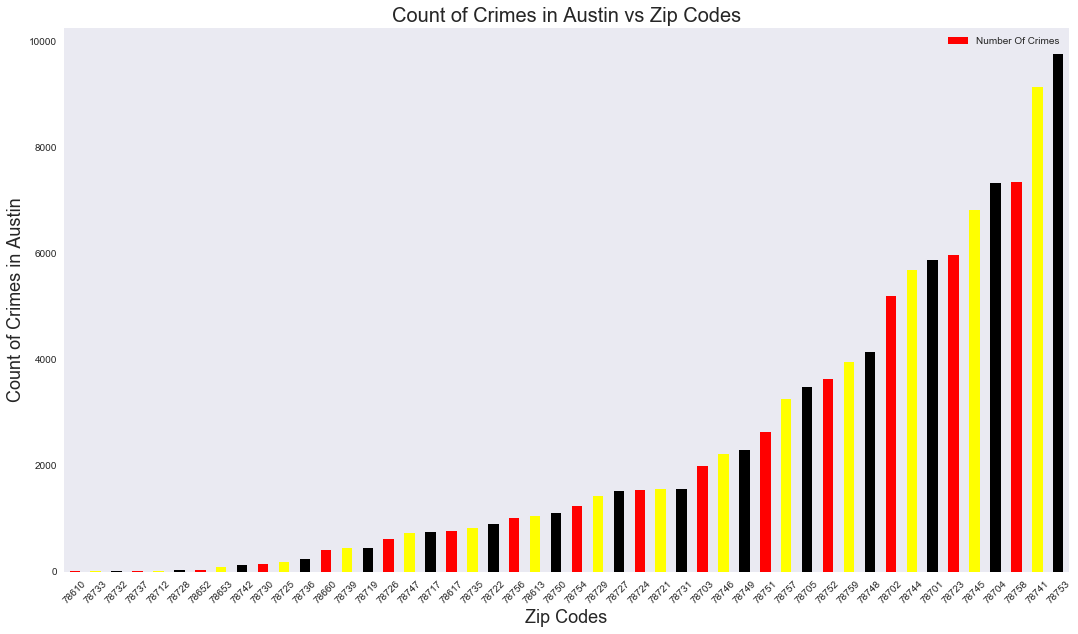

In [44]:
plt.style.use('seaborn-dark')

df_crime_zip_code.plot(x='Zip',y='Number Of Crimes', kind='bar',figsize=(18,10),color=['red','yellow','black']);
plt.xticks(rotation=45);
plt.xlabel('Zip Codes' ,fontsize=(18))
plt.ylabel('Count of Crimes in Austin',fontsize=(18))
plt.title('Count of Crimes in Austin vs Zip Codes',fontsize=(20));

<h2>Graphing</h2>

In [ ]:
Yelp_Category = df_Yelp_API.groupby('Category')
Yelp_Category